# Point Colaboratory to Google Drive

Point Colaboratory to that folder. To do so, simply run the following cell and follow the easy procedure shown. 


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive



Then modify this second cell according to your folder path, similarly to what we have done.

In [7]:
datapath = '/content/gdrive/My Drive/Tesi rapportini/' 

# Import

In [3]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=08861bfe397d910f53d8245ce12535598d0873b9ec7fa0f8057024ba1b89dbc6
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import tqdm.notebook as tq
import time
from operator import itemgetter
import random
import datetime 
from pandas.api.types import is_numeric_dtype # used for one-hot encoding
import math

# Text mining
from stop_words import get_stop_words
from string import punctuation 
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
from scipy import sparse
from scipy.sparse import hstack, vstack
from nltk.stem import SnowballStemmer

# Sklearn utilities
# from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold, ParameterGrid
from sklearn.metrics import confusion_matrix

# Sklearn models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Neural Netowrk and Deep Learning
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# import torchvision
# from torchvision import transforms

In [ ]:
# # Check if the GPU is available
# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# print(f"Training device: {device}")

# Dataset

### Import the dataset

In [189]:
# dataset_path = datapath + 'detworkaudit.csv'
dataset_path = datapath + 'dataset/data-1618311055681.csv'

data = pd.read_csv(dataset_path)

In [190]:
data.head()

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,note,flg_trasferta,data_ins,description,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,nr_fattura,sede,tipo_update,changed_on
0,3187265,16,1441,3294,2021-03-31,False,Affiancamento,8.0,22891,prima gg gratuita,False,2021-04-07 15:28:16.065,NaN,WEB,False,21206,False,A,False,NaN,7.0,cambio_commessa,2021-04-12 15:32:50.327955
1,3187244,16,360,3294,2021-03-31,True,"Giornata in presenza a Borgo Valsugana, implem...",8.0,22891,NaN,True,2021-04-07 10:04:12.244,NaN,WEB,False,21206,False,A,True,NaN,7.0,cambio_commessa,2021-04-12 15:32:35.198809
2,3187953,16,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,NaN,False,2021-04-12 14:53:56.976,NaN,WEB,False,4187,False,I,False,NaN,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,16,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,NaN,False,2021-04-12 14:52:09.489,NaN,WEB,False,4187,False,I,False,NaN,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,16,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,NaN,False,2021-04-09 07:10:38.027,NaN,WEB,False,21250,False,I,False,NaN,6.0,approvato,2021-04-12 13:17:12.745288


In [191]:
print("Shape of the dataset: {}".format(data.shape))

Shape of the dataset: (26950, 23)


Change name of the variables - not necessary

In [ ]:
# data.columns =['id', 'umid', 'resid', 'jobid', 'jobtaskdt', 'pay', 'workdesk', 
#                'qty', 'jobtaskid', 'note', 'fig_trasferta', 'data_ins', 
#                'description', 'app_ins', 'flg_prepagato', 'custid', 
#                'flg_straordinario', 'flg_status', 'jobregistered', 'nr_fattura',
#                'sede', 'tipo_update', 'changed_on', 'boo2', 'boo3']

In [ ]:
# data.head()

In [192]:
data_original = data.copy() # backup

# Formatting problems - SOLVED

In this section, I will solve some formatting issues related to the dataset.

In [193]:
data.describe()

,id,umid,resid,jobid,qty,jobtaskid,description,custid,sede
count,2.695000e+04,26950.0,26950.000000,26950.00000,26950.000000,26950.000000,0.0,26950.000000,26942.000000
mean,3.158345e+06,16.0,889.308534,1702.88167,4.109388,13793.881224,NaN,4475.111058,4.896073
std,2.225893e+04,0.0,546.618186,1398.45422,2.971256,10670.047203,NaN,5095.886078,1.854603
min,3.018276e+06,16.0,291.000000,4.00000,0.500000,5.000000,NaN,9.000000,0.000000
25%,3.142161e+06,16.0,342.000000,87.00000,1.000000,656.000000,NaN,59.000000,3.000000
50%,3.160078e+06,16.0,384.000000,2750.00000,4.000000,22026.000000,NaN,4187.000000,6.000000
75%,3.179054e+06,16.0,1441.000000,3000.00000,8.000000,22353.000000,NaN,4466.000000,6.000000
max,3.187953e+06,16.0,1477.000000,3295.00000,12.000000,22893.000000,NaN,21250.000000,9.000000


In [ ]:
# data["id"] = pd.to_numeric(data["id"])

Problem: some numeric columns are not recognized as such since they present also some strings (probably due to some formatting errors when downloading from the database). 

In [ ]:
# data = data_original.copy() # backup

#### Empty rows - No 

Firstly, find empy rows and remove them

In [11]:
empty_rows = pd.isnull(data.id)
empty_rows = empty_rows[empty_rows == True].index.tolist()
print(f'Empty rows: {len(empty_rows)}')
print(empty_rows)

Empty rows: 0
[]


In [ ]:
# Check
# data.iloc[empty_rows]

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,note,flg_trasferta,data_ins,description,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,nr_fattura,sede,tipo_update,changed_on


In [ ]:
# Remove these rows
# data = data.drop(empty_rows)

In [ ]:
# data.index = list(range(data.shape[0]))

#### Splitted rows - NO

Cerco le righe che sono state divise, guardando quelle che hanno una stringa nella prima colonna (che invece dovrebbe essere un id)

In [12]:
def isnumeric(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [ ]:
splitted_rows = pd.Series([isnumeric(s) for s in data.id]) == False

In [ ]:
sum(splitted_rows == True)

0

In [ ]:
splitted_rows = splitted_rows[splitted_rows == True].index.tolist()
print(splitted_rows)

[]


In [ ]:
# previous_rows = [s-1 for s in splitted_rows]
# print(previous_rows)

In [ ]:
# splitted_rows = splitted_rows + previous_rows
# splitted_rows = list(set(splitted_rows))
# splitted_rows = sorted(splitted_rows)

In [ ]:
print(splitted_rows)

[]


In [ ]:
# data.iloc[splitted_rows]

Option 1: discard the rows that have been split

In [ ]:
# data = data.drop(splitted_rows)
# data.index = list(range(data.shape[0]))

In [ ]:
# pd.to_numeric(data.id)

0        3126743
1        3127136
2        3127163
3        3128181
4        3129009
          ...   
18686    3175577
18687    3175571
18688    3175398
18689    3175401
18690    3177481
Name: id, Length: 18691, dtype: int64

In [ ]:
# data["id"] = pd.to_numeric(data["id"])

In [ ]:
data.describe()

,id,umid,resid,jobid,qty,jobtaskid,description,custid,sede
count,2.695000e+04,26950.0,26950.000000,26950.00000,26950.000000,26950.000000,0.0,26950.000000,26942.000000
mean,3.158345e+06,16.0,889.308534,1702.88167,4.109388,13793.881224,NaN,4475.111058,4.896073
std,2.225893e+04,0.0,546.618186,1398.45422,2.971256,10670.047203,NaN,5095.886078,1.854603
min,3.018276e+06,16.0,291.000000,4.00000,0.500000,5.000000,NaN,9.000000,0.000000
25%,3.142161e+06,16.0,342.000000,87.00000,1.000000,656.000000,NaN,59.000000,3.000000
50%,3.160078e+06,16.0,384.000000,2750.00000,4.000000,22026.000000,NaN,4187.000000,6.000000
75%,3.179054e+06,16.0,1441.000000,3000.00000,8.000000,22353.000000,NaN,4466.000000,6.000000
max,3.187953e+06,16.0,1477.000000,3295.00000,12.000000,22893.000000,NaN,21250.000000,9.000000


In [ ]:
# data.head()

#### Other columns - OK

In [13]:
numerical_columns = ['id', 'umid', 'resid', 'jobid', 'qty', 'jobtaskid', 'custid', 'sede']

In [ ]:
# data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric)

In [ ]:
# data.iloc[[4936, 4937]]

In [14]:
for nc in numerical_columns:
    splitted_rows = pd.Series([isnumeric(s) for s in data[nc]]) == False
    print(f'The variable {nc:10} has {sum(splitted_rows == True):3} values that are not numerical')

The variable id         has   0 values that are not numerical
The variable umid       has   0 values that are not numerical
The variable resid      has   0 values that are not numerical
The variable jobid      has   0 values that are not numerical
The variable qty        has   0 values that are not numerical
The variable jobtaskid  has   0 values that are not numerical
The variable custid     has   0 values that are not numerical
The variable sede       has   0 values that are not numerical


In [ ]:
# splitted_rows = pd.Series([isnumeric(s) for s in data['qty']]) == False

# splitted_rows = splitted_rows[splitted_rows == True].index.tolist()
# print(splitted_rows)

# data.iloc[splitted_rows]

Guardando al dataset, queste righe sono problematiche già da subito: l'errata formattazione è dovuta probabilmente ad una descrizione troppo lunga 

In [ ]:
# data = data.drop(splitted_rows)
# data.index = list(range(data.shape[0]))

In [ ]:
# for nc in numerical_columns:
#     splitted_rows = pd.Series([isnumeric(s) for s in data[nc]]) == False
#     print(f'The variable {nc:10} has {sum(splitted_rows == True):3} values that are not numerical')

In [ ]:
# splitted_rows = pd.Series([isnumeric(s) for s in data['custid']]) == False

# splitted_rows = splitted_rows[splitted_rows == True].index.tolist()
# print(splitted_rows)

# data.iloc[splitted_rows]

In [ ]:
# data = data.drop(splitted_rows)
# data.index = list(range(data.shape[0]))

In [ ]:
# for nc in numerical_columns:
#     splitted_rows = pd.Series([isnumeric(s) for s in data[nc]]) == False
#     print(f'The variable {nc:10} has {sum(splitted_rows == True):3} values that are not numerical')

In [ ]:
# data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric)

In [ ]:
data.describe()

,id,umid,resid,jobid,qty,jobtaskid,description,custid,sede
count,2.695000e+04,26950.0,26950.000000,26950.00000,26950.000000,26950.000000,0.0,26950.000000,26942.000000
mean,3.158345e+06,16.0,889.308534,1702.88167,4.109388,13793.881224,NaN,4475.111058,4.896073
std,2.225893e+04,0.0,546.618186,1398.45422,2.971256,10670.047203,NaN,5095.886078,1.854603
min,3.018276e+06,16.0,291.000000,4.00000,0.500000,5.000000,NaN,9.000000,0.000000
25%,3.142161e+06,16.0,342.000000,87.00000,1.000000,656.000000,NaN,59.000000,3.000000
50%,3.160078e+06,16.0,384.000000,2750.00000,4.000000,22026.000000,NaN,4187.000000,6.000000
75%,3.179054e+06,16.0,1441.000000,3000.00000,8.000000,22353.000000,NaN,4466.000000,6.000000
max,3.187953e+06,16.0,1477.000000,3295.00000,12.000000,22893.000000,NaN,21250.000000,9.000000


In [ ]:
data.head()

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,note,flg_trasferta,data_ins,description,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,nr_fattura,sede,tipo_update,changed_on
0,3187265,16,1441,3294,2021-03-31,False,Affiancamento,8.0,22891,prima gg gratuita,False,2021-04-07 15:28:16.065,NaN,WEB,False,21206,False,A,False,NaN,7.0,cambio_commessa,2021-04-12 15:32:50.327955
1,3187244,16,360,3294,2021-03-31,True,"Giornata in presenza a Borgo Valsugana, implem...",8.0,22891,NaN,True,2021-04-07 10:04:12.244,NaN,WEB,False,21206,False,A,True,NaN,7.0,cambio_commessa,2021-04-12 15:32:35.198809
2,3187953,16,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,NaN,False,2021-04-12 14:53:56.976,NaN,WEB,False,4187,False,I,False,NaN,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,16,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,NaN,False,2021-04-12 14:52:09.489,NaN,WEB,False,4187,False,I,False,NaN,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,16,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,NaN,False,2021-04-09 07:10:38.027,NaN,WEB,False,21250,False,I,False,NaN,6.0,approvato,2021-04-12 13:17:12.745288


In [ ]:
# check
data.qty.value_counts()

8.0     7944
1.0     4287
0.5     3108
4.0     2816
2.0     2734
1.5     1240
3.0     1221
6.0     1067
7.0      544
2.5      507
5.0      491
3.5      309
5.5      179
4.5      178
6.5      163
7.5      150
9.0        6
10.0       3
12.0       1
9.5        1
10.5       1
Name: qty, dtype: int64

In [ ]:
# check 
data.flg_trasferta.value_counts()

False    25883
True      1067
Name: flg_trasferta, dtype: int64

In [ ]:
list(data_original[data_original.id==3144193]['workdesc'])

['Sviluppo workflow User Profiles Definitions: supporto per gestione conflitti, completato validation implementation, fix feedback per codemap lenti; rimosso vecchio "conflict", creato e definito CO KUBIX']

In [ ]:
list(data_original[data_original.id==3160008]['note'])

['in sostituzione a rapportino di scarabelli con la seguente descrizione:\n"QLIK SENSE PREPARAZIONE REPORT CON LISTA LICENZE, ACCOUNT E APP UTILIZZATE"']

Se vado su pdAdmin e faccio la query

`select * from bot.detwork_audit where id = 3144193;`

sul campo workdesk trovo: 

Sviluppo workflow User Profiles Definitions: supporto per gestione conflitti, completato validation implementation, fix feedback per codemap lenti; rimosso vecchio "conflict", creato e definito CO KUBIX

e viene splittato dopo conflict",

Altro esempio di split è

`select * from bot.detwork_audit where id = 3160008;`

in sostituzione a rapportino di scarabelli con la seguente descrizione:
"QLIK SENSE PREPARAZIONE REPORT CON LISTA LICENZE, ACCOUNT E APP UTILIZZATE"

e viene splittato dopo LICENZE,

Quindi non è chiaro il criterio per cui ciò avviene...

CON IL NUOVO DATASET E' TUTTO OK

# Missing values

In [194]:
data.head()

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,note,flg_trasferta,data_ins,description,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,nr_fattura,sede,tipo_update,changed_on
0,3187265,16,1441,3294,2021-03-31,False,Affiancamento,8.0,22891,prima gg gratuita,False,2021-04-07 15:28:16.065,NaN,WEB,False,21206,False,A,False,NaN,7.0,cambio_commessa,2021-04-12 15:32:50.327955
1,3187244,16,360,3294,2021-03-31,True,"Giornata in presenza a Borgo Valsugana, implem...",8.0,22891,NaN,True,2021-04-07 10:04:12.244,NaN,WEB,False,21206,False,A,True,NaN,7.0,cambio_commessa,2021-04-12 15:32:35.198809
2,3187953,16,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,NaN,False,2021-04-12 14:53:56.976,NaN,WEB,False,4187,False,I,False,NaN,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,16,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,NaN,False,2021-04-12 14:52:09.489,NaN,WEB,False,4187,False,I,False,NaN,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,16,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,NaN,False,2021-04-09 07:10:38.027,NaN,WEB,False,21250,False,I,False,NaN,6.0,approvato,2021-04-12 13:17:12.745288


In [195]:
data.describe(include='all')

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,note,flg_trasferta,data_ins,description,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,nr_fattura,sede,tipo_update,changed_on
count,2.695000e+04,26950.0,26950.000000,26950.00000,26950,26950,26950,26950.000000,26950.000000,4066,26950,26950,0.0,26950,26950,26950.000000,26950,26950,26950,17,26942.000000,26950,26950
unique,NaN,NaN,NaN,NaN,400,2,17650,NaN,NaN,2561,2,23389,NaN,1,2,NaN,2,2,2,9,NaN,2,10302
top,NaN,NaN,NaN,NaN,2021-03-26,False,.,NaN,NaN,.,False,2020-12-10 09:47:52.06,NaN,WEB,False,NaN,False,I,False,FVE20-0664,NaN,approvato,2021-01-11 15:01:22.008019
freq,NaN,NaN,NaN,NaN,224,24540,470,NaN,NaN,296,25883,5,NaN,26950,15684,NaN,26038,24850,26908,6,NaN,22702,832
mean,3.158345e+06,16.0,889.308534,1702.88167,NaN,NaN,NaN,4.109388,13793.881224,NaN,NaN,NaN,NaN,NaN,NaN,4475.111058,NaN,NaN,NaN,NaN,4.896073,NaN,NaN
std,2.225893e+04,0.0,546.618186,1398.45422,NaN,NaN,NaN,2.971256,10670.047203,NaN,NaN,NaN,NaN,NaN,NaN,5095.886078,NaN,NaN,NaN,NaN,1.854603,NaN,NaN
min,3.018276e+06,16.0,291.000000,4.00000,NaN,NaN,NaN,0.500000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.142161e+06,16.0,342.000000,87.00000,NaN,NaN,NaN,1.000000,656.000000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,3.160078e+06,16.0,384.000000,2750.00000,NaN,NaN,NaN,4.000000,22026.000000,NaN,NaN,NaN,NaN,NaN,NaN,4187.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN
75%,3.179054e+06,16.0,1441.000000,3000.00000,NaN,NaN,NaN,8.000000,22353.000000,NaN,NaN,NaN,NaN,NaN,NaN,4466.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN


In [196]:
# Check how missing values are distributed across each variable (i.e., column)
print(f'Total number of rows: {data.shape[0]}')
print()
print('MISSING VALUES PER VARIABLE:\n')
data.apply(lambda x: sum(x.isnull())) # apply applies the function column-wise

Total number of rows: 26950

MISSING VALUES PER VARIABLE:



id                       0
umid                     0
resid                    0
jobid                    0
jobtaskdt                0
pay                      0
workdesc                 0
qty                      0
jobtaskid                0
note                 22884
flg_trasferta            0
data_ins                 0
description          26950
app_ins                  0
flg_prepagato            0
custid                   0
flg_straordinario        0
flg_status               0
jobregistered            0
nr_fattura           26933
sede                     8
tipo_update              0
changed_on               0
dtype: int64

### Merge note with workdesc

Let's check the variable note

In [197]:
for i, n in enumerate(data.note[~data.note.isnull()]):
    print(n)

Output streaming troncato alle ultime 5000 righe.
17:45 - 18:15
06:10 - 08:40
05:15 - 05:45
00:20 - 00:50
23:45 - 00:15
21:55 - 22:25
13:45 - 14:45
dalle 18 alle 18.30
Chiamata alle 1.50,fine attività ore 2.16
Chiamata ore 22.57,fine attività ore 00.06
23:10 - 00:10
Inizio ore 19.00,fine ore 20.00
00:50 - 01:20
19:40 - 20:10
Dalle ore 05:30
05:10 - 05:40
04:40 - 05:10
20:45 - 21:15
Attività dalle 18 alle 18.30
SDCS-3378
SDCS-3379
SDCS-3380
SDCS-3354
Presidio VAM, Monitoraggio Foreste
Presidio VAM, Monitoraggio Foreste
SDCS-3300
.
.
.
.
,
.
.
.
.
.
.
.
.
.
.
.
* Fissati 2 appuntamenti con ns CSO (SCHENK ITALIAN WINERIES e TINAZZI)
.
.
.
.
.
.
.
.
.
.
*Fissati due videomeet di presentazione (LUALDI PORTE e CANTINA DI SOAVE)
.
.
Problemi con connessione Internet a casa, dunque il resto della giornata lavoro in sede a Thiene.
.
.
.
.
.
.
.
.
.
*Nuovo Lead interessato (LUALDI S.P.A.) - meeting in corso di schedulazione
.
.
*Fissato videomeeting di presentazione Miriade con MCZ GROUP S.P.A.


Sometimes the resource writes something like: "non sono sicuro della commessa", "commessa da cambiare"... So it could be informative 

In [198]:
data.note[~data.note.isnull()]

0                                        prima gg gratuita
16       Ticket #10350391 - BI: DWH - Verifica utilizzo...
17                              controllo flussi mattutini
124      Ticket #10311130 - R: BI:MIRIADE: SMARTCASH - ...
128                                      Controllo dei log
                               ...                        
26924    Federica N mi ha detto di mettere l'attività i...
26938                   Formazione affiancamento SQLServer
26939                   - Sophos Central device encryption
26942                        Studio individuale SQL Server
26943    m.zamboni\nConfigurazione account gmail sul pc...
Name: note, Length: 4066, dtype: object

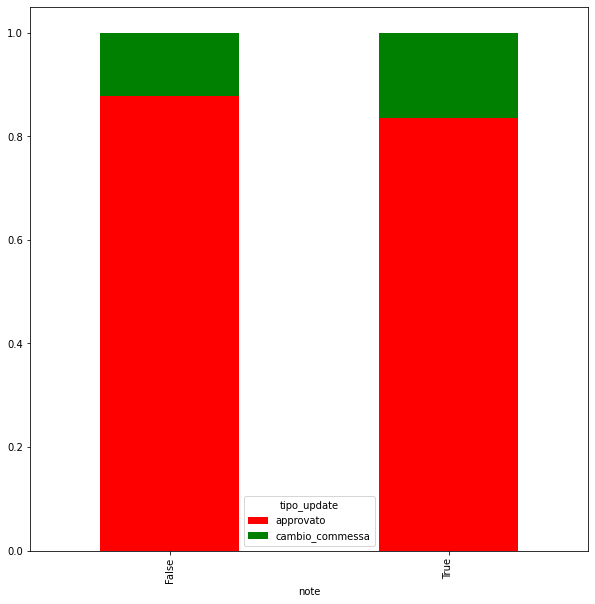

In [199]:
fig, axes = plt.subplots(1, 1, figsize=(10,10))
tmp_data = pd.crosstab(data.note.isnull(), data.tipo_update)
tmp_data = tmp_data.apply(lambda x: x/tmp_data.sum(axis=1))
tmp_data.plot.bar(stacked=True, color=['red','green'], grid=False, ax=axes, legend=True)

In [200]:
sum(data.note.isnull())/len(data.note)

0.8491280148423006

It is not the presence of a note that makes the change more probable. The most resonable strategy is to concatenate the variable note with workdesc, considering that its content may be useful but it is not null only 15% of the times.

In [201]:
data.workdesc[~data.note.isnull()]

0                                            Affiancamento
16       Ticket #10350391 - BI: DWH - Verifica utilizzo...
17                              controllo flussi mattutini
124      Ticket #10311130 - R: BI:MIRIADE: SMARTCASH - ...
128      SDCS-2817\nULSS 8 Berica - Richiesta intervent...
                               ...                        
26924    installazione e configurazione monitoraggio cl...
26938                   Formazione affiancamento SQLServer
26939                          Sophos Central Academy 2020
26942                        Studio individuale SQL Server
26943                 formazione Gsuite e device aziendali
Name: workdesc, Length: 4066, dtype: object

In [202]:
data.note[~data.note.isnull()]

0                                        prima gg gratuita
16       Ticket #10350391 - BI: DWH - Verifica utilizzo...
17                              controllo flussi mattutini
124      Ticket #10311130 - R: BI:MIRIADE: SMARTCASH - ...
128                                      Controllo dei log
                               ...                        
26924    Federica N mi ha detto di mettere l'attività i...
26938                   Formazione affiancamento SQLServer
26939                   - Sophos Central device encryption
26942                        Studio individuale SQL Server
26943    m.zamboni\nConfigurazione account gmail sul pc...
Name: note, Length: 4066, dtype: object

In [203]:
data.workdesc[~data.note.isnull()] = data.workdesc[~data.note.isnull()] + ' ' + data.note[~data.note.isnull()]
data.workdesc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                          Affiancamento prima gg gratuita
1        Giornata in presenza a Borgo Valsugana, implem...
2                                            Sophos AULSS7
3                                            Sophos AULSS7
4        Test e attivazione Journeys ATO UK ed ATO US.\...
                               ...                        
26945                         documentazione flussi kettle
26946                         documentazione flussi kettle
26947                         Documentazione flusso kettle
26948    Upgrade Server QlikVIew\nInstallazione compone...
26949             Sistemazione collegamento al server qlik
Name: workdesc, Length: 26950, dtype: object

In [204]:
data

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,note,flg_trasferta,data_ins,description,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,nr_fattura,sede,tipo_update,changed_on
0,3187265,16,1441,3294,2021-03-31,False,Affiancamento prima gg gratuita,8.0,22891,prima gg gratuita,False,2021-04-07 15:28:16.065,NaN,WEB,False,21206,False,A,False,NaN,7.0,cambio_commessa,2021-04-12 15:32:50.327955
1,3187244,16,360,3294,2021-03-31,True,"Giornata in presenza a Borgo Valsugana, implem...",8.0,22891,NaN,True,2021-04-07 10:04:12.244,NaN,WEB,False,21206,False,A,True,NaN,7.0,cambio_commessa,2021-04-12 15:32:35.198809
2,3187953,16,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,NaN,False,2021-04-12 14:53:56.976,NaN,WEB,False,4187,False,I,False,NaN,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,16,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,NaN,False,2021-04-12 14:52:09.489,NaN,WEB,False,4187,False,I,False,NaN,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,16,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,NaN,False,2021-04-09 07:10:38.027,NaN,WEB,False,21250,False,I,False,NaN,6.0,approvato,2021-04-12 13:17:12.745288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26945,3129009,16,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,NaN,False,2020-09-16 16:11:45.868,NaN,WEB,False,4212,False,I,False,NaN,6.0,cambio_commessa,2020-09-17 08:00:26.853034
26946,3128181,16,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,NaN,False,2020-09-14 16:16:15.122,NaN,WEB,False,4212,False,I,False,NaN,6.0,cambio_commessa,2020-09-17 08:00:00.187262
26947,3127163,16,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,NaN,False,2020-09-10 16:17:17.145,NaN,WEB,False,4212,False,I,False,NaN,6.0,cambio_commessa,2020-09-17 07:59:31.63322
26948,3127136,16,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,NaN,False,2020-09-10 16:05:34.748,NaN,WEB,False,4212,False,I,False,NaN,6.0,cambio_commessa,2020-09-17 07:59:11.799788


### Drop columns with almost all null values and note

In [26]:
# Let's remove the columns: description, nr_fattura and note

In [205]:
data.drop(['description', 'nr_fattura', 'note'], inplace=True, axis=1)

In [206]:
data.head()

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
0,3187265,16,1441,3294,2021-03-31,False,Affiancamento prima gg gratuita,8.0,22891,False,2021-04-07 15:28:16.065,WEB,False,21206,False,A,False,7.0,cambio_commessa,2021-04-12 15:32:50.327955
1,3187244,16,360,3294,2021-03-31,True,"Giornata in presenza a Borgo Valsugana, implem...",8.0,22891,True,2021-04-07 10:04:12.244,WEB,False,21206,False,A,True,7.0,cambio_commessa,2021-04-12 15:32:35.198809
2,3187953,16,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,False,2021-04-12 14:53:56.976,WEB,False,4187,False,I,False,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,16,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,False,2021-04-12 14:52:09.489,WEB,False,4187,False,I,False,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,16,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,WEB,False,21250,False,I,False,6.0,approvato,2021-04-12 13:17:12.745288


In [207]:
# Check how missing values are distributed across each variable (i.e., column)
print(f'Total number of rows: {data.shape[0]}')
print()
print('MISSING VALUES PER VARIABLE:\n')
data.apply(lambda x: sum(x.isnull())) # apply applies the function column-wise

Total number of rows: 26950

MISSING VALUES PER VARIABLE:



id                   0
umid                 0
resid                0
jobid                0
jobtaskdt            0
pay                  0
workdesc             0
qty                  0
jobtaskid            0
flg_trasferta        0
data_ins             0
app_ins              0
flg_prepagato        0
custid               0
flg_straordinario    0
flg_status           0
jobregistered        0
sede                 8
tipo_update          0
changed_on           0
dtype: int64

Now the only variable with missing values is sede

# Splitting the Dataset

Let's split our dataset with scikit-learn 'train_test_split' function.
We want the training set to account for 60% of the original dataset, whilst the validation and test set to account for 20% each.
Additionally, we would like to take advantage of stratified sampling,
so as to obtain the same target distribution in all sets.


In [208]:
def prepare_dataset(X_s):
    # Divide the dataset into training, validation and test sets
    train, vt = train_test_split(data, test_size=0.4, random_state=1, stratify=data.tipo_update)
    val, test = train_test_split(vt, test_size=0.5, random_state=1, stratify=vt.tipo_update)
    print("Training Set shape: {}".format(train.shape))
    print("Validation Set shape: {}".format(val.shape))
    print("Test Set shape: {}".format(test.shape))
    return train, val, test

In [209]:
train, val, test = prepare_dataset(data)

Training Set shape: (16170, 20)
Validation Set shape: (5390, 20)
Test Set shape: (5390, 20)


# Data exploration

In [210]:
data = train

In [211]:
# Auxiliary function

def plot_most_freq(variable, k):

    '''plot the frequency of the k most frequent values of a variable'''

    vc = data[variable].value_counts() # count values 

    if k == data[variable].nunique():
        v = vc.values
        i = vc.index
    
    else: 
        v = vc[:k].values
        i = vc[:k].index

    fig, ax = plt.subplots(figsize=(15,7))
    ax.bar(range(k), v)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Most frequent {variable}')
    ax.set_xticks(np.arange(k))
    ax.set_xticklabels(i)
    plt.show()

### id 

E' semplicemente l'id di un rapportino. Possono esserci più righe corrispondenti allo stesso id nel caso in cui un rapportino venisse modificato. Esempio: 

In [212]:
data.id.value_counts()

3184972    5
3180683    4
3175938    4
3163305    4
3132746    4
          ..
3163314    1
3136689    1
3155118    1
3181739    1
3137516    1
Name: id, Length: 14826, dtype: int64

In [213]:
print(f'Quante volte lo stesso rapportino è stato inserito solo una volta: {sum(data.id.value_counts() == 1)}')
print(f'Quante volte lo stesso rapportino è stato inserito più di una volta: {sum(data.id.value_counts() != 1)}')

Quante volte lo stesso rapportino è stato inserito solo una volta: 13570
Quante volte lo stesso rapportino è stato inserito più di una volta: 1256


Esempio di rapportino inserito 5 volte:

In [214]:
data[data.id == 3156853]

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
17696,3156853,16,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,approvato,2020-11-30 08:56:02.307538
16462,3156853,16,319,2897,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,22397,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,approvato,2020-11-30 15:45:28.236287
17665,3156853,16,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,cambio_commessa,2020-11-30 09:00:30.903281


In [215]:
data[data.id == 3163305]

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
8310,3163305,16,319,2959,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,8.0,22285,False,2020-12-21 20:56:03.52,WEB,True,4439,False,A,False,6.0,cambio_commessa,2021-02-04 14:14:56.437101
8314,3163305,16,319,3102,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,8.0,22532,False,2020-12-21 20:56:03.52,WEB,True,4439,False,A,False,6.0,cambio_commessa,2021-02-04 13:39:32.238067
8307,3163305,16,319,3102,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,8.0,22532,False,2020-12-21 20:56:03.52,WEB,True,4439,False,A,False,6.0,cambio_commessa,2021-02-04 14:45:04.80245
14246,3163305,16,319,2957,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,6.0,22277,False,2020-12-21 20:56:03.52,WEB,True,4439,False,I,False,6.0,cambio_commessa,2020-12-24 15:26:33.077605


In [216]:
data[data.flg_status!='A'][data.id == 3156853]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
17696,3156853,16,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,approvato,2020-11-30 08:56:02.307538
16462,3156853,16,319,2897,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,22397,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,approvato,2020-11-30 15:45:28.236287
17665,3156853,16,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,cambio_commessa,2020-11-30 09:00:30.903281


In [217]:
data[data.id == 3156853]['workdesc']#[11181]

17696    Meeting per struttura LOG del sistema non son ...
16462    Meeting per struttura LOG del sistema non son ...
17665    Meeting per struttura LOG del sistema non son ...
Name: workdesc, dtype: object

In [218]:
# Rapportini presenti solo una volta nel dataset
singoli = data.id.value_counts()[data.id.value_counts() == 1]

In [219]:
# Calcolo l'id dei rapportini singoli
singoli.index

Int64Index([3128115, 3131829, 3179797, 3128899, 3136335, 3156817, 3171001,
            3154768, 3164860, 3138088,
            ...
            3157183, 3147965, 3075255, 3073206, 3177653, 3163314, 3136689,
            3155118, 3181739, 3137516],
           dtype='int64', length=13570)

In [220]:
# Guardo il tipo_update dei rapportini singoli
data.tipo_update[data.id.isin(singoli.index)].value_counts()

approvato          12368
cambio_commessa     1202
Name: tipo_update, dtype: int64

In [221]:
data_singoli = data[data.id.isin(singoli.index)] #[data.tipo_update == 'cambio_commessa']
rapportini_singoli_cambio_commessa = data_singoli[data_singoli.tipo_update == 'cambio_commessa']
rapportini_singoli_cambio_commessa

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
7859,3177389,16,367,3183,2021-02-09,False,codice terraform per target group e alb,3.5,22682,False,2021-02-09 17:52:23.432,WEB,True,21226,False,I,False,6.0,cambio_commessa,2021-02-12 11:15:02.765189
5368,3182085,16,1458,81,2021-02-26,False,Analisi preparazione offerta migrazione,2.0,24,False,2021-03-01 08:03:38.276,WEB,False,4187,False,I,False,6.0,cambio_commessa,2021-03-02 13:12:30.068617
788,3184741,16,330,3197,2021-03-15,False,presidio\nmanutenzione \nticket\nrilasci,8.0,22704,False,2021-03-18 17:09:29.58,WEB,True,4466,False,I,False,6.0,cambio_commessa,2021-04-01 15:15:59.059141
26389,3124791,16,349,83,2020-09-01,False,allineamento piano marketing x autentica e def...,1.5,26,False,2020-09-01 12:07:44.054,WEB,False,4187,False,I,False,2.0,cambio_commessa,2020-09-18 09:03:00.383199
12905,3070442,16,353,100,2020-02-11,False,Sviluppo frontend,8.0,610,False,2020-02-18 08:04:47.412,WEB,False,4187,False,A,False,2.0,cambio_commessa,2021-01-11 15:00:59.362778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,3165296,16,330,2897,2020-12-24,False,presidio\nticket\nmanutenzione,8.0,22146,False,2020-12-28 12:48:39.631,WEB,True,4466,False,A,False,6.0,cambio_commessa,2021-01-21 13:54:10.187304
12867,3086195,16,1430,2866,2020-04-17,False,Standup-meeting\nVisual Zendesk\nAllineamento ...,6.5,22057,False,2020-04-17 16:03:58.311,WEB,False,59,False,A,False,6.0,cambio_commessa,2021-01-11 15:01:09.832931
12588,3078608,16,1429,2865,2020-03-20,False,Autentica value proposition,5.0,22058,False,2020-03-20 17:05:10.068,WEB,False,4187,False,A,False,6.0,cambio_commessa,2021-01-11 15:01:22.008019
12164,3108046,16,320,82,2020-07-01,False,Rapportini e gdpr carel e multistampi,5.5,25,False,2020-07-01 13:02:43.281,WEB,False,4187,False,A,False,6.0,cambio_commessa,2021-01-11 15:01:22.008019


In [ ]:
# rapportini_singoli_cambio_commessa.to_csv(datapath + 'dataset/rapportini_singoli_cambio_commessa.csv', index=False)

### umid -> CANC

Questa variabile rappresenta la "unità di misura ma è sempre ore". -> rimuovere

In [222]:
data.umid.nunique() # calcora quanti valori distinti assume una variabile 

1

In [223]:
data.umid.value_counts()

16    16170
Name: umid, dtype: int64

### resid = persona -> OK

Questa è la risorsa, la persona

In [224]:
data.resid.nunique()

97

In [225]:
data.resid.value_counts()

1445    972
367     628
320     456
349     439
339     427
       ... 
1452     17
1415      5
306       4
1476      3
1477      1
Name: resid, Length: 97, dtype: int64

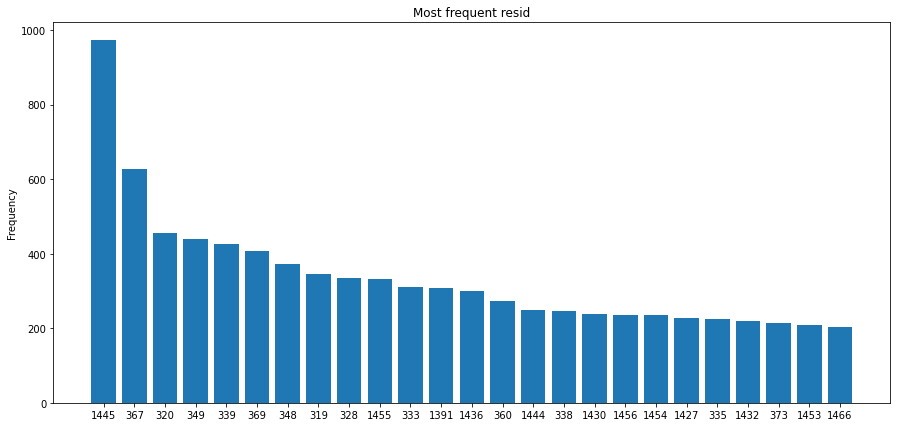

In [60]:
plot_most_freq('resid', 25)

### jobid = commessa - OK



In [61]:
data

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
23747,3136051,16,1430,2865,2020-10-01,False,Meet per nuovo nome autentica,2.0,22058,False,2020-10-01 16:07:50.418,WEB,False,4187,False,I,False,6.0,approvato,2020-10-04 11:52:50.106431
6701,3181031,16,308,2848,2021-02-16,False,.,8.0,22026,False,2021-02-23 17:29:02.768,WEB,False,59,False,I,False,6.0,approvato,2021-03-01 10:40:49.128881
10990,3170117,16,300,3170,2021-01-19,False,-Allineamento attività\n-Verifica attuale flus...,8.0,22658,False,2021-01-21 11:19:10.039,WEB,True,21154,False,I,False,6.0,approvato,2021-01-24 13:30:02.472003
17594,3155870,16,1434,2987,2020-11-23,False,"Flusso gare, lavorato sulla tabella dei contra...",8.0,22328,False,2020-11-27 13:06:28.789,WEB,True,4466,False,I,False,6.0,approvato,2020-11-30 09:17:15.563669
725,3184178,16,372,3195,2021-03-11,False,Monitoraggio AWS,6.0,22698,False,2021-03-15 10:52:35.271,WEB,True,4466,False,I,False,6.0,approvato,2021-04-01 15:21:25.147036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,3174862,16,322,82,2021-02-01,False,Approvazioni rapportini,8.0,25,False,2021-02-01 16:58:37.708,WEB,False,4187,False,I,False,6.0,approvato,2021-02-12 10:04:34.77895
10595,3168533,16,1400,2897,2021-01-15,False,"tkt, sr, incident tkt, sr, incident",8.0,22397,False,2021-01-15 17:48:25.276,WEB,True,4466,False,I,False,6.0,cambio_commessa,2021-01-25 09:04:15.446624
6042,3179070,16,349,3006,2021-02-15,False,My.MI (ex customer report) progettazione compo...,3.5,22352,False,2021-02-15 17:54:14.069,WEB,False,4187,False,I,False,6.0,approvato,2021-03-02 09:10:34.80683
1505,3186739,16,337,2516,2021-03-03,True,Jira IAM-137; troubleshooting problemi con upd...,8.0,21294,False,2021-03-31 15:23:39.778,WEB,False,4370,False,I,False,6.0,approvato,2021-04-01 04:59:35.957184


In [62]:
data.jobid.nunique()

338

In [63]:
data.jobid.value_counts()

81      1529
280     1520
2897    1128
2848    1087
83       959
        ... 
43         1
2971       1
3209       1
3143       1
2832       1
Name: jobid, Length: 338, dtype: int64

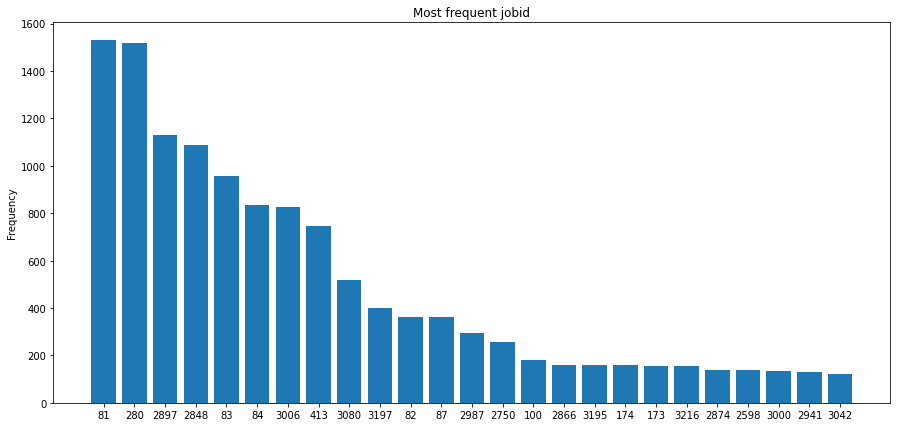

In [64]:
plot_most_freq('jobid', 25)

### pay = flag fatturare -> OK

In [65]:
data.pay.nunique()

2

In [66]:
data.pay.value_counts()

False    14720
True      1450
Name: pay, dtype: int64

OSS: solo in 3 casi sia pay sia prepagato sono entrambi veri

In [67]:
np.sum(np.logical_and(data.pay == True, data.flg_prepagato == True))

2

In [68]:
data[np.logical_and(data.pay == True, data.flg_prepagato == True)]

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
17578,3154482,16,337,3149,2020-11-18,True,investigato problema auth multifactor per kb.o...,8.0,22614,False,2020-11-25 16:24:59.864,WEB,True,4370,False,I,False,6.0,approvato,2020-11-30 09:25:22.963357
17576,3154473,16,337,3149,2020-11-25,True,"fix puppeteer per DRES, aggiornamento sfeamt06",8.0,22614,False,2020-11-25 16:23:25.453,WEB,True,4370,False,I,False,6.0,approvato,2020-11-30 09:25:22.963357


### qty = numero ore -> OK

Numero di ore

In [69]:
n_qty = data.qty.nunique()
n_qty

21

In [70]:
data.qty.value_counts()

8.0     4808
1.0     2542
0.5     1915
4.0     1695
2.0     1617
1.5      744
3.0      707
6.0      638
7.0      329
5.0      299
2.5      281
3.5      177
5.5      126
4.5      101
6.5       94
7.5       88
9.0        4
10.0       2
12.0       1
10.5       1
9.5        1
Name: qty, dtype: int64

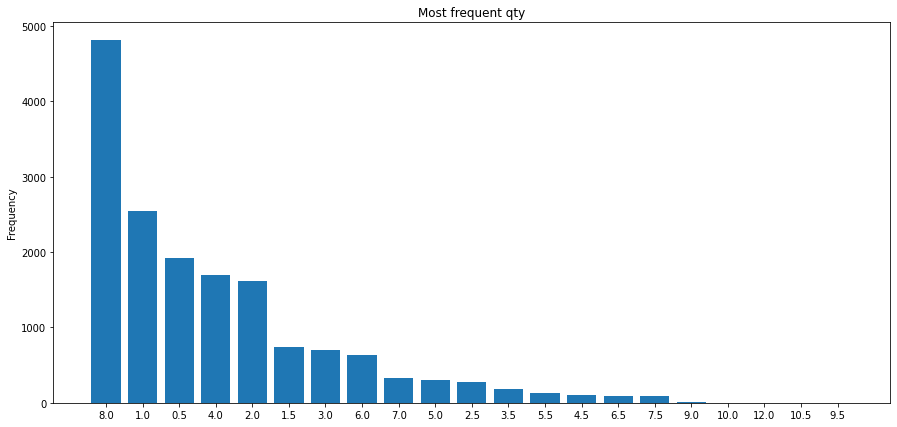

In [71]:
plot_most_freq('qty', n_qty)

### jobtaskid = sottocommessa -> OK



In [72]:
data.jobtaskid.nunique()

628

In [73]:
data.jobtaskid.value_counts()

24       1463
746      1172
22026     954
26        759
22352     604
         ... 
22080       1
22089       1
22516       1
52          1
22855       1
Name: jobtaskid, Length: 628, dtype: int64

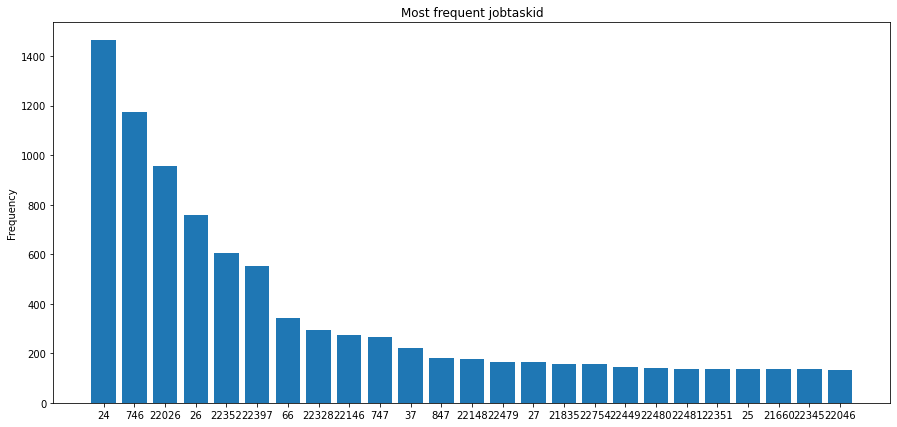

In [74]:
plot_most_freq('jobtaskid', 25)

### flg_trasferta -> OK

Se l’attività è stata svolta presso il cliente va spuntato il flag Trasferta che automaticamente alimenta il report delle trasferte mensili.
Il flag Trasferta indica  che l’attività è fatta presso la sede del cliente.




In [75]:
data.flg_trasferta.nunique()

2

In [76]:
data.flg_trasferta.value_counts()

False    15504
True       666
Name: flg_trasferta, dtype: int64

### app_ins -> CANC

Penso indichi come è stato inserito il rapportino: sempre via WEB

-> cancellare

In [77]:
data.app_ins.nunique()

1

In [78]:
data.app_ins.value_counts()

WEB    16170
Name: app_ins, dtype: int64

### flg_prepagato -> OK

I flag Fatturare e prepagata sono precompilati di default. Se per caso modificate tali flag scrivete nelle note tecniche il motivo per cui è stata fatta la modifica.


In [79]:
data.flg_prepagato.nunique()

2

In [80]:
data.flg_prepagato.value_counts()

False    9417
True     6753
Name: flg_prepagato, dtype: int64

### custid = customer id -> OK

In [81]:
data.custid.nunique()

120

In [82]:
data.custid.value_counts()

4187    5214
4466    2811
59      2540
10      1520
4243     444
        ... 
4294       1
4211       1
4475       1
4467       1
4253       1
Name: custid, Length: 120, dtype: int64

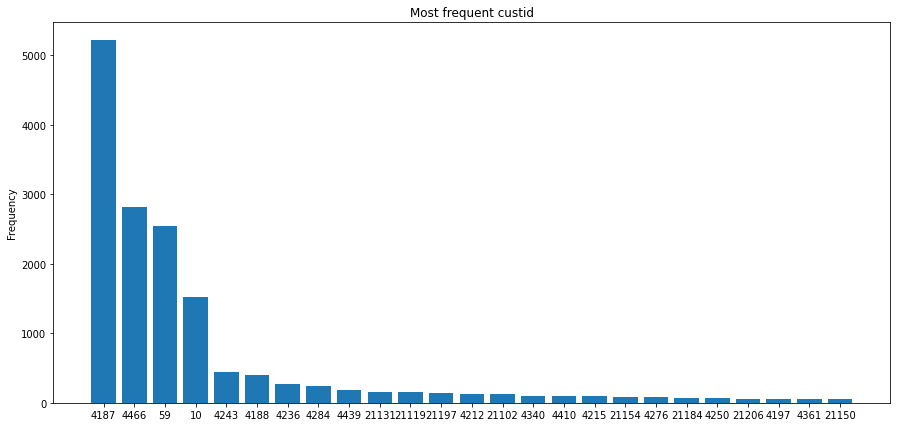

In [83]:
plot_most_freq('custid', 25)

### flg_straordinario -> OK

In [84]:
data.flg_straordinario.nunique()

2

In [85]:
data.flg_straordinario.value_counts()

False    15608
True       562
Name: flg_straordinario, dtype: int64

### flg_status = inserito o approvato

se è inserito o approvato

In [86]:
data.flg_status.nunique()

2

In [87]:
data.flg_status.value_counts()

I    14894
A     1276
Name: flg_status, dtype: int64

### jobregistered = ? -> CANC

In [88]:
data.jobregistered.nunique()

2

In [89]:
data.jobregistered.value_counts()

False    16145
True        25
Name: jobregistered, dtype: int64

### sede -> OK

In [90]:
data.sede.nunique()

9

4 "Presidio Regione del Veneto" "Presidio Regione del Veneto" 4

7 "Cliente" "Cliente" 7

8 "Cliente no pranzo" "Cliente no pranzo" 8

9 "Cliente con maggiorazione" "Cliente con maggiorazione" 9

5 "Formazione" "Formazione" 11

6 "Lavoro da casa" "Lavoro da casa" 12

2 "Sede Thiene" "Thiene" 1

1 "Sede Padova" "Padova" 2

3 "Presidio Azienda Zero" "Presidio Azienda Zero" 3

In [91]:
data.sede.value_counts()

6.0    11407
2.0     2964
1.0      988
4.0      434
7.0      198
3.0      119
5.0       40
8.0       13
9.0        1
Name: sede, dtype: int64

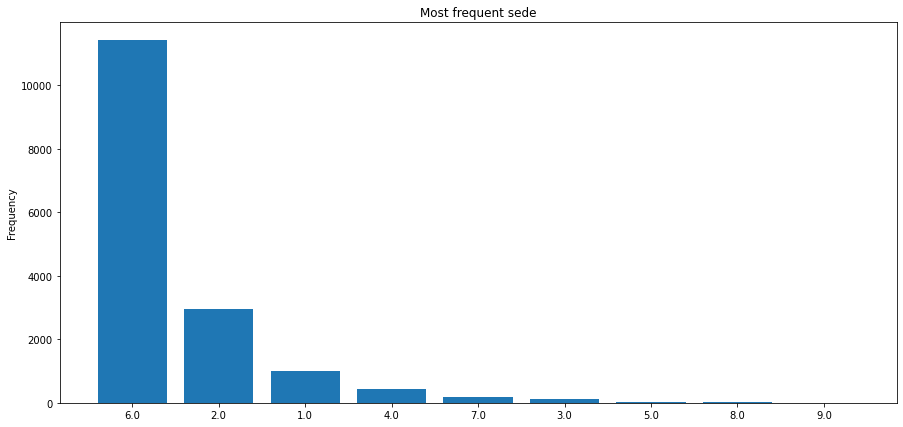

In [93]:
plot_most_freq('sede', 9)

### tipo_update

In [94]:
data.tipo_update.nunique()

2

In [95]:
data.tipo_update.value_counts()

approvato          13621
cambio_commessa     2549
Name: tipo_update, dtype: int64

In [96]:
data[data.flg_status!='A'].tipo_update.value_counts()

approvato          13621
cambio_commessa     1273
Name: tipo_update, dtype: int64

# Pre-processing

## Drop useless columns: umid, app_ins e jobregistered

In [226]:
data1 = data.drop(['umid', 'app_ins', 'jobregistered'], inplace=False, axis=1)

In [227]:
data1

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,flg_status,sede,tipo_update,changed_on
23747,3136051,1430,2865,2020-10-01,False,Meet per nuovo nome autentica,2.0,22058,False,2020-10-01 16:07:50.418,False,4187,False,I,6.0,approvato,2020-10-04 11:52:50.106431
6701,3181031,308,2848,2021-02-16,False,.,8.0,22026,False,2021-02-23 17:29:02.768,False,59,False,I,6.0,approvato,2021-03-01 10:40:49.128881
10990,3170117,300,3170,2021-01-19,False,-Allineamento attività\n-Verifica attuale flus...,8.0,22658,False,2021-01-21 11:19:10.039,True,21154,False,I,6.0,approvato,2021-01-24 13:30:02.472003
17594,3155870,1434,2987,2020-11-23,False,"Flusso gare, lavorato sulla tabella dei contra...",8.0,22328,False,2020-11-27 13:06:28.789,True,4466,False,I,6.0,approvato,2020-11-30 09:17:15.563669
725,3184178,372,3195,2021-03-11,False,Monitoraggio AWS,6.0,22698,False,2021-03-15 10:52:35.271,True,4466,False,I,6.0,approvato,2021-04-01 15:21:25.147036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,3174862,322,82,2021-02-01,False,Approvazioni rapportini,8.0,25,False,2021-02-01 16:58:37.708,False,4187,False,I,6.0,approvato,2021-02-12 10:04:34.77895
10595,3168533,1400,2897,2021-01-15,False,"tkt, sr, incident tkt, sr, incident",8.0,22397,False,2021-01-15 17:48:25.276,True,4466,False,I,6.0,cambio_commessa,2021-01-25 09:04:15.446624
6042,3179070,349,3006,2021-02-15,False,My.MI (ex customer report) progettazione compo...,3.5,22352,False,2021-02-15 17:54:14.069,False,4187,False,I,6.0,approvato,2021-03-02 09:10:34.80683
1505,3186739,337,2516,2021-03-03,True,Jira IAM-137; troubleshooting problemi con upd...,8.0,21294,False,2021-03-31 15:23:39.778,False,4370,False,I,6.0,approvato,2021-04-01 04:59:35.957184


## Filtro per righe


### 1) Tolgo flg_status = A

In [228]:
status_a = data1.flg_status == 'A'

In [229]:
status_a = status_a[status_a == True].index.tolist()

In [230]:
data1 = data1.drop(status_a)

### 2) group by id e tengo solo l'ultimo approvato (quello più in alto)

In [231]:
data1

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,flg_status,sede,tipo_update,changed_on
23747,3136051,1430,2865,2020-10-01,False,Meet per nuovo nome autentica,2.0,22058,False,2020-10-01 16:07:50.418,False,4187,False,I,6.0,approvato,2020-10-04 11:52:50.106431
6701,3181031,308,2848,2021-02-16,False,.,8.0,22026,False,2021-02-23 17:29:02.768,False,59,False,I,6.0,approvato,2021-03-01 10:40:49.128881
10990,3170117,300,3170,2021-01-19,False,-Allineamento attività\n-Verifica attuale flus...,8.0,22658,False,2021-01-21 11:19:10.039,True,21154,False,I,6.0,approvato,2021-01-24 13:30:02.472003
17594,3155870,1434,2987,2020-11-23,False,"Flusso gare, lavorato sulla tabella dei contra...",8.0,22328,False,2020-11-27 13:06:28.789,True,4466,False,I,6.0,approvato,2020-11-30 09:17:15.563669
725,3184178,372,3195,2021-03-11,False,Monitoraggio AWS,6.0,22698,False,2021-03-15 10:52:35.271,True,4466,False,I,6.0,approvato,2021-04-01 15:21:25.147036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,3165063,358,280,2020-12-24,False,Ticket 231080 + 231082 + ripristino cluster ku...,1.5,747,False,2020-12-24 12:55:39.191,True,10,True,I,6.0,approvato,2021-01-03 09:20:05.165814
7987,3174862,322,82,2021-02-01,False,Approvazioni rapportini,8.0,25,False,2021-02-01 16:58:37.708,False,4187,False,I,6.0,approvato,2021-02-12 10:04:34.77895
10595,3168533,1400,2897,2021-01-15,False,"tkt, sr, incident tkt, sr, incident",8.0,22397,False,2021-01-15 17:48:25.276,True,4466,False,I,6.0,cambio_commessa,2021-01-25 09:04:15.446624
6042,3179070,349,3006,2021-02-15,False,My.MI (ex customer report) progettazione compo...,3.5,22352,False,2021-02-15 17:54:14.069,False,4187,False,I,6.0,approvato,2021-03-02 09:10:34.80683


Faccio una prova su un df test

In [232]:
df = pd.DataFrame({'id': ['11', '11', '22', '11', '11', '22', '11', '11', '22', '22'],
                   'tipo_update' : ['approvato', 'cambio', 'cambio','approvato', 'approvato', 'approvato','cambio', 'approvato', 'approvato', 'approvato'],})


In [233]:
df

,id,tipo_update
0,11,approvato
1,11,cambio
2,22,cambio
3,11,approvato
4,11,approvato
5,22,approvato
6,11,cambio
7,11,approvato
8,22,approvato
9,22,approvato


In [234]:
df_group = df.groupby(['id'])

In [235]:
for name, group in df_group:
    print(name)
    print(group)

11
   id tipo_update
0  11   approvato
1  11      cambio
3  11   approvato
4  11   approvato
6  11      cambio
7  11   approvato
22
   id tipo_update
2  22      cambio
5  22   approvato
8  22   approvato
9  22   approvato


In [236]:
da_rimuovere = []
for name, group in df_group:
    
    app = group.tipo_update == 'approvato'
    app = app[app == True].index.tolist()
    if app:
        app.pop(0)
        da_rimuovere += app

    print(app)

[3, 4, 7]
[8, 9]


In [237]:
da_rimuovere

[3, 4, 7, 8, 9]

In [238]:
df.drop(da_rimuovere)

,id,tipo_update
0,11,approvato
1,11,cambio
2,22,cambio
5,22,approvato
6,11,cambio


Ora lo faccio nel dataset data1

In [239]:
data1_group = data1.groupby(['id'])

In [240]:
da_rimuovere = []
for name, group in data1_group:
    
    app = group.tipo_update == 'approvato'
    app = app[app == True].index.tolist()
    if app:
        app.pop(0)
        da_rimuovere += app

In [241]:
len(da_rimuovere)

31

In [242]:
data1 = data1.drop(da_rimuovere)

In [243]:
data1.id.value_counts()

3184972    5
3183066    3
3132003    3
3161874    3
3148914    3
          ..
3181962    1
3173735    1
3138918    1
3175780    1
3180545    1
Name: id, Length: 14049, dtype: int64

In [244]:
print(f'Quante volte lo stesso rapportino è stato inserito solo una volta: {sum(data1.id.value_counts() == 1)}')
print(f'Quante volte lo stesso rapportino è stato inserito più di una volta: {sum(data1.id.value_counts() != 1)}')

Quante volte lo stesso rapportino è stato inserito solo una volta: 13272
Quante volte lo stesso rapportino è stato inserito più di una volta: 777


Check sugli esempi considerati anche prima (sotto-sezione id)

In [245]:
data1[data1.id == 3156853]

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,flg_status,sede,tipo_update,changed_on
17696,3156853,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,True,4466,False,I,6.0,approvato,2020-11-30 08:56:02.307538
17665,3156853,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,True,4466,False,I,6.0,cambio_commessa,2020-11-30 09:00:30.903281


In [246]:
data1[data1.id == 3163305]

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,flg_status,sede,tipo_update,changed_on
14246,3163305,319,2957,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,6.0,22277,False,2020-12-21 20:56:03.52,True,4439,False,I,6.0,cambio_commessa,2020-12-24 15:26:33.077605


In [247]:
# check di aver tolto tutti i rapportini con flag_status approvato
data1.flg_status.value_counts()

I    14863
Name: flg_status, dtype: int64

In [248]:
data2 = data1.drop('flg_status', inplace=False, axis=1)
data2

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
23747,3136051,1430,2865,2020-10-01,False,Meet per nuovo nome autentica,2.0,22058,False,2020-10-01 16:07:50.418,False,4187,False,6.0,approvato,2020-10-04 11:52:50.106431
6701,3181031,308,2848,2021-02-16,False,.,8.0,22026,False,2021-02-23 17:29:02.768,False,59,False,6.0,approvato,2021-03-01 10:40:49.128881
10990,3170117,300,3170,2021-01-19,False,-Allineamento attività\n-Verifica attuale flus...,8.0,22658,False,2021-01-21 11:19:10.039,True,21154,False,6.0,approvato,2021-01-24 13:30:02.472003
17594,3155870,1434,2987,2020-11-23,False,"Flusso gare, lavorato sulla tabella dei contra...",8.0,22328,False,2020-11-27 13:06:28.789,True,4466,False,6.0,approvato,2020-11-30 09:17:15.563669
725,3184178,372,3195,2021-03-11,False,Monitoraggio AWS,6.0,22698,False,2021-03-15 10:52:35.271,True,4466,False,6.0,approvato,2021-04-01 15:21:25.147036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,3165063,358,280,2020-12-24,False,Ticket 231080 + 231082 + ripristino cluster ku...,1.5,747,False,2020-12-24 12:55:39.191,True,10,True,6.0,approvato,2021-01-03 09:20:05.165814
7987,3174862,322,82,2021-02-01,False,Approvazioni rapportini,8.0,25,False,2021-02-01 16:58:37.708,False,4187,False,6.0,approvato,2021-02-12 10:04:34.77895
10595,3168533,1400,2897,2021-01-15,False,"tkt, sr, incident tkt, sr, incident",8.0,22397,False,2021-01-15 17:48:25.276,True,4466,False,6.0,cambio_commessa,2021-01-25 09:04:15.446624
6042,3179070,349,3006,2021-02-15,False,My.MI (ex customer report) progettazione compo...,3.5,22352,False,2021-02-15 17:54:14.069,False,4187,False,6.0,approvato,2021-03-02 09:10:34.80683


In [249]:
data2.tipo_update.value_counts()

approvato          13590
cambio_commessa     1273
Name: tipo_update, dtype: int64

In [250]:
data2

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
23747,3136051,1430,2865,2020-10-01,False,Meet per nuovo nome autentica,2.0,22058,False,2020-10-01 16:07:50.418,False,4187,False,6.0,approvato,2020-10-04 11:52:50.106431
6701,3181031,308,2848,2021-02-16,False,.,8.0,22026,False,2021-02-23 17:29:02.768,False,59,False,6.0,approvato,2021-03-01 10:40:49.128881
10990,3170117,300,3170,2021-01-19,False,-Allineamento attività\n-Verifica attuale flus...,8.0,22658,False,2021-01-21 11:19:10.039,True,21154,False,6.0,approvato,2021-01-24 13:30:02.472003
17594,3155870,1434,2987,2020-11-23,False,"Flusso gare, lavorato sulla tabella dei contra...",8.0,22328,False,2020-11-27 13:06:28.789,True,4466,False,6.0,approvato,2020-11-30 09:17:15.563669
725,3184178,372,3195,2021-03-11,False,Monitoraggio AWS,6.0,22698,False,2021-03-15 10:52:35.271,True,4466,False,6.0,approvato,2021-04-01 15:21:25.147036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,3165063,358,280,2020-12-24,False,Ticket 231080 + 231082 + ripristino cluster ku...,1.5,747,False,2020-12-24 12:55:39.191,True,10,True,6.0,approvato,2021-01-03 09:20:05.165814
7987,3174862,322,82,2021-02-01,False,Approvazioni rapportini,8.0,25,False,2021-02-01 16:58:37.708,False,4187,False,6.0,approvato,2021-02-12 10:04:34.77895
10595,3168533,1400,2897,2021-01-15,False,"tkt, sr, incident tkt, sr, incident",8.0,22397,False,2021-01-15 17:48:25.276,True,4466,False,6.0,cambio_commessa,2021-01-25 09:04:15.446624
6042,3179070,349,3006,2021-02-15,False,My.MI (ex customer report) progettazione compo...,3.5,22352,False,2021-02-15 17:54:14.069,False,4187,False,6.0,approvato,2021-03-02 09:10:34.80683


In [ ]:
# data2.to_csv(datapath + 'dataset/data2.csv', index=False)

In [ ]:
# data2 = pd.read_csv(datapath + 'dataset/data2.csv')

In [251]:
data2

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
23747,3136051,1430,2865,2020-10-01,False,Meet per nuovo nome autentica,2.0,22058,False,2020-10-01 16:07:50.418,False,4187,False,6.0,approvato,2020-10-04 11:52:50.106431
6701,3181031,308,2848,2021-02-16,False,.,8.0,22026,False,2021-02-23 17:29:02.768,False,59,False,6.0,approvato,2021-03-01 10:40:49.128881
10990,3170117,300,3170,2021-01-19,False,-Allineamento attività\n-Verifica attuale flus...,8.0,22658,False,2021-01-21 11:19:10.039,True,21154,False,6.0,approvato,2021-01-24 13:30:02.472003
17594,3155870,1434,2987,2020-11-23,False,"Flusso gare, lavorato sulla tabella dei contra...",8.0,22328,False,2020-11-27 13:06:28.789,True,4466,False,6.0,approvato,2020-11-30 09:17:15.563669
725,3184178,372,3195,2021-03-11,False,Monitoraggio AWS,6.0,22698,False,2021-03-15 10:52:35.271,True,4466,False,6.0,approvato,2021-04-01 15:21:25.147036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,3165063,358,280,2020-12-24,False,Ticket 231080 + 231082 + ripristino cluster ku...,1.5,747,False,2020-12-24 12:55:39.191,True,10,True,6.0,approvato,2021-01-03 09:20:05.165814
7987,3174862,322,82,2021-02-01,False,Approvazioni rapportini,8.0,25,False,2021-02-01 16:58:37.708,False,4187,False,6.0,approvato,2021-02-12 10:04:34.77895
10595,3168533,1400,2897,2021-01-15,False,"tkt, sr, incident tkt, sr, incident",8.0,22397,False,2021-01-15 17:48:25.276,True,4466,False,6.0,cambio_commessa,2021-01-25 09:04:15.446624
6042,3179070,349,3006,2021-02-15,False,My.MI (ex customer report) progettazione compo...,3.5,22352,False,2021-02-15 17:54:14.069,False,4187,False,6.0,approvato,2021-03-02 09:10:34.80683


### 3) NO! Rimuovo i rapportini singoli con tipo_update = cambio_commessa

Sono rapportini recenti oppure relativi a ticket che son stati cancellati e rimessi, quindi con un nuovo id.

In [252]:
# Rapportini presenti solo una volta nel dataset
singoli = data2.id.value_counts()[data2.id.value_counts() == 1]

In [253]:
# Guardo il tipo_update dei rapportini singoli
data2.tipo_update[data2.id.isin(singoli.index)].value_counts()

approvato          12827
cambio_commessa      445
Name: tipo_update, dtype: int64

In [125]:
data_singoli = data2[data2.id.isin(singoli.index)] #[data.tipo_update == 'cambio_commessa']
rapportini_singoli_cambio_commessa = data_singoli[data_singoli.tipo_update == 'cambio_commessa']
rapportini_singoli_cambio_commessa

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
7859,3177389,367,3183,2021-02-09,False,codice terraform per target group e alb,3.5,22682,False,2021-02-09 17:52:23.432,True,21226,False,6.0,cambio_commessa,2021-02-12 11:15:02.765189
5368,3182085,1458,81,2021-02-26,False,Analisi preparazione offerta migrazione,2.0,24,False,2021-03-01 08:03:38.276,False,4187,False,6.0,cambio_commessa,2021-03-02 13:12:30.068617
788,3184741,330,3197,2021-03-15,False,presidio\nmanutenzione \nticket\nrilasci,8.0,22704,False,2021-03-18 17:09:29.58,True,4466,False,6.0,cambio_commessa,2021-04-01 15:15:59.059141
26389,3124791,349,83,2020-09-01,False,allineamento piano marketing x autentica e def...,1.5,26,False,2020-09-01 12:07:44.054,False,4187,False,2.0,cambio_commessa,2020-09-18 09:03:00.383199
2121,3186056,1445,87,2021-03-29,False,Export acl e calendar OU.\n- Calendari primari...,2.0,66,False,2021-03-29 15:56:53.874,False,4187,False,6.0,cambio_commessa,2021-03-30 12:31:27.980502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24037,3120834,1427,2916,2020-08-14,True,upgrade DPA versione 2020.20 Da fatturare in q...,4.0,22179,False,2020-08-14 14:44:32.703,False,4284,False,2.0,cambio_commessa,2020-10-02 14:24:05.692814
7851,3175410,367,3183,2021-02-03,False,email per trasferimento dominio previdigital.c...,1.0,22682,False,2021-02-03 16:07:14.23,True,21226,False,2.0,cambio_commessa,2021-02-12 11:16:01.711458
3495,3184984,1444,83,2021-03-17,False,Riunioni per Test Chat Salesforce,1.0,26,False,2021-03-22 11:28:42.763,False,4187,False,6.0,cambio_commessa,2021-03-22 11:47:07.532344
8718,3172562,1435,81,2021-01-13,False,Workshop pacchetti scrum master con Nicoletta ...,2.0,24,False,2021-01-28 13:21:30.794,False,4187,False,6.0,cambio_commessa,2021-02-01 14:51:23.158969


In [126]:
data3 = data2.drop(rapportini_singoli_cambio_commessa.index)

In [127]:
# Rapportini presenti solo una volta nel dataset
singoli = data3.id.value_counts()[data3.id.value_counts() == 1]

In [128]:
# Guardo il tipo_update dei rapportini singoli
data3.tipo_update[data2.id.isin(singoli.index)].value_counts()

approvato    12827
Name: tipo_update, dtype: int64

Ora i rapportini singoli sono tutti approvati. OK

In [129]:
data3

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
23747,3136051,1430,2865,2020-10-01,False,Meet per nuovo nome autentica,2.0,22058,False,2020-10-01 16:07:50.418,False,4187,False,6.0,approvato,2020-10-04 11:52:50.106431
6701,3181031,308,2848,2021-02-16,False,.,8.0,22026,False,2021-02-23 17:29:02.768,False,59,False,6.0,approvato,2021-03-01 10:40:49.128881
10990,3170117,300,3170,2021-01-19,False,-Allineamento attività\n-Verifica attuale flus...,8.0,22658,False,2021-01-21 11:19:10.039,True,21154,False,6.0,approvato,2021-01-24 13:30:02.472003
17594,3155870,1434,2987,2020-11-23,False,"Flusso gare, lavorato sulla tabella dei contra...",8.0,22328,False,2020-11-27 13:06:28.789,True,4466,False,6.0,approvato,2020-11-30 09:17:15.563669
725,3184178,372,3195,2021-03-11,False,Monitoraggio AWS,6.0,22698,False,2021-03-15 10:52:35.271,True,4466,False,6.0,approvato,2021-04-01 15:21:25.147036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,3165063,358,280,2020-12-24,False,Ticket 231080 + 231082 + ripristino cluster ku...,1.5,747,False,2020-12-24 12:55:39.191,True,10,True,6.0,approvato,2021-01-03 09:20:05.165814
7987,3174862,322,82,2021-02-01,False,Approvazioni rapportini,8.0,25,False,2021-02-01 16:58:37.708,False,4187,False,6.0,approvato,2021-02-12 10:04:34.77895
10595,3168533,1400,2897,2021-01-15,False,"tkt, sr, incident tkt, sr, incident",8.0,22397,False,2021-01-15 17:48:25.276,True,4466,False,6.0,cambio_commessa,2021-01-25 09:04:15.446624
6042,3179070,349,3006,2021-02-15,False,My.MI (ex customer report) progettazione compo...,3.5,22352,False,2021-02-15 17:54:14.069,False,4187,False,6.0,approvato,2021-03-02 09:10:34.80683


In [ ]:
# data3.to_csv(datapath + 'dataset/data3old.csv', index=False)

In [ ]:
# data3 = pd.read_csv(datapath + 'dataset/data3.csv')

In [130]:
data3.head(5)

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
23747,3136051,1430,2865,2020-10-01,False,Meet per nuovo nome autentica,2.0,22058,False,2020-10-01 16:07:50.418,False,4187,False,6.0,approvato,2020-10-04 11:52:50.106431
6701,3181031,308,2848,2021-02-16,False,.,8.0,22026,False,2021-02-23 17:29:02.768,False,59,False,6.0,approvato,2021-03-01 10:40:49.128881
10990,3170117,300,3170,2021-01-19,False,-Allineamento attività\n-Verifica attuale flus...,8.0,22658,False,2021-01-21 11:19:10.039,True,21154,False,6.0,approvato,2021-01-24 13:30:02.472003
17594,3155870,1434,2987,2020-11-23,False,"Flusso gare, lavorato sulla tabella dei contra...",8.0,22328,False,2020-11-27 13:06:28.789,True,4466,False,6.0,approvato,2020-11-30 09:17:15.563669
725,3184178,372,3195,2021-03-11,False,Monitoraggio AWS,6.0,22698,False,2021-03-15 10:52:35.271,True,4466,False,6.0,approvato,2021-04-01 15:21:25.147036


In [131]:
data3[data3.id == 3156853]

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
17696,3156853,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,True,4466,False,6.0,approvato,2020-11-30 08:56:02.307538
17665,3156853,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,True,4466,False,6.0,cambio_commessa,2020-11-30 09:00:30.903281


### 4) group by id e tengo solo il primo cambio commessa (quello più in basso)

In [ ]:
# data3 = pd.read_csv(datapath + 'dataset/data2.csv')

In [256]:
data3 = data2
data3

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
23747,3136051,1430,2865,2020-10-01,False,Meet per nuovo nome autentica,2.0,22058,False,2020-10-01 16:07:50.418,False,4187,False,6.0,approvato,2020-10-04 11:52:50.106431
6701,3181031,308,2848,2021-02-16,False,.,8.0,22026,False,2021-02-23 17:29:02.768,False,59,False,6.0,approvato,2021-03-01 10:40:49.128881
10990,3170117,300,3170,2021-01-19,False,-Allineamento attività\n-Verifica attuale flus...,8.0,22658,False,2021-01-21 11:19:10.039,True,21154,False,6.0,approvato,2021-01-24 13:30:02.472003
17594,3155870,1434,2987,2020-11-23,False,"Flusso gare, lavorato sulla tabella dei contra...",8.0,22328,False,2020-11-27 13:06:28.789,True,4466,False,6.0,approvato,2020-11-30 09:17:15.563669
725,3184178,372,3195,2021-03-11,False,Monitoraggio AWS,6.0,22698,False,2021-03-15 10:52:35.271,True,4466,False,6.0,approvato,2021-04-01 15:21:25.147036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,3165063,358,280,2020-12-24,False,Ticket 231080 + 231082 + ripristino cluster ku...,1.5,747,False,2020-12-24 12:55:39.191,True,10,True,6.0,approvato,2021-01-03 09:20:05.165814
7987,3174862,322,82,2021-02-01,False,Approvazioni rapportini,8.0,25,False,2021-02-01 16:58:37.708,False,4187,False,6.0,approvato,2021-02-12 10:04:34.77895
10595,3168533,1400,2897,2021-01-15,False,"tkt, sr, incident tkt, sr, incident",8.0,22397,False,2021-01-15 17:48:25.276,True,4466,False,6.0,cambio_commessa,2021-01-25 09:04:15.446624
6042,3179070,349,3006,2021-02-15,False,My.MI (ex customer report) progettazione compo...,3.5,22352,False,2021-02-15 17:54:14.069,False,4187,False,6.0,approvato,2021-03-02 09:10:34.80683


Faccio una prova su un df test

In [257]:
df = pd.DataFrame({'id': ['11', '11', '22', '11', '11', '22', '11', '11', '22', '13'],
                   'tipo_update' : ['approvato', 'cambio', 'cambio','approvato', 'approvato', 'approvato','cambio', 'approvato', 'approvato', 'approvato'],})


In [258]:
df

,id,tipo_update
0,11,approvato
1,11,cambio
2,22,cambio
3,11,approvato
4,11,approvato
5,22,approvato
6,11,cambio
7,11,approvato
8,22,approvato
9,13,approvato


In [259]:
df_group = df.groupby(['id'])

In [260]:
for name, group in df_group:
    print(name)
    print(group)

11
   id tipo_update
0  11   approvato
1  11      cambio
3  11   approvato
4  11   approvato
6  11      cambio
7  11   approvato
13
   id tipo_update
9  13   approvato
22
   id tipo_update
2  22      cambio
5  22   approvato
8  22   approvato


In [261]:
da_rimuovere = []
for name, group in df_group:
    
    app = group.index.tolist()
    if app:
        app.pop()
        da_rimuovere += app

    print(app)

[0, 1, 3, 4, 6]
[]
[2, 5]


In [262]:
da_rimuovere

[0, 1, 3, 4, 6, 2, 5]

In [263]:
df.drop(da_rimuovere)

,id,tipo_update
7,11,approvato
8,22,approvato
9,13,approvato


Ora lo faccio nel dataset data3

In [264]:
data3_group = data3.groupby(['id'])

In [265]:
da_rimuovere = []
for name, group in data3_group:
    
    app = group.index.tolist()
    if app:
        app.pop()
        da_rimuovere += app

In [266]:
len(da_rimuovere)

814

In [267]:
data3 = data3.drop(da_rimuovere)

In [268]:
data3.id.value_counts()

3180543    1
3144362    1
3146437    1
3139951    1
3158723    1
          ..
3126860    1
3149387    1
3180106    1
3186249    1
3180545    1
Name: id, Length: 14049, dtype: int64

In [269]:
print(f'Quante volte lo stesso rapportino è stato inserito solo una volta: {sum(data3.id.value_counts() == 1)}')
print(f'Quante volte lo stesso rapportino è stato inserito più di una volta: {sum(data3.id.value_counts() != 1)}')

Quante volte lo stesso rapportino è stato inserito solo una volta: 14049
Quante volte lo stesso rapportino è stato inserito più di una volta: 0


Check sugli esempi considerati anche prima (sotto-sezione id)

In [270]:
# data1[data1.id == 3156853]

In [271]:
data3[data3.id == 3156853]

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
17665,3156853,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,True,4466,False,6.0,cambio_commessa,2020-11-30 09:00:30.903281


In [ ]:
# data1[data1.id == 3163305]

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,flg_status,sede,tipo_update,changed_on
14243,3163305,319,3102,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,8.0,22532,False,2020-12-21 20:56:03.52,True,4439,False,I,6.0,approvato,2020-12-24 15:30:33.843798
14246,3163305,319,2957,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,6.0,22277,False,2020-12-21 20:56:03.52,True,4439,False,I,6.0,cambio_commessa,2020-12-24 15:26:33.077605


In [272]:
data3[data3.id == 3163305]

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
14246,3163305,319,2957,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,6.0,22277,False,2020-12-21 20:56:03.52,True,4439,False,6.0,cambio_commessa,2020-12-24 15:26:33.077605


In [277]:
data3.tipo_update.value_counts()

approvato          13204
cambio_commessa      845
Name: tipo_update, dtype: int64

In [274]:
data3

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
23747,3136051,1430,2865,2020-10-01,False,Meet per nuovo nome autentica,2.0,22058,False,2020-10-01 16:07:50.418,False,4187,False,6.0,approvato,2020-10-04 11:52:50.106431
6701,3181031,308,2848,2021-02-16,False,.,8.0,22026,False,2021-02-23 17:29:02.768,False,59,False,6.0,approvato,2021-03-01 10:40:49.128881
10990,3170117,300,3170,2021-01-19,False,-Allineamento attività\n-Verifica attuale flus...,8.0,22658,False,2021-01-21 11:19:10.039,True,21154,False,6.0,approvato,2021-01-24 13:30:02.472003
17594,3155870,1434,2987,2020-11-23,False,"Flusso gare, lavorato sulla tabella dei contra...",8.0,22328,False,2020-11-27 13:06:28.789,True,4466,False,6.0,approvato,2020-11-30 09:17:15.563669
18208,3152605,320,3006,2020-11-19,False,sistemazione pianificazioni cv per nuovi ragazzi,2.5,22352,False,2020-11-19 16:57:32.474,False,59,False,1.0,approvato,2020-11-23 09:02:33.750632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,3165063,358,280,2020-12-24,False,Ticket 231080 + 231082 + ripristino cluster ku...,1.5,747,False,2020-12-24 12:55:39.191,True,10,True,6.0,approvato,2021-01-03 09:20:05.165814
7987,3174862,322,82,2021-02-01,False,Approvazioni rapportini,8.0,25,False,2021-02-01 16:58:37.708,False,4187,False,6.0,approvato,2021-02-12 10:04:34.77895
10595,3168533,1400,2897,2021-01-15,False,"tkt, sr, incident tkt, sr, incident",8.0,22397,False,2021-01-15 17:48:25.276,True,4466,False,6.0,cambio_commessa,2021-01-25 09:04:15.446624
6042,3179070,349,3006,2021-02-15,False,My.MI (ex customer report) progettazione compo...,3.5,22352,False,2021-02-15 17:54:14.069,False,4187,False,6.0,approvato,2021-03-02 09:10:34.80683


In [ ]:
# data3.to_csv(datapath + 'dataset/data3.csv', index=False)

In [ ]:
# data3 = pd.read_csv(datapath + 'dataset/data3.csv')

In [275]:
data3

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
23747,3136051,1430,2865,2020-10-01,False,Meet per nuovo nome autentica,2.0,22058,False,2020-10-01 16:07:50.418,False,4187,False,6.0,approvato,2020-10-04 11:52:50.106431
6701,3181031,308,2848,2021-02-16,False,.,8.0,22026,False,2021-02-23 17:29:02.768,False,59,False,6.0,approvato,2021-03-01 10:40:49.128881
10990,3170117,300,3170,2021-01-19,False,-Allineamento attività\n-Verifica attuale flus...,8.0,22658,False,2021-01-21 11:19:10.039,True,21154,False,6.0,approvato,2021-01-24 13:30:02.472003
17594,3155870,1434,2987,2020-11-23,False,"Flusso gare, lavorato sulla tabella dei contra...",8.0,22328,False,2020-11-27 13:06:28.789,True,4466,False,6.0,approvato,2020-11-30 09:17:15.563669
18208,3152605,320,3006,2020-11-19,False,sistemazione pianificazioni cv per nuovi ragazzi,2.5,22352,False,2020-11-19 16:57:32.474,False,59,False,1.0,approvato,2020-11-23 09:02:33.750632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,3165063,358,280,2020-12-24,False,Ticket 231080 + 231082 + ripristino cluster ku...,1.5,747,False,2020-12-24 12:55:39.191,True,10,True,6.0,approvato,2021-01-03 09:20:05.165814
7987,3174862,322,82,2021-02-01,False,Approvazioni rapportini,8.0,25,False,2021-02-01 16:58:37.708,False,4187,False,6.0,approvato,2021-02-12 10:04:34.77895
10595,3168533,1400,2897,2021-01-15,False,"tkt, sr, incident tkt, sr, incident",8.0,22397,False,2021-01-15 17:48:25.276,True,4466,False,6.0,cambio_commessa,2021-01-25 09:04:15.446624
6042,3179070,349,3006,2021-02-15,False,My.MI (ex customer report) progettazione compo...,3.5,22352,False,2021-02-15 17:54:14.069,False,4187,False,6.0,approvato,2021-03-02 09:10:34.80683


## Manual feature engineering

Colonne da rimuovere id, changed_on

In [279]:
data = data2[['workdesc', 'jobid', 'jobtaskid', 'resid', 'custid', 'qty', 'sede', 'jobtaskdt', 'data_ins', 'flg_trasferta', 'pay', 'flg_prepagato', 'flg_straordinario', 'tipo_update']]
data

,workdesc,jobid,jobtaskid,resid,custid,qty,sede,jobtaskdt,data_ins,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
23747,Meet per nuovo nome autentica,2865,22058,1430,4187,2.0,6.0,2020-10-01,2020-10-01 16:07:50.418,False,False,False,False,approvato
6701,.,2848,22026,308,59,8.0,6.0,2021-02-16,2021-02-23 17:29:02.768,False,False,False,False,approvato
10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,21154,8.0,6.0,2021-01-19,2021-01-21 11:19:10.039,False,False,True,False,approvato
17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,4466,8.0,6.0,2020-11-23,2020-11-27 13:06:28.789,False,False,True,False,approvato
725,Monitoraggio AWS,3195,22698,372,4466,6.0,6.0,2021-03-11,2021-03-15 10:52:35.271,False,False,True,False,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,10,1.5,6.0,2020-12-24,2020-12-24 12:55:39.191,False,False,True,True,approvato
7987,Approvazioni rapportini,82,25,322,4187,8.0,6.0,2021-02-01,2021-02-01 16:58:37.708,False,False,False,False,approvato
10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,4466,8.0,6.0,2021-01-15,2021-01-15 17:48:25.276,False,False,True,False,cambio_commessa
6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,4187,3.5,6.0,2021-02-15,2021-02-15 17:54:14.069,False,False,False,False,approvato


### Day

Here I add to the database the variable day, which represents the day in relative terms: I compute how many days have passed since 2020-07-01, date in which the rapportini started to be used at full capacity (there are three days with rapportini before that day, probably some tests -> I can remove them)

In [280]:
old_rows = data[data.jobtaskdt=='2019-08-29'].index.tolist()
old_rows += data[data.jobtaskdt=='2020-05-05'].index.tolist()
old_rows += data[data.jobtaskdt=='2020-06-19'].index.tolist()

In [281]:
old_rows

[19398, 8809]

In [282]:
data = data.drop(old_rows)

In [283]:
print(sorted(data.jobtaskdt.unique()))

['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-04', '2020-08-05', '2020-08-10', '2020-08-12', '2020-08-13', '2020-08-14', '2020-08-18', '2020-08-24', '2020-08-25', '2020-08-28', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08', '2020

In [284]:
def date_to_days(d):
    d1 = pd.to_datetime(d, format='%Y-%m-%d')
    diff = d1 - pd.to_datetime('2020-07-01', format='%Y-%m-%d')
    return diff.days

In [285]:
data['day'] = data['jobtaskdt'].apply(lambda x: date_to_days(x))
data

,workdesc,jobid,jobtaskid,resid,custid,qty,sede,jobtaskdt,data_ins,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,day
23747,Meet per nuovo nome autentica,2865,22058,1430,4187,2.0,6.0,2020-10-01,2020-10-01 16:07:50.418,False,False,False,False,approvato,92
6701,.,2848,22026,308,59,8.0,6.0,2021-02-16,2021-02-23 17:29:02.768,False,False,False,False,approvato,230
10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,21154,8.0,6.0,2021-01-19,2021-01-21 11:19:10.039,False,False,True,False,approvato,202
17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,4466,8.0,6.0,2020-11-23,2020-11-27 13:06:28.789,False,False,True,False,approvato,145
725,Monitoraggio AWS,3195,22698,372,4466,6.0,6.0,2021-03-11,2021-03-15 10:52:35.271,False,False,True,False,approvato,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,10,1.5,6.0,2020-12-24,2020-12-24 12:55:39.191,False,False,True,True,approvato,176
7987,Approvazioni rapportini,82,25,322,4187,8.0,6.0,2021-02-01,2021-02-01 16:58:37.708,False,False,False,False,approvato,215
10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,4466,8.0,6.0,2021-01-15,2021-01-15 17:48:25.276,False,False,True,False,cambio_commessa,198
6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,4187,3.5,6.0,2021-02-15,2021-02-15 17:54:14.069,False,False,False,False,approvato,229


### Add variable delay

Idea: when inserting a rapportino of 20 days before, it could be more likely to make an error. So I can create the variable delay representing the elapsed days (difference) between the jobtaskdt and data_ins.

In [286]:
data['day1'] = data['data_ins'].apply(lambda x: date_to_days(x))
data

,workdesc,jobid,jobtaskid,resid,custid,qty,sede,jobtaskdt,data_ins,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,day,day1
23747,Meet per nuovo nome autentica,2865,22058,1430,4187,2.0,6.0,2020-10-01,2020-10-01 16:07:50.418,False,False,False,False,approvato,92,92
6701,.,2848,22026,308,59,8.0,6.0,2021-02-16,2021-02-23 17:29:02.768,False,False,False,False,approvato,230,237
10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,21154,8.0,6.0,2021-01-19,2021-01-21 11:19:10.039,False,False,True,False,approvato,202,204
17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,4466,8.0,6.0,2020-11-23,2020-11-27 13:06:28.789,False,False,True,False,approvato,145,149
725,Monitoraggio AWS,3195,22698,372,4466,6.0,6.0,2021-03-11,2021-03-15 10:52:35.271,False,False,True,False,approvato,253,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,10,1.5,6.0,2020-12-24,2020-12-24 12:55:39.191,False,False,True,True,approvato,176,176
7987,Approvazioni rapportini,82,25,322,4187,8.0,6.0,2021-02-01,2021-02-01 16:58:37.708,False,False,False,False,approvato,215,215
10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,4466,8.0,6.0,2021-01-15,2021-01-15 17:48:25.276,False,False,True,False,cambio_commessa,198,198
6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,4187,3.5,6.0,2021-02-15,2021-02-15 17:54:14.069,False,False,False,False,approvato,229,229


In [287]:
data['delay'] = data.day1 - data.day
data

,workdesc,jobid,jobtaskid,resid,custid,qty,sede,jobtaskdt,data_ins,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,day,day1,delay
23747,Meet per nuovo nome autentica,2865,22058,1430,4187,2.0,6.0,2020-10-01,2020-10-01 16:07:50.418,False,False,False,False,approvato,92,92,0
6701,.,2848,22026,308,59,8.0,6.0,2021-02-16,2021-02-23 17:29:02.768,False,False,False,False,approvato,230,237,7
10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,21154,8.0,6.0,2021-01-19,2021-01-21 11:19:10.039,False,False,True,False,approvato,202,204,2
17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,4466,8.0,6.0,2020-11-23,2020-11-27 13:06:28.789,False,False,True,False,approvato,145,149,4
725,Monitoraggio AWS,3195,22698,372,4466,6.0,6.0,2021-03-11,2021-03-15 10:52:35.271,False,False,True,False,approvato,253,257,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,10,1.5,6.0,2020-12-24,2020-12-24 12:55:39.191,False,False,True,True,approvato,176,176,0
7987,Approvazioni rapportini,82,25,322,4187,8.0,6.0,2021-02-01,2021-02-01 16:58:37.708,False,False,False,False,approvato,215,215,0
10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,4466,8.0,6.0,2021-01-15,2021-01-15 17:48:25.276,False,False,True,False,cambio_commessa,198,198,0
6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,4187,3.5,6.0,2021-02-15,2021-02-15 17:54:14.069,False,False,False,False,approvato,229,229,0


In [288]:
data5 = data[['workdesc', 'jobid', 'jobtaskid', 'resid', 'custid', 'qty', 'sede', 'day', 'delay', 'flg_trasferta', 'pay', 'flg_prepagato', 'flg_straordinario', 'tipo_update']]
data5

,workdesc,jobid,jobtaskid,resid,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
23747,Meet per nuovo nome autentica,2865,22058,1430,4187,2.0,6.0,92,0,False,False,False,False,approvato
6701,.,2848,22026,308,59,8.0,6.0,230,7,False,False,False,False,approvato
10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,21154,8.0,6.0,202,2,False,False,True,False,approvato
17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,4466,8.0,6.0,145,4,False,False,True,False,approvato
725,Monitoraggio AWS,3195,22698,372,4466,6.0,6.0,253,4,False,False,True,False,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,10,1.5,6.0,176,0,False,False,True,True,approvato
7987,Approvazioni rapportini,82,25,322,4187,8.0,6.0,215,0,False,False,False,False,approvato
10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,4466,8.0,6.0,198,0,False,False,True,False,cambio_commessa
6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,4187,3.5,6.0,229,0,False,False,False,False,approvato


In [289]:
n_delay = data5.delay.nunique()
n_delay

67

In [290]:
vc = data5.delay.value_counts()
vc

 0     7463
 1     2020
 3      730
 2      719
 4      521
       ... 
 55       1
 50       1
-5        1
-8        1
 43       1
Name: delay, Length: 67, dtype: int64

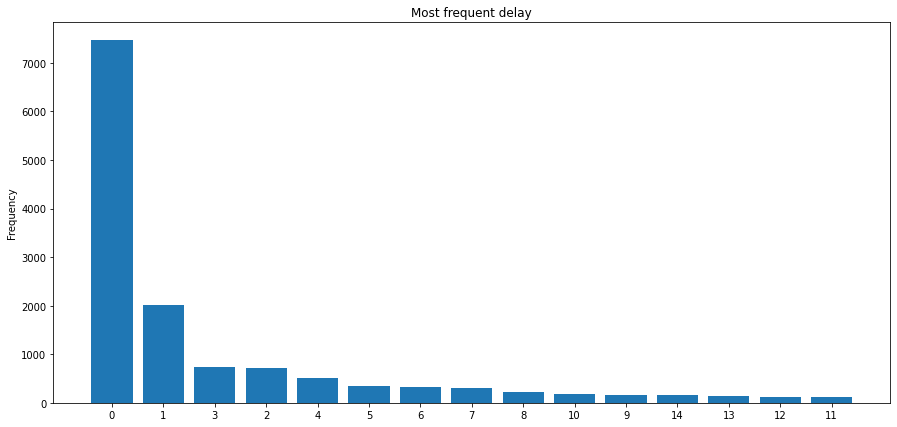

In [291]:
v = vc[:15].values
i = vc[:15].index
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(15), v)
ax.set_ylabel('Frequency')
ax.set_title(f'Most frequent delay')
ax.set_xticks(np.arange(15))
ax.set_xticklabels(i)
plt.show()

### Area

Here I add to the dataset the variable *area* exploiting the file resid_cleaned.txt

In [292]:
resid_df = pd.read_csv(datapath + 'dataset/resid_cleaned.txt', sep = ' ', header=None)
resid_df.columns = ['resid', 'rescode', 'data assunzione', 'area']
resid_df

,resid,rescode,data assunzione,area
0,291,RIS-133,2016-10-17 00:00:00,ACQ
1,292,RIS-061,NaN,AMMINISTRAZIONE
2,296,RIS-159,2017-11-13 00:00:00,ACQ
3,297,RIS-018,2007-07-17 00:00:00,BI
4,300,RIS-104,2015-02-13 00:00:00,BI
...,...,...,...,...
86,1471,RIS-0267,2021-02-01 00:00:00,ACQ
87,1472,RIS-0268,2021-02-01 00:00:00,ACQ
88,1475,RIS-0269,2021-02-15 00:00:00,SOA
89,1476,RIS-0270,2021-04-06 10:00:00,DBA


In [293]:
resid_df.area.unique()

array(['ACQ', 'AMMINISTRAZIONE', 'BI', 'COMMERCIALE MTK', 'DBA',
       'PRESIDIO', 'MARKETING', 'SISTEMISTI', 'SOA', 'DESIGN', 'HR'],
      dtype=object)

In [294]:
resid_df_update = pd.read_csv(datapath + 'dataset/id-area.csv')#, sep = ' ', header=None)
# resid_df_update.columns = ['resid', 'rescode', 'data assunzione', 'area']
resid_df_update

,ID,Gruppi Utenti,Area
0,1439,Business Inteligence,NaN
1,1481,Service Design,NaN
2,1408,Amministrazione,NaN
3,328,Database Administrator,NaN
4,1400,Presidio,NaN
...,...,...,...
74,349,Service Design,NaN
75,379,Amministrazione,NaN
76,1457,Developers,NaN
77,1485,Marketing,NaN


In [295]:
aree = resid_df_update['Gruppi Utenti'].unique()
set([a.strip() for a in aree])

{'Acquisti',
 'Amministrazione',
 'Autentica',
 'Business Inteligence',
 'Commerciale',
 'Consulenti Esterni',
 'Database Administrator',
 'Developers',
 'Legal',
 'Marketing',
 'Presidio',
 'Service Design',
 'Sistemisti'}

In [296]:
len(['SOA', 'DESIGN', 'HR'])

3

{'Acquisti' -> ACQ
 'Amministrazione' -> AMMINISTRAZIONE
 'Autentica' -> AMMINISTRAZIONE
 'Business Inteligence' -> BI
 'Commerciale' -> COMMERCIALE MTK
 'Consulenti Esterni',
 'Database Administrator', -> DBA
 'Developers' -> 'SOA'
 'Legal', -> AMMINISTRAZIONE
 'Marketing' -> MARKETING
 'Presidio' -> PRESIDIO
 'Service Design' -> DESIGN
 'Sistemisti' -> SISTEMISTI}

In [297]:
mapping = resid_df.area
mapping.index = resid_df.resid
mapping

resid
291                 ACQ
292     AMMINISTRAZIONE
296                 ACQ
297                  BI
300                  BI
             ...       
1471                ACQ
1472                ACQ
1475                SOA
1476                DBA
1477                DBA
Name: area, Length: 91, dtype: object

In [298]:
def resid_to_area(r):
    if r in mapping.index:
        return mapping[r]
    else:
        return 'OTHER'

In [299]:
data5['area'] = data5['resid'].apply(lambda x: resid_to_area(x))
data5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,workdesc,jobid,jobtaskid,resid,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,area
23747,Meet per nuovo nome autentica,2865,22058,1430,4187,2.0,6.0,92,0,False,False,False,False,approvato,DESIGN
6701,.,2848,22026,308,59,8.0,6.0,230,7,False,False,False,False,approvato,COMMERCIALE MTK
10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,21154,8.0,6.0,202,2,False,False,True,False,approvato,BI
17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,4466,8.0,6.0,145,4,False,False,True,False,approvato,SOA
725,Monitoraggio AWS,3195,22698,372,4466,6.0,6.0,253,4,False,False,True,False,approvato,SISTEMISTI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,10,1.5,6.0,176,0,False,False,True,True,approvato,PRESIDIO
7987,Approvazioni rapportini,82,25,322,4187,8.0,6.0,215,0,False,False,False,False,approvato,DBA
10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,4466,8.0,6.0,198,0,False,False,True,False,cambio_commessa,SISTEMISTI
6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,4187,3.5,6.0,229,0,False,False,False,False,approvato,DESIGN


### Change dtype

In [300]:
data5.dtypes

workdesc              object
jobid                  int64
jobtaskid              int64
resid                  int64
custid                 int64
qty                  float64
sede                 float64
day                    int64
delay                  int64
flg_trasferta           bool
pay                     bool
flg_prepagato           bool
flg_straordinario       bool
tipo_update           object
area                  object
dtype: object

At the moment jobid, jobtaskid, resid, custid, sede are numerical values. This could lead to misinterpretations, since they are categorical features (no order between resid 322 and 1455).

I could force this by changing the column type. (this operation is not strictly necessary)

In [301]:
data5[['jobid','jobtaskid', 'resid', 'custid', 'sede']] = data5[['jobid','jobtaskid', 'resid', 'custid', 'sede']].astype(str)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [302]:
data5[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']] = data5[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [303]:
data5.dtypes

workdesc              object
jobid                 object
jobtaskid             object
resid                 object
custid                object
qty                  float64
sede                  object
day                    int64
delay                  int64
flg_trasferta          int64
pay                    int64
flg_prepagato          int64
flg_straordinario      int64
tipo_update           object
area                  object
dtype: object

In [304]:
data5.describe(include='all')

,workdesc,jobid,jobtaskid,resid,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,area
count,14861,14861,14861,14861,14861,14861.000000,14861,14861.000000,14861.000000,14861.000000,14861.000000,14861.000000,14861.000000,14861,14861
unique,11203,334,620,97,119,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,2,12
top,.,280,24,1445,4187,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,approvato,SISTEMISTI
freq,162,1510,1306,936,4705,NaN,10488,NaN,NaN,NaN,NaN,NaN,NaN,13588,3811
mean,NaN,NaN,NaN,NaN,NaN,4.023047,NaN,169.087074,3.628222,0.039432,0.090976,0.413364,0.032770,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2.985591,NaN,64.122167,7.010571,0.194627,0.287585,0.492454,0.178041,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,226.000000,4.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN


In [305]:
data5 = data5[['workdesc', 'jobid', 'jobtaskid', 'resid', 'area', 'custid', 'qty', 'sede', 'day', 'delay', 'flg_trasferta', 'pay', 'flg_prepagato', 'flg_straordinario', 'tipo_update']]
data5

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
23747,Meet per nuovo nome autentica,2865,22058,1430,DESIGN,4187,2.0,6.0,92,0,0,0,0,0,approvato
6701,.,2848,22026,308,COMMERCIALE MTK,59,8.0,6.0,230,7,0,0,0,0,approvato
10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,BI,21154,8.0,6.0,202,2,0,0,1,0,approvato
17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,SOA,4466,8.0,6.0,145,4,0,0,1,0,approvato
725,Monitoraggio AWS,3195,22698,372,SISTEMISTI,4466,6.0,6.0,253,4,0,0,1,0,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,PRESIDIO,10,1.5,6.0,176,0,0,0,1,1,approvato
7987,Approvazioni rapportini,82,25,322,DBA,4187,8.0,6.0,215,0,0,0,0,0,approvato
10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,SISTEMISTI,4466,8.0,6.0,198,0,0,0,1,0,cambio_commessa
6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,DESIGN,4187,3.5,6.0,229,0,0,0,0,0,approvato


In [ ]:
# data5.to_csv(datapath + 'dataset/data_text.csv', index=False)

## Remove duplicates

In [306]:
# data5 = pd.read_csv(datapath + 'dataset/data_text.csv')
data5[['jobid','jobtaskid', 'resid', 'custid', 'sede']] = data5[['jobid','jobtaskid', 'resid', 'custid', 'sede']].astype(str)
data5[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']] = data5[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']].astype(int)

In [307]:
data5.describe(include='all')

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
count,14861,14861,14861,14861,14861,14861,14861.000000,14861,14861.000000,14861.000000,14861.000000,14861.000000,14861.000000,14861.000000,14861
unique,11203,334,620,97,12,119,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,2
top,.,280,24,1445,SISTEMISTI,4187,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,approvato
freq,162,1510,1306,936,3811,4705,NaN,10488,NaN,NaN,NaN,NaN,NaN,NaN,13588
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.023047,NaN,169.087074,3.628222,0.039432,0.090976,0.413364,0.032770,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.985591,NaN,64.122167,7.010571,0.194627,0.287585,0.492454,0.178041,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,226.000000,4.000000,0.000000,0.000000,1.000000,0.000000,NaN


In [308]:
data6 = data5[~data5.duplicated()]
data6

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
23747,Meet per nuovo nome autentica,2865,22058,1430,DESIGN,4187,2.0,6.0,92,0,0,0,0,0,approvato
6701,.,2848,22026,308,COMMERCIALE MTK,59,8.0,6.0,230,7,0,0,0,0,approvato
10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,BI,21154,8.0,6.0,202,2,0,0,1,0,approvato
17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,SOA,4466,8.0,6.0,145,4,0,0,1,0,approvato
725,Monitoraggio AWS,3195,22698,372,SISTEMISTI,4466,6.0,6.0,253,4,0,0,1,0,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,PRESIDIO,10,1.5,6.0,176,0,0,0,1,1,approvato
7987,Approvazioni rapportini,82,25,322,DBA,4187,8.0,6.0,215,0,0,0,0,0,approvato
10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,SISTEMISTI,4466,8.0,6.0,198,0,0,0,1,0,cambio_commessa
6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,DESIGN,4187,3.5,6.0,229,0,0,0,0,0,approvato


In [309]:
data6.describe(include='all')

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
count,14842,14842,14842,14842,14842,14842,14842.000000,14842,14842.000000,14842.000000,14842.000000,14842.000000,14842.000000,14842.000000,14842
unique,11203,334,620,97,12,119,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,2
top,.,280,24,1445,SISTEMISTI,4187,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,approvato
freq,158,1509,1306,936,3809,4697,NaN,10479,NaN,NaN,NaN,NaN,NaN,NaN,13573
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.022099,NaN,169.084625,3.625522,0.039483,0.091093,0.413826,0.032812,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.984860,NaN,64.101873,7.011646,0.194747,0.287751,0.492535,0.178151,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,226.000000,4.000000,0.000000,0.000000,1.000000,0.000000,NaN


In [ ]:
# data6.to_csv(datapath + 'dataset/data6.csv', index=False)

# Exploration after pre-processing

In [310]:
# data6 = pd.read_csv(datapath + 'dataset/data6.csv')
data6[['jobid','jobtaskid', 'resid', 'custid', 'sede']] = data6[['jobid','jobtaskid', 'resid', 'custid', 'sede']].astype(str)
data6[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']] = data6[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [311]:
data6

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
23747,Meet per nuovo nome autentica,2865,22058,1430,DESIGN,4187,2.0,6.0,92,0,0,0,0,0,approvato
6701,.,2848,22026,308,COMMERCIALE MTK,59,8.0,6.0,230,7,0,0,0,0,approvato
10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,BI,21154,8.0,6.0,202,2,0,0,1,0,approvato
17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,SOA,4466,8.0,6.0,145,4,0,0,1,0,approvato
725,Monitoraggio AWS,3195,22698,372,SISTEMISTI,4466,6.0,6.0,253,4,0,0,1,0,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,PRESIDIO,10,1.5,6.0,176,0,0,0,1,1,approvato
7987,Approvazioni rapportini,82,25,322,DBA,4187,8.0,6.0,215,0,0,0,0,0,approvato
10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,SISTEMISTI,4466,8.0,6.0,198,0,0,0,1,0,cambio_commessa
6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,DESIGN,4187,3.5,6.0,229,0,0,0,0,0,approvato


In [312]:
data6.describe(include='all')

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
count,14842,14842,14842,14842,14842,14842,14842.000000,14842,14842.000000,14842.000000,14842.000000,14842.000000,14842.000000,14842.000000,14842
unique,11203,334,620,97,12,119,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,2
top,.,280,24,1445,SISTEMISTI,4187,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,approvato
freq,158,1509,1306,936,3809,4697,NaN,10479,NaN,NaN,NaN,NaN,NaN,NaN,13573
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.022099,NaN,169.084625,3.625522,0.039483,0.091093,0.413826,0.032812,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.984860,NaN,64.101873,7.011646,0.194747,0.287751,0.492535,0.178151,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,226.000000,4.000000,0.000000,0.000000,1.000000,0.000000,NaN


### Missing values

In [313]:
# Check how missing values are distributed across each variable (i.e., column)
print(f'Total number of rows: {data6.shape[0]}')
print()
print('MISSING VALUES PER VARIABLE:\n')
data6.apply(lambda x: sum(x.isnull())) # apply applies the function column-wise

Total number of rows: 14842

MISSING VALUES PER VARIABLE:



workdesc             0
jobid                0
jobtaskid            0
resid                0
area                 0
custid               0
qty                  0
sede                 0
day                  0
delay                0
flg_trasferta        0
pay                  0
flg_prepagato        0
flg_straordinario    0
tipo_update          0
dtype: int64

### Response variable

In [314]:
data6.tipo_update.value_counts()

approvato          13573
cambio_commessa     1269
Name: tipo_update, dtype: int64

In [315]:
print(f'Percentuale di cambio_commessa = {100*data6.tipo_update.value_counts()[1]/(data6.tipo_update.value_counts()[0]+data6.tipo_update.value_counts()[1]): .2f}%')
print(f'Percentuale di approvato = {100*data6.tipo_update.value_counts()[0]/(data6.tipo_update.value_counts()[0]+data6.tipo_update.value_counts()[1]): .2f}%')

Percentuale di cambio_commessa =  8.55%
Percentuale di approvato =  91.45%


## Predictive variables

In [316]:
# Auxiliary function

def plot_most_freq5(variable, k):

    '''plot the frequency of the k most frequent values of a variable'''

    vc = data6[variable].value_counts() # count values 

    if k == data6[variable].nunique():
        v = vc.values
        i = vc.index
    
    else: 
        v = vc[:k].values
        i = vc[:k].index

    fig, ax = plt.subplots(figsize=(15,7))
    ax.bar(range(k), v)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Most frequent {variable}')
    ax.set_xticks(np.arange(k))
    ax.set_xticklabels(i)
    plt.show()

In [317]:
data6.head()

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
23747,Meet per nuovo nome autentica,2865,22058,1430,DESIGN,4187,2.0,6.0,92,0,0,0,0,0,approvato
6701,.,2848,22026,308,COMMERCIALE MTK,59,8.0,6.0,230,7,0,0,0,0,approvato
10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,BI,21154,8.0,6.0,202,2,0,0,1,0,approvato
17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,SOA,4466,8.0,6.0,145,4,0,0,1,0,approvato
725,Monitoraggio AWS,3195,22698,372,SISTEMISTI,4466,6.0,6.0,253,4,0,0,1,0,approvato


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

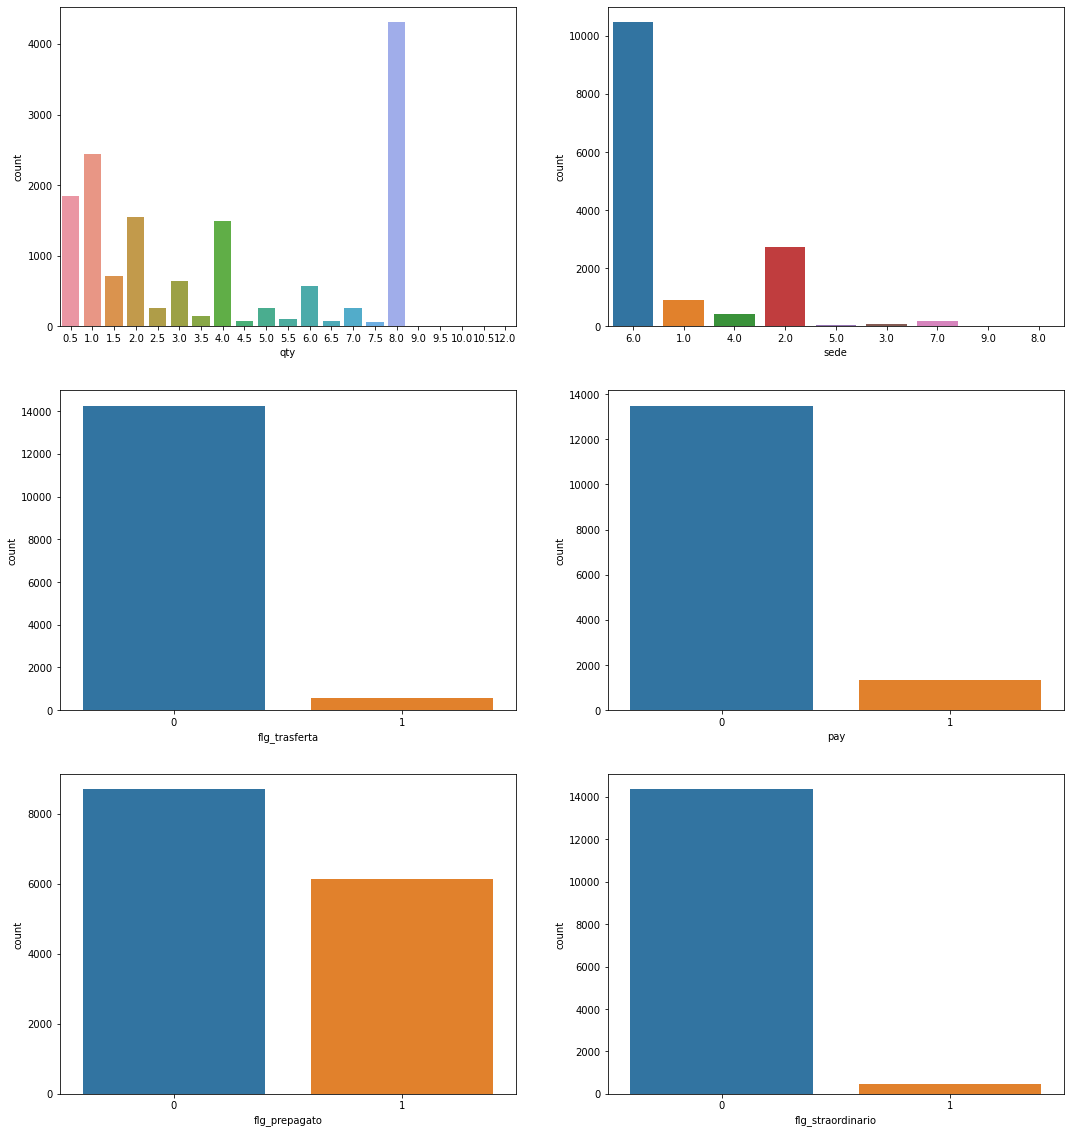

In [318]:
# For categorical variables, 'countplot' is the way to go
fig, axes = plt.subplots(3, 2, figsize=(18,20))

# Plots
sns.countplot(data6['qty'], ax=axes[0,0])
sns.countplot(data6['sede'], ax=axes[0,1])
sns.countplot(data6['flg_trasferta'], ax=axes[1,0])
sns.countplot(data6['pay'], ax=axes[1,1])
sns.countplot(data6['flg_prepagato'], ax=axes[2,0])
sns.countplot(data6['flg_straordinario'], ax=axes[2,1])

# plt.subplots_adjust(wspace=.5, hspace=.4)

#### jobid = commessa

In [319]:
data6.jobid.nunique()

334

In [320]:
data6.jobid.value_counts()

280     1509
81      1354
2848    1056
83       878
3006     825
        ... 
3295       1
3169       1
2620       1
2538       1
3255       1
Name: jobid, Length: 334, dtype: int64

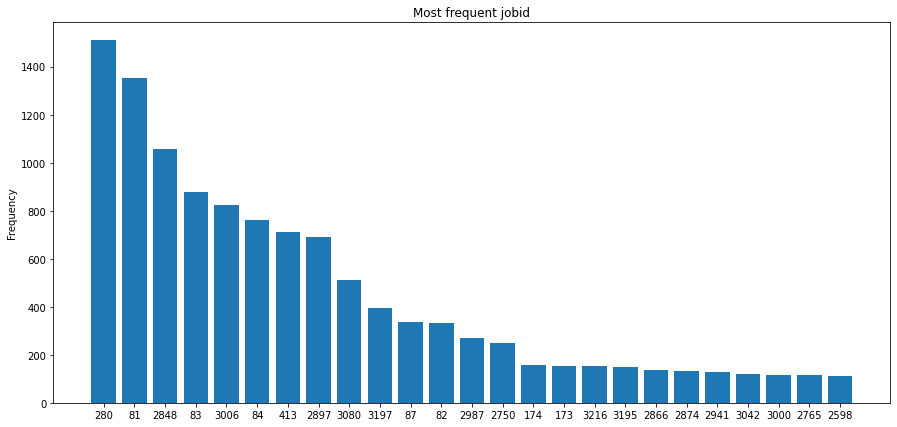

In [321]:
plot_most_freq5('jobid', 25)

### jobtaskid = sottocommessa



In [322]:
data6.jobtaskid.nunique()

620

In [323]:
data6.jobtaskid.value_counts()

24       1306
746      1164
22026     924
26        693
22352     604
         ... 
22290       1
21976       1
60          1
21357       1
21230       1
Name: jobtaskid, Length: 620, dtype: int64

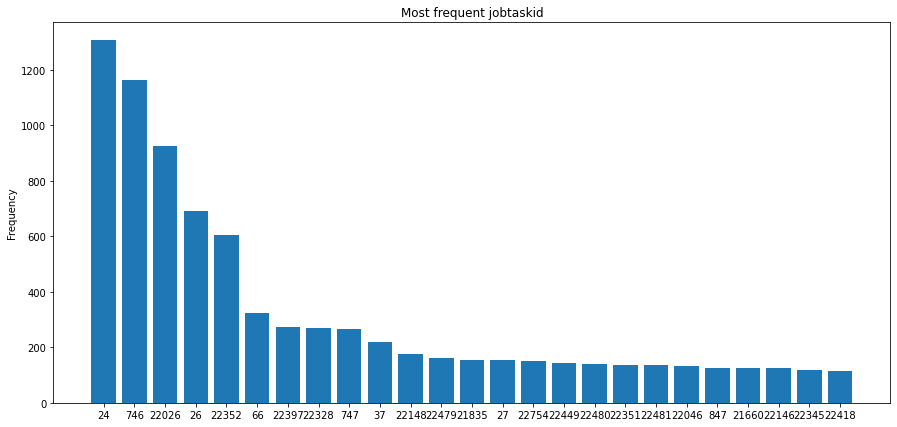

In [324]:
plot_most_freq5('jobtaskid', 25)

### resid = persona

Questa è la risorsa, la persona

In [325]:
data6.resid.nunique()

97

In [326]:
data6.resid.value_counts()

1445    936
367     601
320     420
339     400
369     375
       ... 
353       7
1415      5
306       4
1476      3
1477      1
Name: resid, Length: 97, dtype: int64

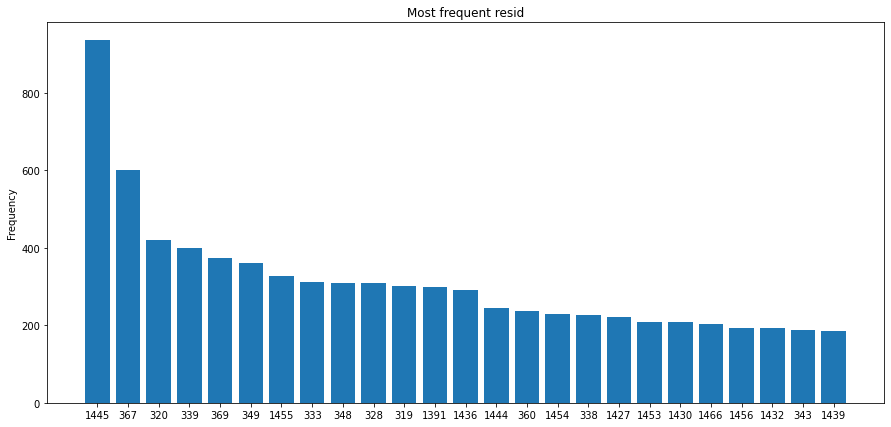

In [327]:
plot_most_freq5('resid', 25)

In [328]:
data6.workdesc[data6.resid=='1476']

67      - Allineamento \n- Capitolo 4 Libro Oracle 
63                  Capitolo 3 del libro di Oracle 
205    Studio slide Oracle (corso interno database)
Name: workdesc, dtype: object

### area

In [329]:
data6.area.nunique()

12

In [330]:
data6.area.value_counts()

SISTEMISTI         3809
DBA                2466
PRESIDIO           1856
BI                 1810
SOA                1784
OTHER               666
DESIGN              646
ACQ                 613
MARKETING           520
COMMERCIALE MTK     386
AMMINISTRAZIONE     198
HR                   88
Name: area, dtype: int64

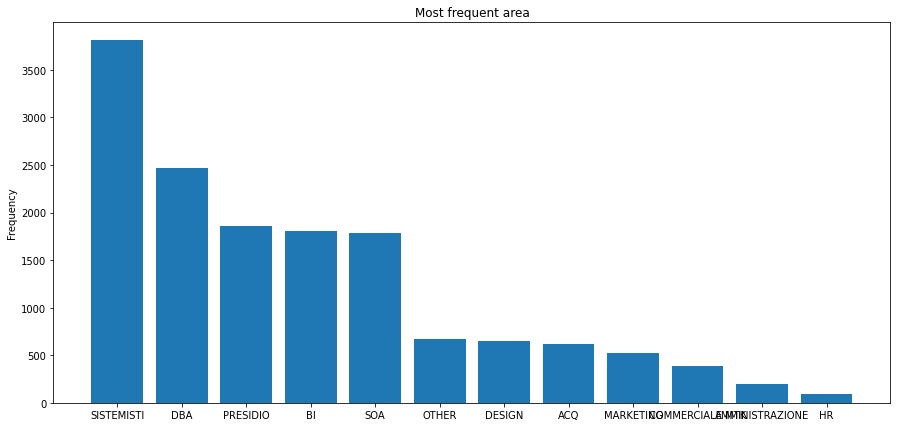

In [331]:
plot_most_freq5('area', 12)

### custid = customer id

In [332]:
data6.custid.nunique()

119

In [333]:
data6.custid.value_counts()

4187     4697
59       2448
4466     2297
10       1509
4243      441
         ... 
4253        1
4244        1
21230       1
9           1
4449        1
Name: custid, Length: 119, dtype: int64

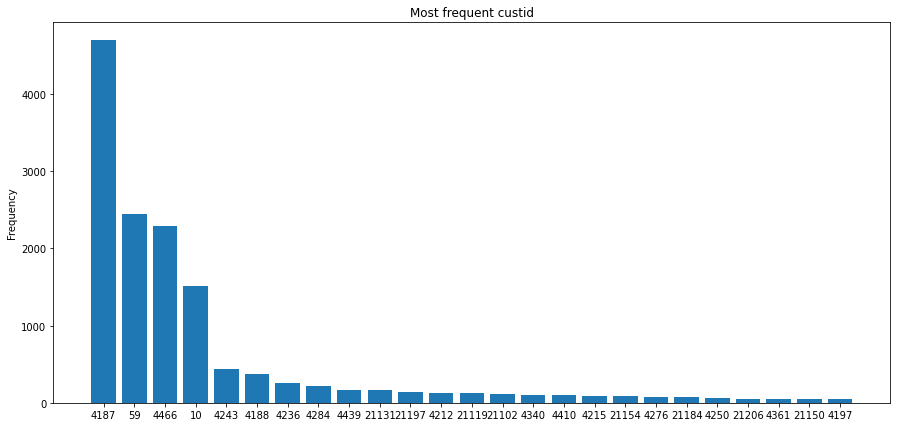

In [334]:
plot_most_freq5('custid', 25)

### qty = numero ore

Numero di ore

In [335]:
n_qty = data6.qty.nunique()
n_qty

21

In [336]:
data6.qty.value_counts()

8.0     4311
1.0     2438
0.5     1846
2.0     1551
4.0     1495
1.5      711
3.0      644
6.0      571
2.5      266
7.0      264
5.0      255
3.5      154
5.5      103
4.5       83
6.5       72
7.5       69
9.0        4
10.0       2
12.0       1
10.5       1
9.5        1
Name: qty, dtype: int64

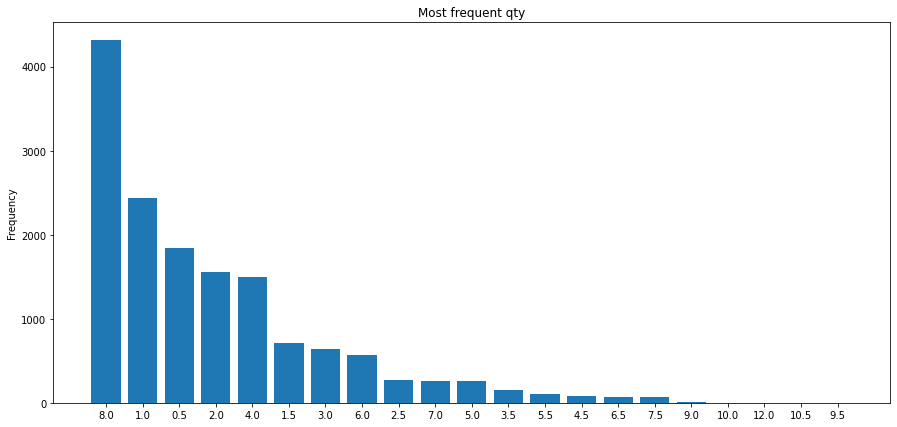

In [337]:
plot_most_freq5('qty', n_qty)

### sede

In [338]:
data6.sede.nunique()

9

4 "Presidio Regione del Veneto" "Presidio Regione del Veneto" 4

7 "Cliente" "Cliente" 7

8 "Cliente no pranzo" "Cliente no pranzo" 8

9 "Cliente con maggiorazione" "Cliente con maggiorazione" 9

5 "Formazione" "Formazione" 11

6 "Lavoro da casa" "Lavoro da casa" 12

2 "Sede Thiene" "Thiene" 1

1 "Sede Padova" "Padova" 2

3 "Presidio Azienda Zero" "Presidio Azienda Zero" 3

In [339]:
data6.sede.value_counts()

6.0    10479
2.0     2729
1.0      897
4.0      422
7.0      175
3.0       89
5.0       37
8.0       13
9.0        1
Name: sede, dtype: int64

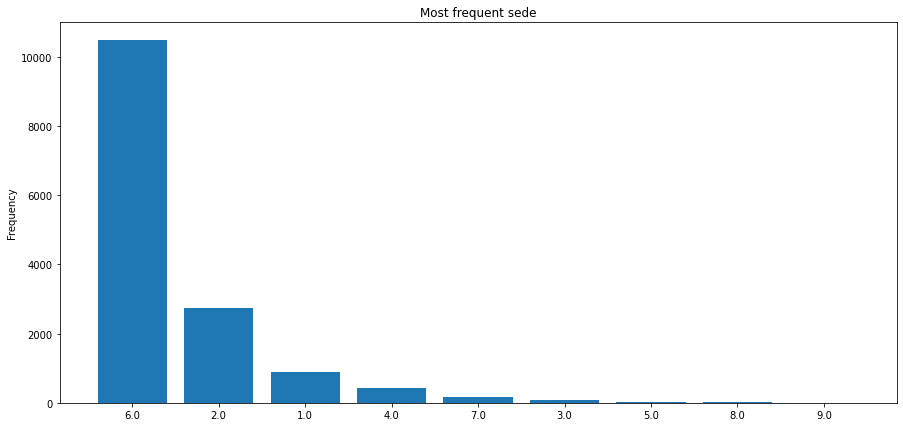

In [340]:
plot_most_freq5('sede', 9)

### flg_trasferta

Se l’attività è stata svolta presso il cliente va spuntato il flag Trasferta che automaticamente alimenta il report delle trasferte mensili.
Il flag Trasferta indica  che l’attività è fatta presso la sede del cliente.




In [341]:
data6.flg_trasferta.nunique()

2

In [342]:
data6.flg_trasferta.value_counts()

0    14256
1      586
Name: flg_trasferta, dtype: int64

### pay = flag fatturare

In [343]:
data6.pay.nunique()

2

In [344]:
data6.pay.value_counts()

0    13490
1     1352
Name: pay, dtype: int64

OSS: solo in 3 casi sia pay sia prepagato sono entrambi veri

In [345]:
np.sum(np.logical_and(data6.pay == True, data6.flg_prepagato == True))

2

In [346]:
data6[np.logical_and(data6.pay == True, data6.flg_prepagato == True)]

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
17578,investigato problema auth multifactor per kb.o...,3149,22614,337,SISTEMISTI,4370,8.0,6.0,140,7,0,1,1,0,approvato
17576,"fix puppeteer per DRES, aggiornamento sfeamt06",3149,22614,337,SISTEMISTI,4370,8.0,6.0,147,0,0,1,1,0,approvato


### flg_prepagato

I flag Fatturare e prepagata sono precompilati di default. Se per caso modificate tali flag scrivete nelle note tecniche il motivo per cui è stata fatta la modifica.


In [347]:
data6.flg_prepagato.nunique()

2

In [348]:
data6.flg_prepagato.value_counts()

0    8700
1    6142
Name: flg_prepagato, dtype: int64

### flg_straordinario

In [349]:
data6.flg_straordinario.nunique()

2

In [350]:
data6.flg_straordinario.value_counts()

0    14355
1      487
Name: flg_straordinario, dtype: int64

# Exploration part 2

## Distribuzione di alcune variabili e loro relazione con tipo_update

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

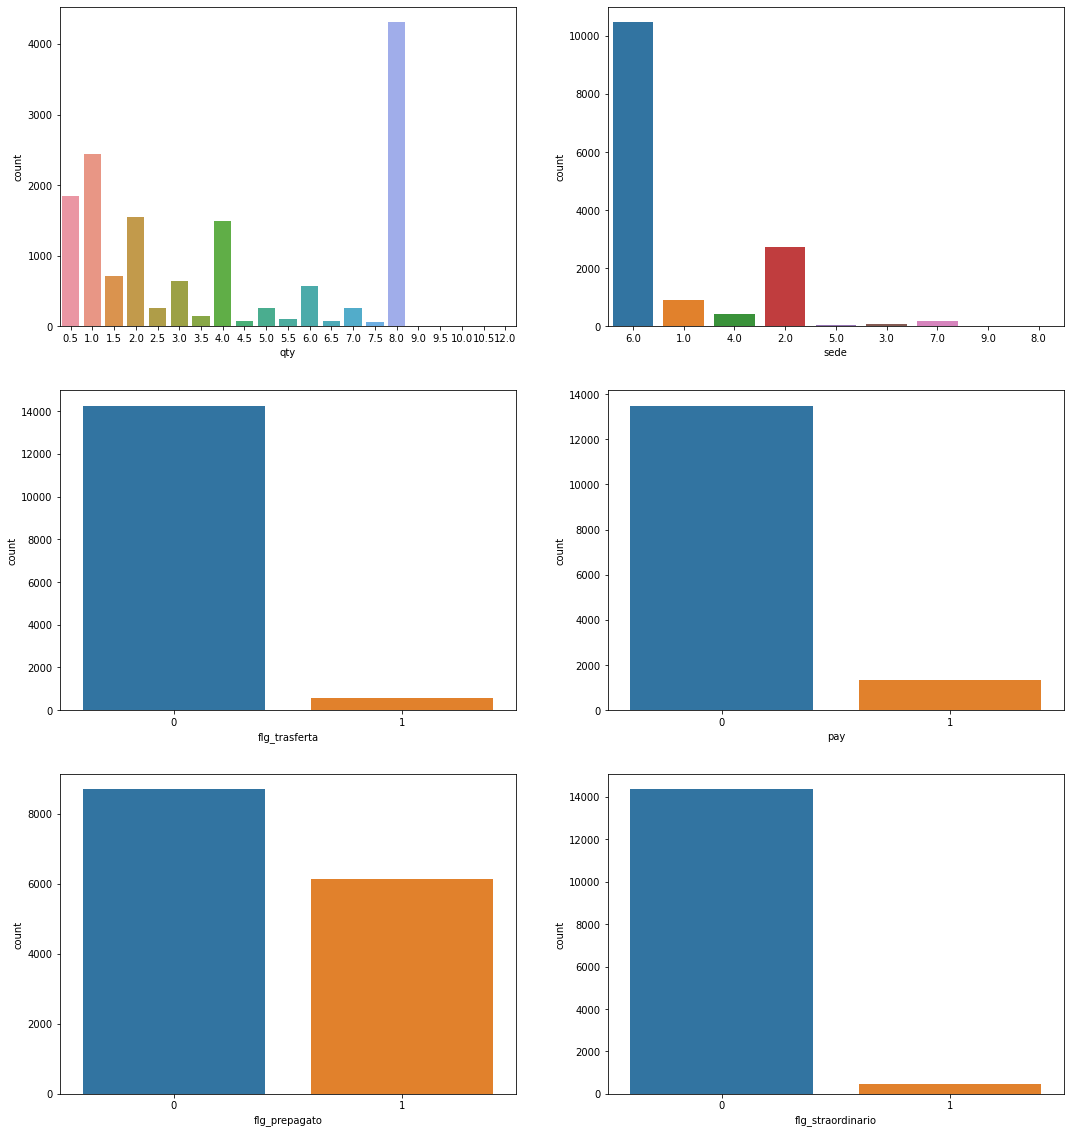

In [351]:
# For categorical variables, 'countplot' is the way to go
fig, axes = plt.subplots(3, 2, figsize=(18,20))

# Plots
sns.countplot(data6['qty'], ax=axes[0,0])
sns.countplot(data6['sede'], ax=axes[0,1])
sns.countplot(data6['flg_trasferta'], ax=axes[1,0])
sns.countplot(data6['pay'], ax=axes[1,1])
sns.countplot(data6['flg_prepagato'], ax=axes[2,0])
sns.countplot(data6['flg_straordinario'], ax=axes[2,1])

# plt.subplots_adjust(wspace=.5, hspace=.4)

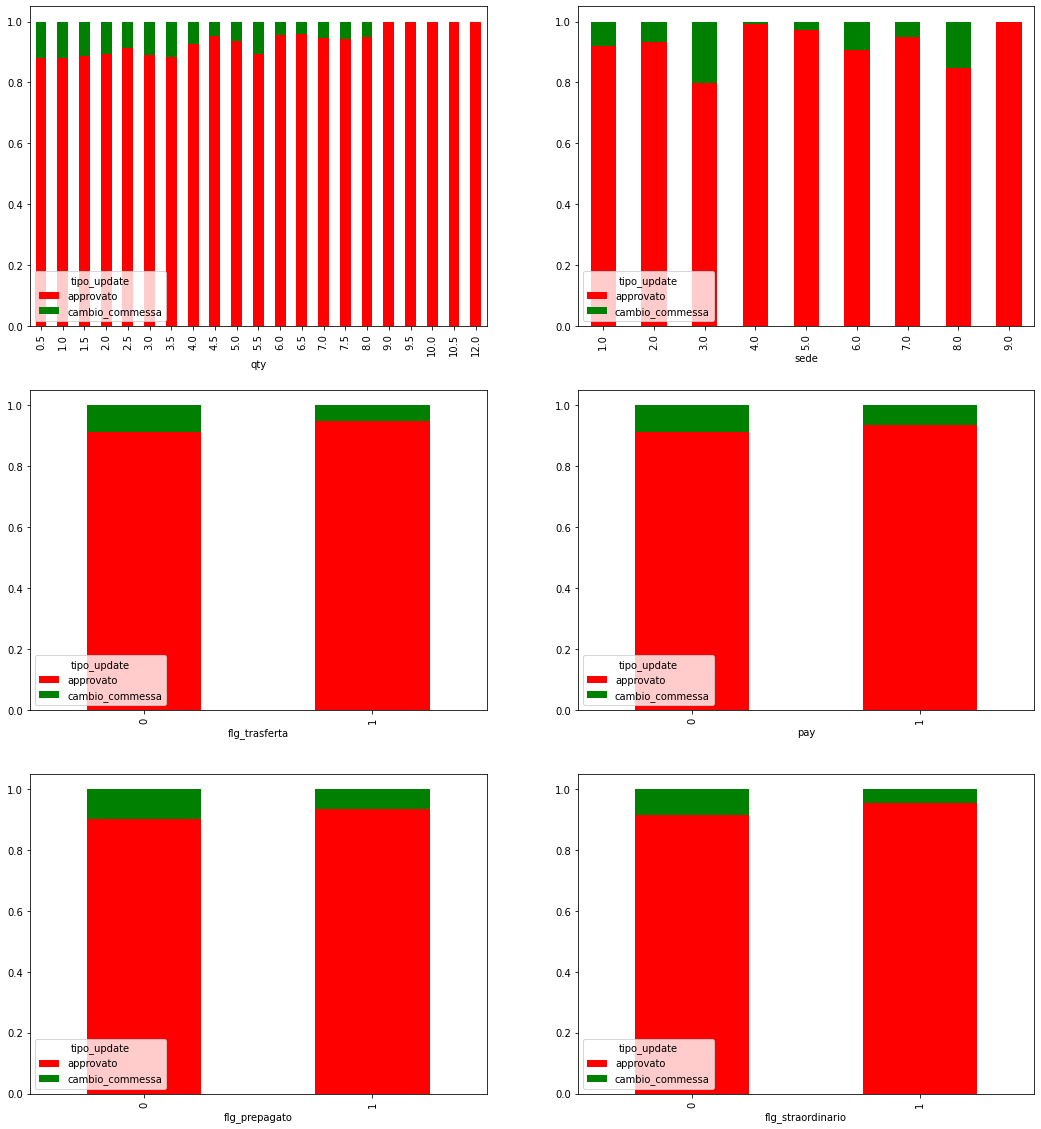

In [352]:
fig, axes = plt.subplots(3, 2, figsize=(18,20))
cols = ['qty', 'sede', 'flg_trasferta', 'pay', 'flg_prepagato', 'flg_straordinario']
i = 0
for c in cols:
    tmp_data = pd.crosstab(data6.loc[:, c], data6.tipo_update)
    # pandas.crosstab returns an mxn table where m is the number of values for the first argument (x) 
    # and n for the second argument (y)
    # As the second argument is always data6.tipo_update, n = 2 (tipo_update is binary!)
    # e.g., x = 'sede'; y = 'tipo_update'
    # the following apply is used to transform the crosstab into a "normalized" table as follows:
    # each entry in the table displays how the i-th categorical value of x (i.e., i-th row) is distributed across
    # all the possible values of y (i.e., approvato/cambio_commessa)
    tmp_data = tmp_data.apply(lambda x: x/tmp_data.sum(axis=1))
    tmp_data.plot.bar(stacked=True, color=['red','green'], grid=False, ax=axes[i//2, i % 2], legend=True)
    i += 1


*   La variabile qty, non ha cambi_commessa per valori sopra le 9 ore, ma questi sono pochi, quindi non è indicativo
*   Riassumendo, nessuna di queste variabili sembra essere discriminante per la predizione di tipo_update. Tuttavia, potrebberlo esserlo per il task di identificazione della commessa corretta 




## tipo_update ~ resid

In [353]:
# data4 = pd.read_csv(datapath + 'dataset/data4.csv')
data6

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
23747,Meet per nuovo nome autentica,2865,22058,1430,DESIGN,4187,2.0,6.0,92,0,0,0,0,0,approvato
6701,.,2848,22026,308,COMMERCIALE MTK,59,8.0,6.0,230,7,0,0,0,0,approvato
10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,BI,21154,8.0,6.0,202,2,0,0,1,0,approvato
17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,SOA,4466,8.0,6.0,145,4,0,0,1,0,approvato
725,Monitoraggio AWS,3195,22698,372,SISTEMISTI,4466,6.0,6.0,253,4,0,0,1,0,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,PRESIDIO,10,1.5,6.0,176,0,0,0,1,1,approvato
7987,Approvazioni rapportini,82,25,322,DBA,4187,8.0,6.0,215,0,0,0,0,0,approvato
10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,SISTEMISTI,4466,8.0,6.0,198,0,0,0,1,0,cambio_commessa
6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,DESIGN,4187,3.5,6.0,229,0,0,0,0,0,approvato


### resource-level analysis

In [354]:
resid_group = data6.groupby(['resid'])

result = []
for name, group in resid_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

result = sorted(result, key=itemgetter(1), reverse=True)
result

[('1471', 0.34210526315789475),
 ('1417', 0.29411764705882354),
 ('330', 0.2621359223300971),
 ('1458', 0.20134228187919462),
 ('1456', 0.19072164948453607),
 ('1444', 0.17959183673469387),
 ('339', 0.1725),
 ('1441', 0.17197452229299362),
 ('1391', 0.1610738255033557),
 ('342', 0.16101694915254236),
 ('372', 0.1557377049180328),
 ('300', 0.1503267973856209),
 ('349', 0.14917127071823205),
 ('1424', 0.13924050632911392),
 ('367', 0.13810316139767054),
 ('1445', 0.12713675213675213),
 ('1432', 0.12435233160621761),
 ('322', 0.12209302325581395),
 ('1455', 0.11890243902439024),
 ('348', 0.11612903225806452),
 ('1429', 0.11428571428571428),
 ('373', 0.11333333333333333),
 ('1434', 0.112),
 ('343', 0.1111111111111111),
 ('345', 0.11029411764705882),
 ('340', 0.10416666666666667),
 ('1461', 0.10256410256410256),
 ('1454', 0.1),
 ('319', 0.09966777408637874),
 ('1466', 0.09852216748768473),
 ('1400', 0.09821428571428571),
 ('327', 0.0967741935483871),
 ('1463', 0.09333333333333334),
 ('1438'

In [355]:
len(result)

97

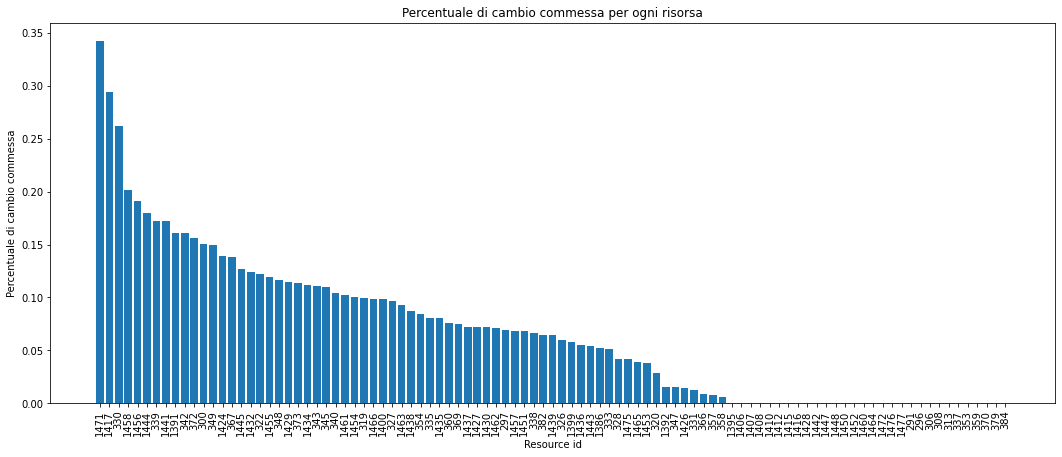

In [356]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Resource id')
ax.set_title(f'Percentuale di cambio commessa per ogni risorsa')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

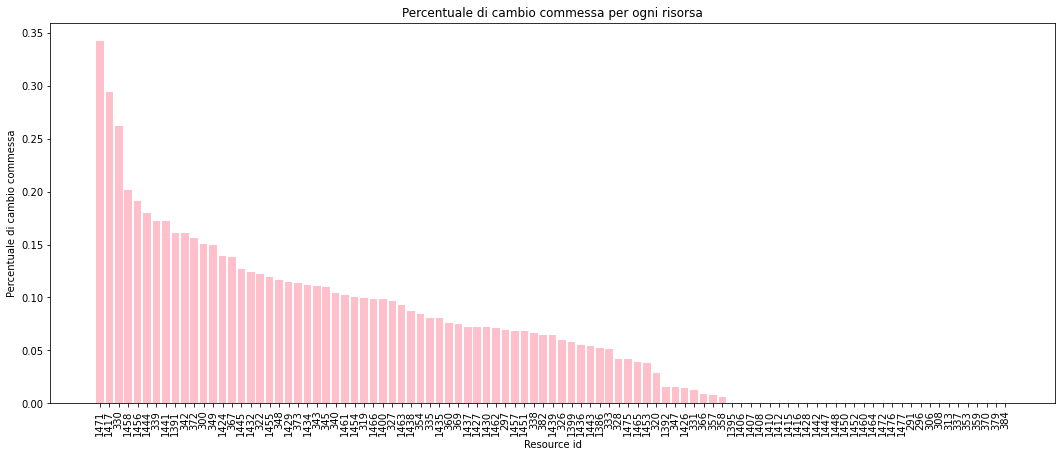

In [357]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result], color='pink')
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Resource id')
ax.set_title(f'Percentuale di cambio commessa per ogni risorsa')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

### number of jobid per resource

In [358]:
resid_group = data6.groupby(['resid'])

result = []
for name, group in resid_group:
    n_jobid = group.jobid.nunique()
    result.append((name, n_jobid))
    # print(name, n_cambio/group.shape[0])

result = sorted(result, key=itemgetter(1), reverse=True)
result

[('339', 66),
 ('367', 66),
 ('319', 55),
 ('369', 55),
 ('1445', 47),
 ('327', 42),
 ('1391', 37),
 ('320', 37),
 ('328', 33),
 ('348', 33),
 ('300', 31),
 ('360', 31),
 ('1427', 30),
 ('1432', 30),
 ('322', 29),
 ('338', 29),
 ('1424', 26),
 ('345', 22),
 ('349', 21),
 ('1399', 20),
 ('1435', 20),
 ('1438', 20),
 ('382', 20),
 ('1455', 19),
 ('343', 19),
 ('1429', 16),
 ('335', 16),
 ('340', 16),
 ('373', 16),
 ('1436', 15),
 ('1430', 14),
 ('354', 14),
 ('1439', 13),
 ('1451', 13),
 ('1456', 13),
 ('1437', 12),
 ('1441', 12),
 ('1458', 12),
 ('326', 12),
 ('1443', 10),
 ('1457', 10),
 ('1444', 9),
 ('1454', 9),
 ('1465', 9),
 ('297', 9),
 ('333', 9),
 ('1416', 8),
 ('1426', 8),
 ('1434', 8),
 ('1466', 8),
 ('1475', 7),
 ('366', 7),
 ('370', 7),
 ('1386', 6),
 ('1453', 6),
 ('1461', 6),
 ('372', 6),
 ('342', 5),
 ('1400', 4),
 ('1417', 4),
 ('1462', 4),
 ('1463', 4),
 ('1464', 3),
 ('330', 3),
 ('331', 3),
 ('358', 3),
 ('1428', 2),
 ('1450', 2),
 ('1460', 2),
 ('1471', 2),
 ('296', 

In [359]:
print(f'Numero medio di jobid per risorsa = {np.mean([r[1] for r in result]):.2f}')

Numero medio di jobid per risorsa = 12.84


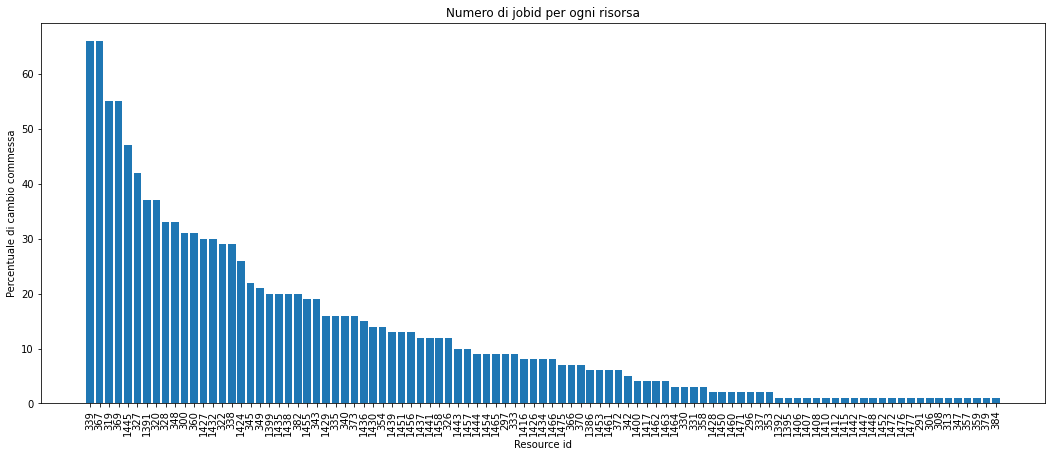

In [360]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Resource id')
ax.set_title(f'Numero di jobid per ogni risorsa')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

### area-level analysis

Ho salvato il testo della mail "risorse" su un file txt. Qui lo importo come dataframe. Contiene informazioni sull'area e la data d'assunzione.

In [361]:
# resid_df = pd.read_csv(datapath + 'dataset/resid_cleaned.txt', sep = ' ', header=None)
resid_df.columns = ['resid', 'rescode', 'data assunzione', 'area']
resid_df

,resid,rescode,data assunzione,area
0,291,RIS-133,2016-10-17 00:00:00,ACQ
1,292,RIS-061,NaN,AMMINISTRAZIONE
2,296,RIS-159,2017-11-13 00:00:00,ACQ
3,297,RIS-018,2007-07-17 00:00:00,BI
4,300,RIS-104,2015-02-13 00:00:00,BI
...,...,...,...,...
86,1471,RIS-0267,2021-02-01 00:00:00,ACQ
87,1472,RIS-0268,2021-02-01 00:00:00,ACQ
88,1475,RIS-0269,2021-02-15 00:00:00,SOA
89,1476,RIS-0270,2021-04-06 10:00:00,DBA


In [362]:
resid_area = resid_df.groupby(['area'])

areas = {}
for name, group in resid_area:
    areas[name] = list(group.resid)
    
for k,v in areas.items():
    print(f'{k:15} {v}')

ACQ             [291, 296, 313, 384, 1407, 1448, 1464, 1471, 1472]
AMMINISTRAZIONE [292, 379, 1408]
BI              [297, 300, 306, 370, 1391, 1424, 1436, 1439, 1444, 1455]
COMMERCIALE MTK [308, 1395, 1426, 1447]
DBA             [319, 320, 322, 326, 327, 328, 1399, 1427, 1432, 1438, 1460, 1461, 1466, 1476, 1477]
DESIGN          [349, 1430, 1465]
HR              [1410]
MARKETING       [333, 1453]
PRESIDIO        [330, 331, 341, 342, 347, 357, 358, 359, 366, 1386, 1392, 1406, 1416, 1428, 1437, 1442, 1450]
SISTEMISTI      [335, 337, 338, 339, 340, 343, 345, 367, 369, 372, 382, 1400, 1443, 1445, 1458]
SOA             [348, 354, 360, 373, 1412, 1434, 1441, 1456, 1457, 1462, 1463, 1475]


In [363]:
for k,v in areas.items():
    print(f'{k:15} {len(v)}')

ACQ             9
AMMINISTRAZIONE 3
BI              10
COMMERCIALE MTK 4
DBA             15
DESIGN          3
HR              1
MARKETING       2
PRESIDIO        17
SISTEMISTI      15
SOA             12


NB: nel file resid ci sono id assenti nel dataset e viceversa

In [364]:
mapping = resid_df.area
mapping.index = resid_df.resid
mapping

resid
291                 ACQ
292     AMMINISTRAZIONE
296                 ACQ
297                  BI
300                  BI
             ...       
1471                ACQ
1472                ACQ
1475                SOA
1476                DBA
1477                DBA
Name: area, Length: 91, dtype: object

In [366]:
resid_group = data6.groupby(['resid'])

cambio_area = {}
tot_area = {}
check_area = {}
for name, group in resid_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    # n_safe = server_group[server_group.TYPE == 0].shape[0]
    # result_area.get(mapping[name], []).append(n_cambio/group.shape[0]))
    
    # if name in [292, 379, 1408]:
    #     print(name)

    if name in mapping.index:
        check_area[mapping[name]] = check_area.get(mapping[name], 0) + 1
        cambio_area[mapping[name]] = cambio_area.get(mapping[name], 0) + n_cambio
        tot_area[mapping[name]] = tot_area.get(mapping[name], 0) + group.shape[0]
    
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
# result

In [ ]:
# Check
for k,v in check_area.items():
    print(f'Area: {k:17} -> number of resources: {v}')

Area: ACQ               -> number of resources: 9
Area: BI                -> number of resources: 10
Area: COMMERCIALE MTK   -> number of resources: 4
Area: DBA               -> number of resources: 15
Area: PRESIDIO          -> number of resources: 16
Area: MARKETING         -> number of resources: 2
Area: SISTEMISTI        -> number of resources: 15
Area: SOA               -> number of resources: 12
Area: DESIGN            -> number of resources: 3
Area: AMMINISTRAZIONE   -> number of resources: 2
Area: HR                -> number of resources: 1


In [ ]:
for k,v in cambio_area.items():
    print(f'Area: {k:17} -> cambio_commessa: {v}')

Area: ACQ               -> cambio_commessa: 20
Area: BI                -> cambio_commessa: 347
Area: COMMERCIALE MTK   -> cambio_commessa: 5
Area: DBA               -> cambio_commessa: 328
Area: PRESIDIO          -> cambio_commessa: 115
Area: MARKETING         -> cambio_commessa: 39
Area: SISTEMISTI        -> cambio_commessa: 754
Area: SOA               -> cambio_commessa: 302
Area: DESIGN            -> cambio_commessa: 107
Area: AMMINISTRAZIONE   -> cambio_commessa: 1
Area: HR                -> cambio_commessa: 0


In [ ]:
for k,v in tot_area.items():
    print(f'Area: {k:17} -> tot: {v}')

Area: ACQ               -> tot: 1039
Area: BI                -> tot: 3052
Area: COMMERCIALE MTK   -> tot: 659
Area: DBA               -> tot: 4035
Area: PRESIDIO          -> tot: 3025
Area: MARKETING         -> tot: 896
Area: SISTEMISTI        -> tot: 6416
Area: SOA               -> tot: 2947
Area: DESIGN            -> tot: 1065
Area: AMMINISTRAZIONE   -> tot: 316
Area: HR                -> tot: 151


In [ ]:
fraction_per_area = {}

for area in cambio_area:
    fraction_per_area[area] = cambio_area[area]/tot_area[area]
fraction_per_area = sorted(fraction_per_area.items(), key=itemgetter(1), reverse=True)
fraction_per_area

[('SISTEMISTI', 0.11751870324189526),
 ('BI', 0.1136959370904325),
 ('SOA', 0.10247709535120461),
 ('DESIGN', 0.10046948356807511),
 ('DBA', 0.08128872366790582),
 ('MARKETING', 0.04352678571428571),
 ('PRESIDIO', 0.03801652892561983),
 ('ACQ', 0.019249278152069296),
 ('COMMERCIALE MTK', 0.007587253414264037),
 ('AMMINISTRAZIONE', 0.0031645569620253164),
 ('HR', 0.0)]

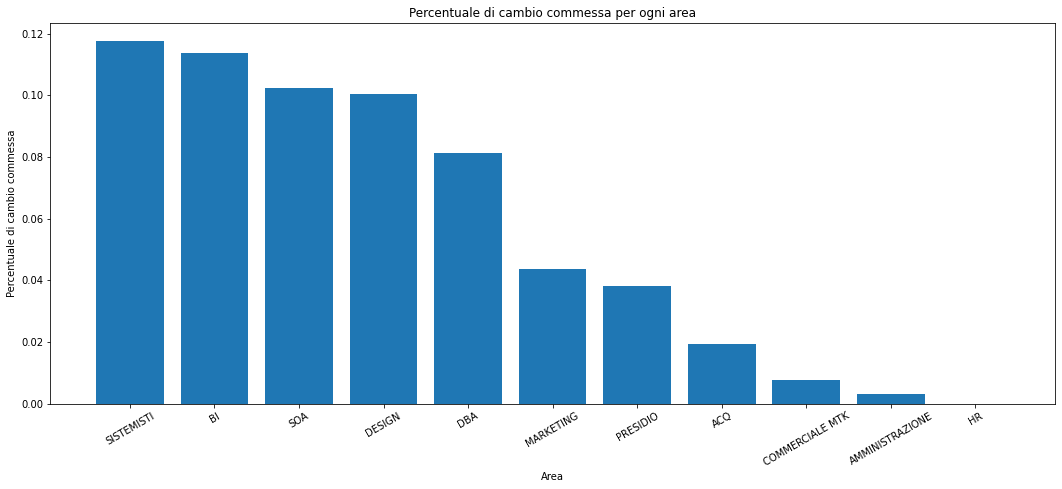

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(fraction_per_area)), [x[1] for x in fraction_per_area])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Area')
ax.set_title(f'Percentuale di cambio commessa per ogni area')
ax.set_xticks(np.arange(len(fraction_per_area)))
ax.set_xticklabels([x[0] for x in fraction_per_area], rotation=30)
plt.show()

#### number of job-id per area

In [ ]:
# resid_group = data4.groupby(['resid'])

commessa_area = {}

for name, group in resid_group:

    if name in mapping.index:
        # print(name)
        # print(group.jobid.unique())
        commessa_area[mapping[name]] = commessa_area.get(mapping[name], []) + list(group.jobid.unique())
    

In [ ]:
len(set([e for a in list(commessa_area.values()) for e in a]))

353

In [ ]:
for a in commessa_area:
    commessa_area[a] = len(set(commessa_area[a]))

In [ ]:
commessa_area

{'ACQ': 5,
 'AMMINISTRAZIONE': 1,
 'BI': 97,
 'COMMERCIALE MTK': 12,
 'DBA': 149,
 'DESIGN': 27,
 'HR': 1,
 'MARKETING': 12,
 'PRESIDIO': 29,
 'SISTEMISTI': 181,
 'SOA': 65}

In [ ]:
commessa_area = sorted(commessa_area.items(), key=itemgetter(1), reverse=True)
commessa_area

[('SISTEMISTI', 181),
 ('DBA', 149),
 ('BI', 97),
 ('SOA', 65),
 ('PRESIDIO', 29),
 ('DESIGN', 27),
 ('COMMERCIALE MTK', 12),
 ('MARKETING', 12),
 ('ACQ', 5),
 ('AMMINISTRAZIONE', 1),
 ('HR', 1)]

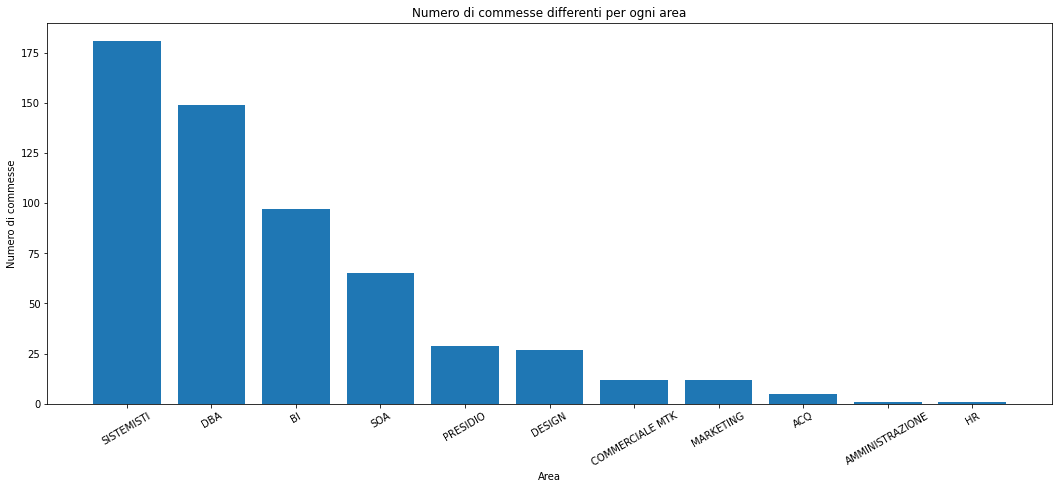

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(commessa_area)), [x[1] for x in commessa_area])
ax.set_ylabel('Numero di commesse')
ax.set_xlabel('Area')
ax.set_title(f'Numero di commesse differenti per ogni area')
ax.set_xticks(np.arange(len(commessa_area)))
ax.set_xticklabels([x[0] for x in commessa_area], rotation=30)
plt.show()

#### number of jobtaskid per area

In [ ]:
# resid_group = data4.groupby(['resid'])

attivita_area = {}

for name, group in resid_group:

    if name in mapping.index:
        # print(name)
        # print(group.jobid.unique())
        attivita_area[mapping[name]] = attivita_area.get(mapping[name], []) + list(group.jobtaskid.unique())
    

In [ ]:
len(set([e for a in list(attivita_area.values()) for e in a]))

652

In [ ]:
for a in attivita_area:
    attivita_area[a] = len(set(attivita_area[a]))

In [ ]:
attivita_area = sorted(attivita_area.items(), key=itemgetter(1), reverse=True)
attivita_area

[('SISTEMISTI', 299),
 ('DBA', 263),
 ('BI', 142),
 ('SOA', 129),
 ('DESIGN', 64),
 ('PRESIDIO', 44),
 ('MARKETING', 31),
 ('COMMERCIALE MTK', 17),
 ('ACQ', 9),
 ('AMMINISTRAZIONE', 2),
 ('HR', 2)]

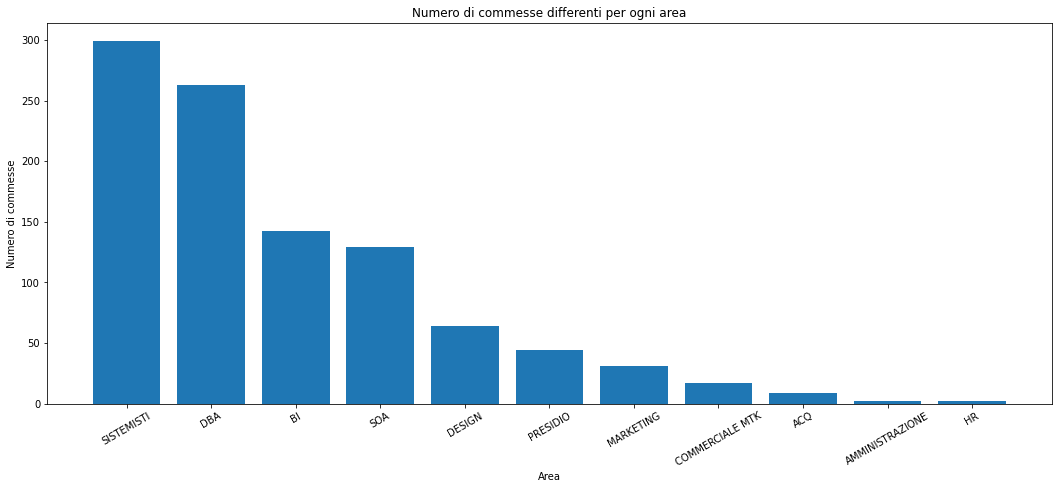

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(attivita_area)), [x[1] for x in attivita_area])
ax.set_ylabel('Numero di commesse')
ax.set_xlabel('Area')
ax.set_title(f'Numero di commesse differenti per ogni area')
ax.set_xticks(np.arange(len(attivita_area)))
ax.set_xticklabels([x[0] for x in attivita_area], rotation=30)
plt.show()

### data assunzione

In [368]:
resid_df1 = resid_df[resid_df['data assunzione'].notna()]
resid_df1

,resid,rescode,data assunzione,area
0,291,RIS-133,2016-10-17 00:00:00,ACQ
2,296,RIS-159,2017-11-13 00:00:00,ACQ
3,297,RIS-018,2007-07-17 00:00:00,BI
4,300,RIS-104,2015-02-13 00:00:00,BI
5,306,RIS-141,2020-06-01 00:00:00,BI
...,...,...,...,...
86,1471,RIS-0267,2021-02-01 00:00:00,ACQ
87,1472,RIS-0268,2021-02-01 00:00:00,ACQ
88,1475,RIS-0269,2021-02-15 00:00:00,SOA
89,1476,RIS-0270,2021-04-06 10:00:00,DBA


In [369]:
resid_df1['anno_mese'] = resid_df1['data assunzione'].apply(lambda x: x[:7])
resid_df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,resid,rescode,data assunzione,area,anno_mese
0,291,RIS-133,2016-10-17 00:00:00,ACQ,2016-10
2,296,RIS-159,2017-11-13 00:00:00,ACQ,2017-11
3,297,RIS-018,2007-07-17 00:00:00,BI,2007-07
4,300,RIS-104,2015-02-13 00:00:00,BI,2015-02
5,306,RIS-141,2020-06-01 00:00:00,BI,2020-06
...,...,...,...,...,...
86,1471,RIS-0267,2021-02-01 00:00:00,ACQ,2021-02
87,1472,RIS-0268,2021-02-01 00:00:00,ACQ,2021-02
88,1475,RIS-0269,2021-02-15 00:00:00,SOA,2021-02
89,1476,RIS-0270,2021-04-06 10:00:00,DBA,2021-04


In [370]:
resid_df1.anno_mese.unique()

array(['2016-10', '2017-11', '2007-07', '2015-02', '2020-06', '2012-09',
       '2017-12', '2007-03', '2010-02', '2015-01', '2017-02', '2017-09',
       '2021-01', '2008-02', '2011-12', '2015-04', '2018-03', '2015-11',
       '2016-05', '2017-05', '2011-03', '2017-08', '2018-01', '2018-02',
       '2018-04', '2020-09', '2018-07', '2018-05', '2018-06', '2018-08',
       '2018-09', '2018-10', '2019-01', '2019-02', '2019-04', '2019-05',
       '2019-06', '2019-09', '2019-10', '2019-12', '2020-01', '2020-03',
       '2020-10', '2020-05', '2020-08', '2020-07', '2020-12', '2021-02',
       '2021-04', '2021-06'], dtype=object)

In [371]:
resid_anno_mese = resid_df1.groupby(['anno_mese'])

datas = {}
for name, group in resid_anno_mese:
    datas[name] = list(group.resid)
    
for k,v in datas.items():
    print(f'{k:15} {v}')

2007-03         [319]
2007-07         [297]
2008-02         [335]
2010-02         [320]
2011-03         [348]
2011-12         [338]
2012-09         [308]
2015-01         [322]
2015-02         [300]
2015-04         [339]
2015-11         [342]
2016-05         [343]
2016-10         [291, 349]
2017-02         [327]
2017-05         [345]
2017-08         [354]
2017-09         [328]
2017-11         [296, 347]
2017-12         [313, 330, 331]
2018-01         [357, 358]
2018-02         [359]
2018-03         [340]
2018-04         [360]
2018-05         [369, 370, 372]
2018-06         [373]
2018-07         [367]
2018-08         [379, 382]
2018-09         [384]
2018-10         [1386]
2019-01         [1391]
2019-02         [1392, 1395]
2019-04         [1399]
2019-05         [1400, 1406]
2019-06         [1407, 1408]
2019-09         [1412]
2019-10         [1416]
2019-12         [1424]
2020-01         [1426, 1427, 1428, 1432]
2020-03         [1436, 1437]
2020-05         [1439, 1441, 1442, 1443, 1445]
20

In [372]:
for k,v in datas.items():
    print(f'{k:15} {len(v)}')

2007-03         1
2007-07         1
2008-02         1
2010-02         1
2011-03         1
2011-12         1
2012-09         1
2015-01         1
2015-02         1
2015-04         1
2015-11         1
2016-05         1
2016-10         2
2017-02         1
2017-05         1
2017-08         1
2017-09         1
2017-11         2
2017-12         3
2018-01         2
2018-02         1
2018-03         1
2018-04         1
2018-05         3
2018-06         1
2018-07         1
2018-08         2
2018-09         1
2018-10         1
2019-01         1
2019-02         2
2019-04         1
2019-05         2
2019-06         2
2019-09         1
2019-10         1
2019-12         1
2020-01         4
2020-03         2
2020-05         5
2020-06         3
2020-07         1
2020-08         2
2020-09         4
2020-10         7
2020-12         1
2021-01         5
2021-02         3
2021-04         1
2021-06         1


In [373]:
mapping1 = resid_df1.anno_mese
mapping1.index = resid_df1.resid
mapping1

resid
291     2016-10
296     2017-11
297     2007-07
300     2015-02
306     2020-06
         ...   
1471    2021-02
1472    2021-02
1475    2021-02
1476    2021-04
1477    2021-06
Name: anno_mese, Length: 87, dtype: object

In [375]:
resid_group = data6.groupby(['resid'])

cambio_data = {}
tot_data = {}
check_data = {}

for name, group in resid_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    # n_safe = server_group[server_group.TYPE == 0].shape[0]
    # result_area.get(mapping[name], []).append(n_cambio/group.shape[0]))
    
    # if name in [292, 379, 1408]:
    #     print(name)

    if name in mapping1.index:
        check_data[mapping1[name]] = check_data.get(mapping1[name], 0) + 1
        cambio_data[mapping1[name]] = cambio_data.get(mapping1[name], 0) + n_cambio
        tot_data[mapping1[name]] = tot_data.get(mapping1[name], 0) + group.shape[0]
    
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
# result

In [ ]:
for k,v in cambio_data.items():
    print(f'Data assunzione: {k:8} -> cambio_commessa: {v}')

Data assunzione: 2016-10  -> cambio_commessa: 82
Data assunzione: 2017-11  -> cambio_commessa: 2
Data assunzione: 2007-07  -> cambio_commessa: 6
Data assunzione: 2015-02  -> cambio_commessa: 43
Data assunzione: 2020-06  -> cambio_commessa: 0
Data assunzione: 2012-09  -> cambio_commessa: 0
Data assunzione: 2017-12  -> cambio_commessa: 46
Data assunzione: 2007-03  -> cambio_commessa: 57
Data assunzione: 2010-02  -> cambio_commessa: 27
Data assunzione: 2015-01  -> cambio_commessa: 33
Data assunzione: 2017-02  -> cambio_commessa: 28
Data assunzione: 2017-09  -> cambio_commessa: 27
Data assunzione: 2021-01  -> cambio_commessa: 106
Data assunzione: 2008-02  -> cambio_commessa: 27
Data assunzione: 2011-12  -> cambio_commessa: 26
Data assunzione: 2015-04  -> cambio_commessa: 110
Data assunzione: 2018-03  -> cambio_commessa: 22
Data assunzione: 2015-11  -> cambio_commessa: 26
Data assunzione: 2016-05  -> cambio_commessa: 38
Data assunzione: 2017-05  -> cambio_commessa: 22
Data assunzione: 2011-

In [ ]:
for k,v in tot_data.items():
    print(f'Data assunzione: {k:8} -> tot: {v}')

Data assunzione: 2016-10  -> tot: 713
Data assunzione: 2017-11  -> tot: 413
Data assunzione: 2007-07  -> tot: 95
Data assunzione: 2015-02  -> tot: 255
Data assunzione: 2020-06  -> tot: 269
Data assunzione: 2012-09  -> tot: 136
Data assunzione: 2017-12  -> tot: 458
Data assunzione: 2007-03  -> tot: 471
Data assunzione: 2010-02  -> tot: 703
Data assunzione: 2015-01  -> tot: 282
Data assunzione: 2017-02  -> tot: 261
Data assunzione: 2017-09  -> tot: 501
Data assunzione: 2021-01  -> tot: 1725
Data assunzione: 2008-02  -> tot: 343
Data assunzione: 2011-12  -> tot: 395
Data assunzione: 2015-04  -> tot: 668
Data assunzione: 2018-03  -> tot: 174
Data assunzione: 2015-11  -> tot: 182
Data assunzione: 2016-05  -> tot: 304
Data assunzione: 2017-05  -> tot: 216
Data assunzione: 2011-03  -> tot: 506
Data assunzione: 2017-08  -> tot: 284
Data assunzione: 2018-01  -> tot: 432
Data assunzione: 2018-02  -> tot: 173
Data assunzione: 2018-04  -> tot: 370
Data assunzione: 2020-09  -> tot: 757
Data assunzi

In [ ]:
fraction_per_data = {}

for data in cambio_data:
    fraction_per_data[data] = cambio_data[data]/tot_data[data]
fraction_per_data = sorted(fraction_per_data.items(), key=itemgetter(0), reverse=False)
fraction_per_data

[('2007-03', 0.12101910828025478),
 ('2007-07', 0.06315789473684211),
 ('2008-02', 0.07871720116618076),
 ('2010-02', 0.03840682788051209),
 ('2011-03', 0.11857707509881422),
 ('2011-12', 0.06582278481012659),
 ('2012-09', 0.0),
 ('2015-01', 0.11702127659574468),
 ('2015-02', 0.16862745098039217),
 ('2015-04', 0.16467065868263472),
 ('2015-11', 0.14285714285714285),
 ('2016-05', 0.125),
 ('2016-10', 0.1150070126227209),
 ('2017-02', 0.10727969348659004),
 ('2017-05', 0.10185185185185185),
 ('2017-08', 0.07746478873239436),
 ('2017-09', 0.05389221556886228),
 ('2017-11', 0.004842615012106538),
 ('2017-12', 0.10043668122270742),
 ('2018-01', 0.004629629629629629),
 ('2018-02', 0.0),
 ('2018-03', 0.12643678160919541),
 ('2018-04', 0.0972972972972973),
 ('2018-05', 0.0705765407554672),
 ('2018-06', 0.1111111111111111),
 ('2018-07', 0.13682092555331993),
 ('2018-08', 0.04087193460490463),
 ('2018-09', 0.0),
 ('2018-10', 0.06538461538461539),
 ('2019-01', 0.1497005988023952),
 ('2019-02', 0.

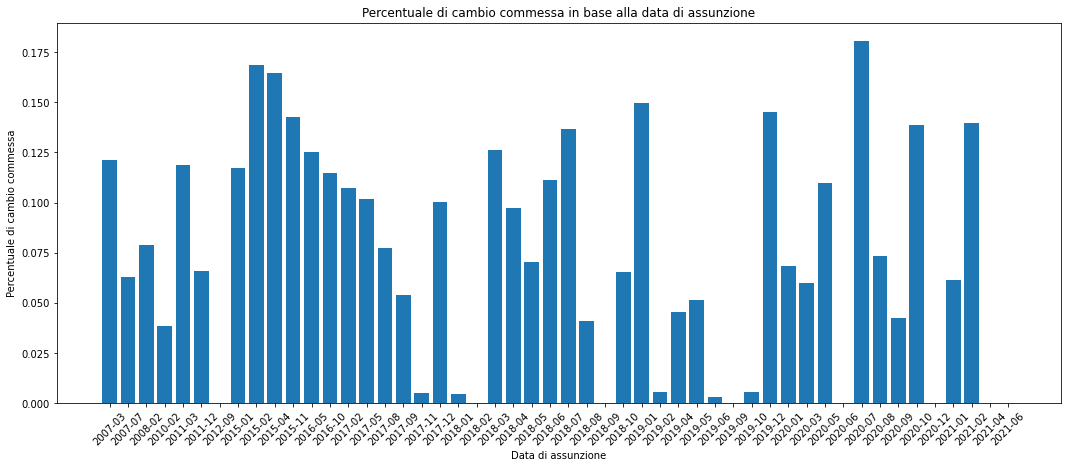

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(fraction_per_data)), [x[1] for x in fraction_per_data])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data di assunzione')
ax.set_title(f'Percentuale di cambio commessa in base alla data di assunzione')
ax.set_xticks(np.arange(len(fraction_per_data)))
ax.set_xticklabels([x[0] for x in fraction_per_data], rotation=45)
plt.show()

Non c'è un pattern particolare in base alla data di assunzione

## tipo_update ~ jobtaskdt

In [377]:
# data3 = pd.read_csv(datapath + 'dataset/data3.csv')
data3

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
23747,3136051,1430,2865,2020-10-01,False,Meet per nuovo nome autentica,2.0,22058,False,2020-10-01 16:07:50.418,False,4187,False,6.0,approvato,2020-10-04 11:52:50.106431
6701,3181031,308,2848,2021-02-16,False,.,8.0,22026,False,2021-02-23 17:29:02.768,False,59,False,6.0,approvato,2021-03-01 10:40:49.128881
10990,3170117,300,3170,2021-01-19,False,-Allineamento attività\n-Verifica attuale flus...,8.0,22658,False,2021-01-21 11:19:10.039,True,21154,False,6.0,approvato,2021-01-24 13:30:02.472003
17594,3155870,1434,2987,2020-11-23,False,"Flusso gare, lavorato sulla tabella dei contra...",8.0,22328,False,2020-11-27 13:06:28.789,True,4466,False,6.0,approvato,2020-11-30 09:17:15.563669
18208,3152605,320,3006,2020-11-19,False,sistemazione pianificazioni cv per nuovi ragazzi,2.5,22352,False,2020-11-19 16:57:32.474,False,59,False,1.0,approvato,2020-11-23 09:02:33.750632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,3165063,358,280,2020-12-24,False,Ticket 231080 + 231082 + ripristino cluster ku...,1.5,747,False,2020-12-24 12:55:39.191,True,10,True,6.0,approvato,2021-01-03 09:20:05.165814
7987,3174862,322,82,2021-02-01,False,Approvazioni rapportini,8.0,25,False,2021-02-01 16:58:37.708,False,4187,False,6.0,approvato,2021-02-12 10:04:34.77895
10595,3168533,1400,2897,2021-01-15,False,"tkt, sr, incident tkt, sr, incident",8.0,22397,False,2021-01-15 17:48:25.276,True,4466,False,6.0,cambio_commessa,2021-01-25 09:04:15.446624
6042,3179070,349,3006,2021-02-15,False,My.MI (ex customer report) progettazione compo...,3.5,22352,False,2021-02-15 17:54:14.069,False,4187,False,6.0,approvato,2021-03-02 09:10:34.80683


### month-level

In [378]:
data3['anno_mese'] = data3['jobtaskdt'].apply(lambda x: x[:7])
data3

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on,anno_mese
23747,3136051,1430,2865,2020-10-01,False,Meet per nuovo nome autentica,2.0,22058,False,2020-10-01 16:07:50.418,False,4187,False,6.0,approvato,2020-10-04 11:52:50.106431,2020-10
6701,3181031,308,2848,2021-02-16,False,.,8.0,22026,False,2021-02-23 17:29:02.768,False,59,False,6.0,approvato,2021-03-01 10:40:49.128881,2021-02
10990,3170117,300,3170,2021-01-19,False,-Allineamento attività\n-Verifica attuale flus...,8.0,22658,False,2021-01-21 11:19:10.039,True,21154,False,6.0,approvato,2021-01-24 13:30:02.472003,2021-01
17594,3155870,1434,2987,2020-11-23,False,"Flusso gare, lavorato sulla tabella dei contra...",8.0,22328,False,2020-11-27 13:06:28.789,True,4466,False,6.0,approvato,2020-11-30 09:17:15.563669,2020-11
18208,3152605,320,3006,2020-11-19,False,sistemazione pianificazioni cv per nuovi ragazzi,2.5,22352,False,2020-11-19 16:57:32.474,False,59,False,1.0,approvato,2020-11-23 09:02:33.750632,2020-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,3165063,358,280,2020-12-24,False,Ticket 231080 + 231082 + ripristino cluster ku...,1.5,747,False,2020-12-24 12:55:39.191,True,10,True,6.0,approvato,2021-01-03 09:20:05.165814,2020-12
7987,3174862,322,82,2021-02-01,False,Approvazioni rapportini,8.0,25,False,2021-02-01 16:58:37.708,False,4187,False,6.0,approvato,2021-02-12 10:04:34.77895,2021-02
10595,3168533,1400,2897,2021-01-15,False,"tkt, sr, incident tkt, sr, incident",8.0,22397,False,2021-01-15 17:48:25.276,True,4466,False,6.0,cambio_commessa,2021-01-25 09:04:15.446624,2021-01
6042,3179070,349,3006,2021-02-15,False,My.MI (ex customer report) progettazione compo...,3.5,22352,False,2021-02-15 17:54:14.069,False,4187,False,6.0,approvato,2021-03-02 09:10:34.80683,2021-02


In [379]:
data_group = data3.groupby(['anno_mese'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)
result

[('2019-08', 0.0),
 ('2020-06', 0.0),
 ('2020-07', 0.023255813953488372),
 ('2020-08', 0.4),
 ('2020-09', 0.06628689798032107),
 ('2020-10', 0.03820816864295125),
 ('2020-11', 0.05536831969186327),
 ('2020-12', 0.05194805194805195),
 ('2021-01', 0.06375442739079103),
 ('2021-02', 0.07725947521865889),
 ('2021-03', 0.06755555555555555),
 ('2021-04', 0.05555555555555555)]

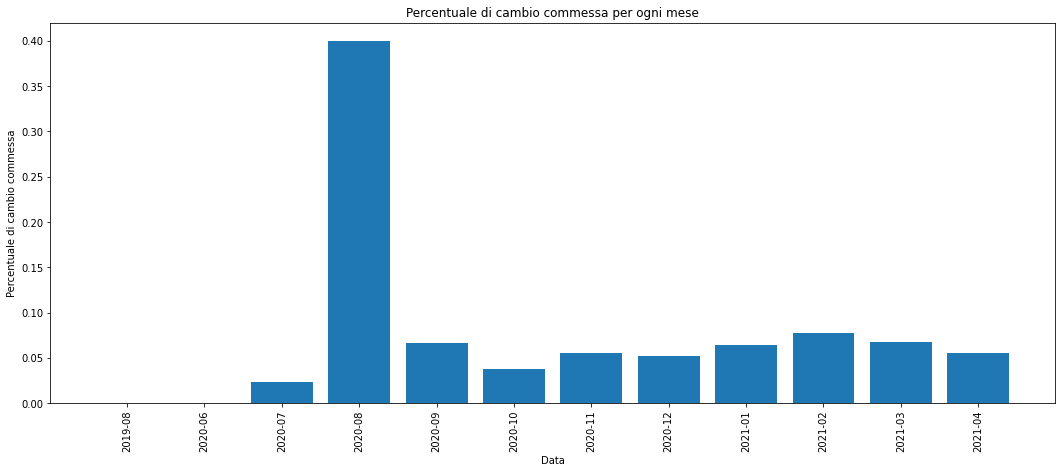

In [380]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni mese')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

### day-level

In [381]:
data_group = data3.groupby(['jobtaskdt'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)
result

[('2019-08-29', 0.0),
 ('2020-06-19', 0.0),
 ('2020-07-01', 0.0),
 ('2020-07-02', 0.0),
 ('2020-07-03', 0.0),
 ('2020-07-06', 0.0),
 ('2020-07-07', 0.0),
 ('2020-07-08', 0.0),
 ('2020-07-09', 0.0),
 ('2020-07-10', 0.5),
 ('2020-07-14', 0.0),
 ('2020-07-15', 0.0),
 ('2020-07-16', 0.0),
 ('2020-07-17', 0.0),
 ('2020-07-20', 0.0),
 ('2020-07-21', 0.0),
 ('2020-07-22', 0.0),
 ('2020-07-23', 0.0),
 ('2020-07-24', 0.0),
 ('2020-07-27', 0.0),
 ('2020-07-28', 0.0),
 ('2020-07-29', 0.0),
 ('2020-07-30', 0.0),
 ('2020-07-31', 0.0),
 ('2020-08-04', 0.5),
 ('2020-08-05', 0.0),
 ('2020-08-10', 0.0),
 ('2020-08-12', 0.0),
 ('2020-08-13', 0.5),
 ('2020-08-14', 0.5),
 ('2020-08-18', 0.0),
 ('2020-08-24', 1.0),
 ('2020-08-25', 1.0),
 ('2020-08-28', 0.0),
 ('2020-08-31', 0.0),
 ('2020-09-01', 0.07142857142857142),
 ('2020-09-02', 0.06578947368421052),
 ('2020-09-03', 0.05128205128205128),
 ('2020-09-04', 0.07954545454545454),
 ('2020-09-05', 0.0),
 ('2020-09-06', 0.0),
 ('2020-09-07', 0.05),
 ('2020-09-

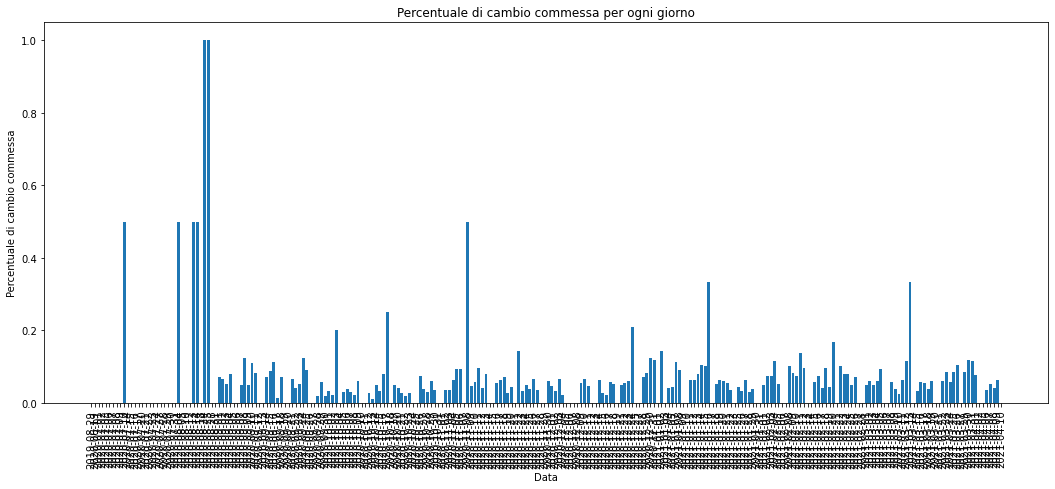

In [382]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni giorno')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

### evoluzione della percentuale di errore per alcune persone

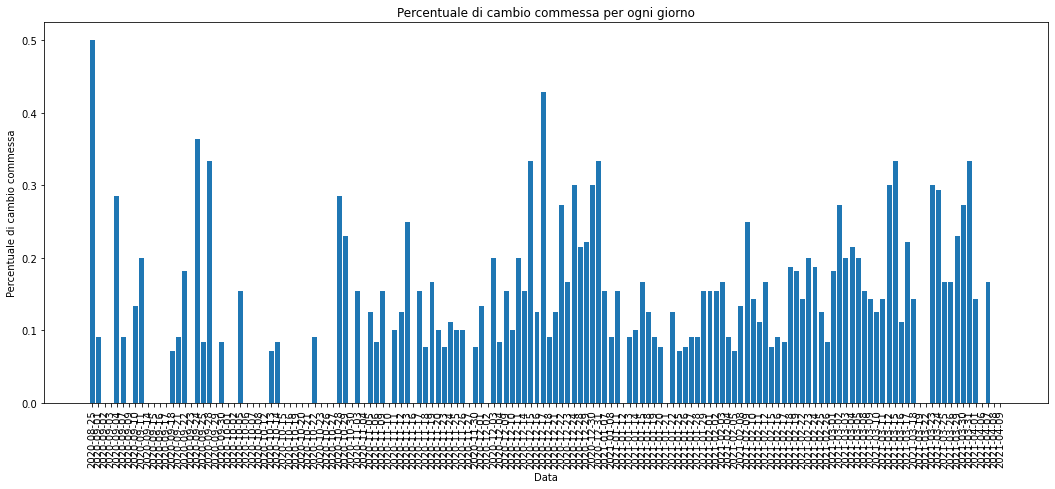

In [ ]:
data_group = data3[data3.resid==1445].groupby(['jobtaskdt'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)

fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni giorno')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

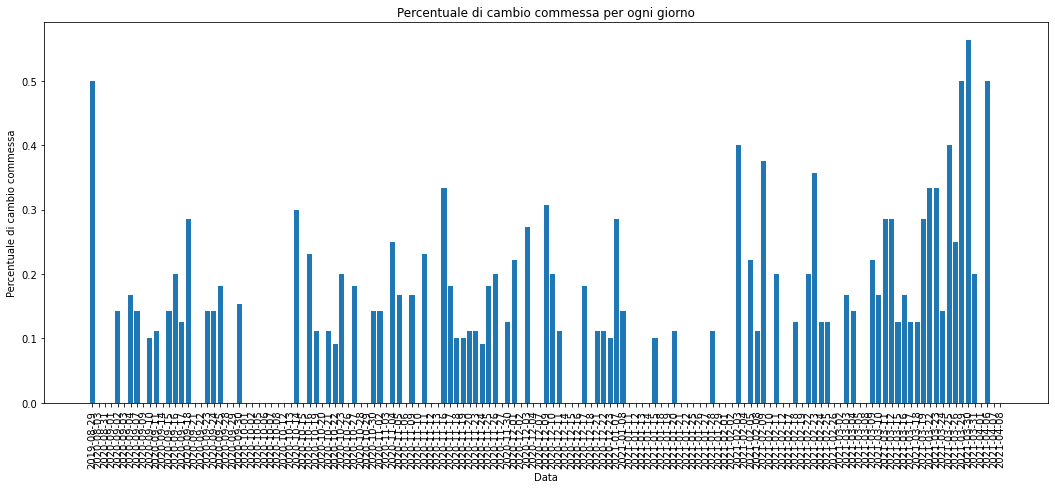

In [ ]:
data_group = data3[data3.resid==367].groupby(['jobtaskdt'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)

fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni giorno')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

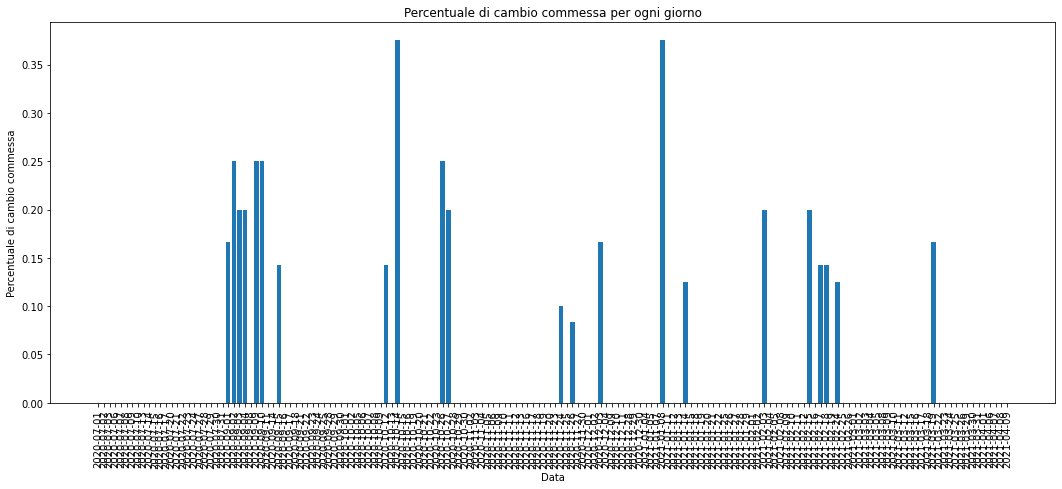

In [ ]:
data_group = data3[data3.resid==320].groupby(['jobtaskdt'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)

fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni giorno')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

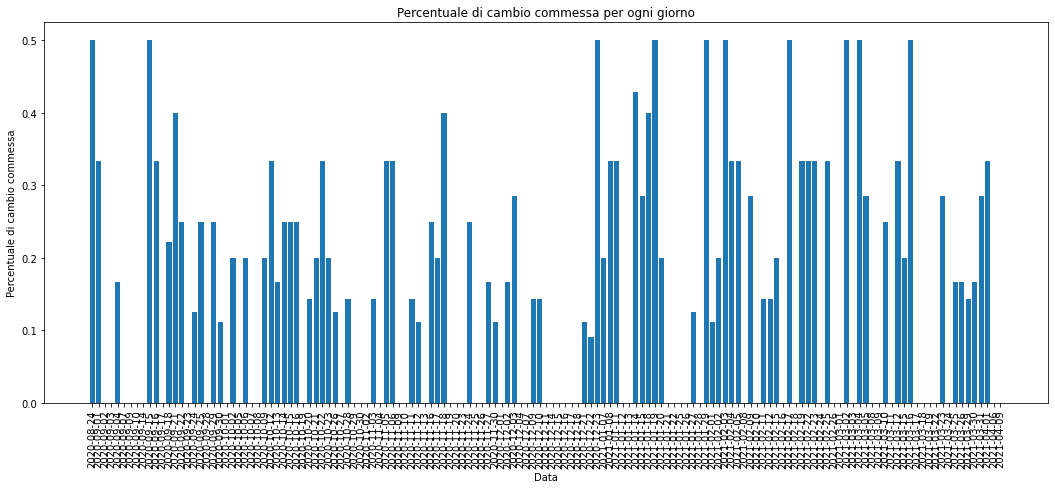

In [ ]:
data_group = data3[data3.resid==339].groupby(['jobtaskdt'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)

fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni giorno')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

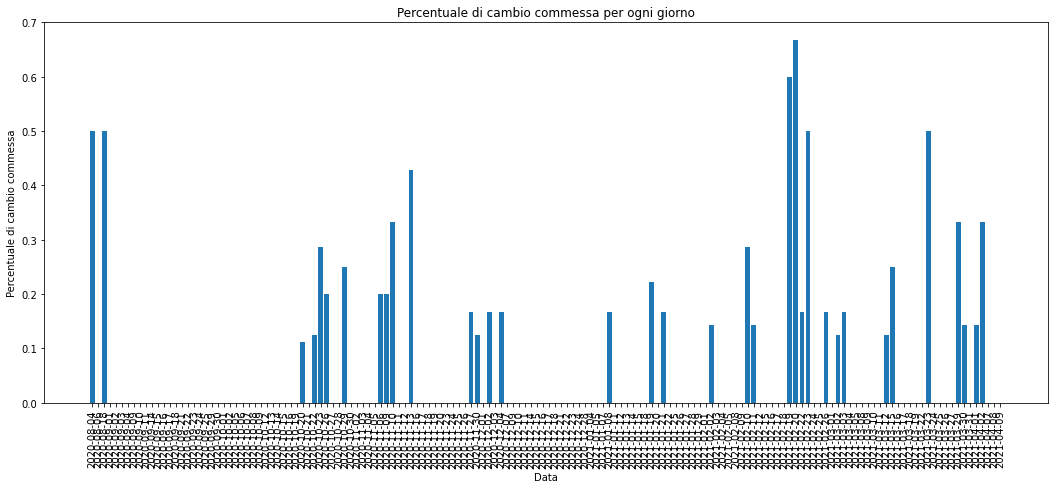

In [ ]:
data_group = data3[data3.resid==369].groupby(['jobtaskdt'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)

fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni giorno')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

# Text Analysis

In [387]:
datacopy = data.copy()

In [418]:
# data = pd.read_csv(datapath + 'dataset/data6.csv')
data[['jobid','jobtaskid', 'resid', 'custid', 'sede']] = data[['jobid','jobtaskid', 'resid', 'custid', 'sede']].astype(str)
data[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']] = data[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']].astype(int)
data = data.reset_index()
data

,index,workdesc,jobid,jobtaskid,resid,custid,qty,sede,jobtaskdt,data_ins,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,day,day1,delay
0,23747,Meet per nuovo nome autentica,2865,22058,1430,4187,2.0,6.0,2020-10-01,2020-10-01 16:07:50.418,0,0,0,0,approvato,92,92,0
1,6701,.,2848,22026,308,59,8.0,6.0,2021-02-16,2021-02-23 17:29:02.768,0,0,0,0,approvato,230,237,7
2,10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,21154,8.0,6.0,2021-01-19,2021-01-21 11:19:10.039,0,0,1,0,approvato,202,204,2
3,17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,4466,8.0,6.0,2020-11-23,2020-11-27 13:06:28.789,0,0,1,0,approvato,145,149,4
4,725,Monitoraggio AWS,3195,22698,372,4466,6.0,6.0,2021-03-11,2021-03-15 10:52:35.271,0,0,1,0,approvato,253,257,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,10,1.5,6.0,2020-12-24,2020-12-24 12:55:39.191,0,0,1,1,approvato,176,176,0
14857,7987,Approvazioni rapportini,82,25,322,4187,8.0,6.0,2021-02-01,2021-02-01 16:58:37.708,0,0,0,0,approvato,215,215,0
14858,10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,4466,8.0,6.0,2021-01-15,2021-01-15 17:48:25.276,0,0,1,0,cambio_commessa,198,198,0
14859,6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,4187,3.5,6.0,2021-02-15,2021-02-15 17:54:14.069,0,0,0,0,approvato,229,229,0


In [419]:
data.dtypes

index                  int64
workdesc              object
jobid                 object
jobtaskid             object
resid                 object
custid                object
qty                  float64
sede                  object
jobtaskdt             object
data_ins              object
flg_trasferta          int64
pay                    int64
flg_prepagato          int64
flg_straordinario      int64
tipo_update           object
day                    int64
day1                   int64
delay                  int64
dtype: object

## Analysis of the original text

Print the first 100 descriptions

In [420]:
for i in range(100):
    # print('--- ORIGINAL ---')
    print(data.workdesc[i])
    print()

Meet per nuovo nome autentica

.

-Allineamento attività
-Verifica attuale flusso Piano Produzione

Flusso gare, lavorato sulla tabella dei contratti e modificata toolbar per il nuovo routing. 

Monitoraggio AWS

sistemazione pianificazioni cv per  nuovi ragazzi

Test e controllo pagine

approfondimento questioni giuridiche relative alla privacy dei lavoratori

Tk Sr Incident
I01 - Gestione Incidenti
Gestione problem VSIX Padova

Affiancamento Infocert

CLICAL-603

sviluppo e3 - controlli flussi 

Gestione Ticket F5 e Ticket Moveit

Preparazione e riunione commerciale

BFT -Trasferimento proprietà operatore /Creazione di un nuovo dispositivo

verifiche blocco applicazioni web (mantis 0010986)

Studio e analisi di utilità di AWS Honeycode

Offerta Fdm sap on aws

Tk Sr Incident
Call per NAS con Infrastruttura

Workshop marketing (test workshop pacchetti aumenta la produttività)

Formazione Aws - Gruppo Zanotto - Lavoro per Strategia commerciale

formazione aws con tommaso panozzo

Stand

Compute some statistics about the length of the descriptions provided




In [421]:
def count_words(text):
    # text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    # noise_free_words = [word for word in words if word not in stop_words_punct] 
    # noise_free_words = [word for word in words if word not in stop_words and not word.isdigit()] 
    # noise_free_words = [word for word in words if word not in stop_words_punct and not word.isdigit()] 
    # noise_free_words = [stemmer.stem(w) for w in noise_free_words]
    # noise_free_text = " ".join(noise_free_words) 
    # return noise_free_words
    return len(words)

In [422]:
# data["cleaned_workdesc"] = 
original_words_v = data["workdesc"].apply(lambda s: count_words(s))
original_words_v.describe()

count    14861.000000
mean         8.197295
std          9.627006
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max        198.000000
Name: workdesc, dtype: float64

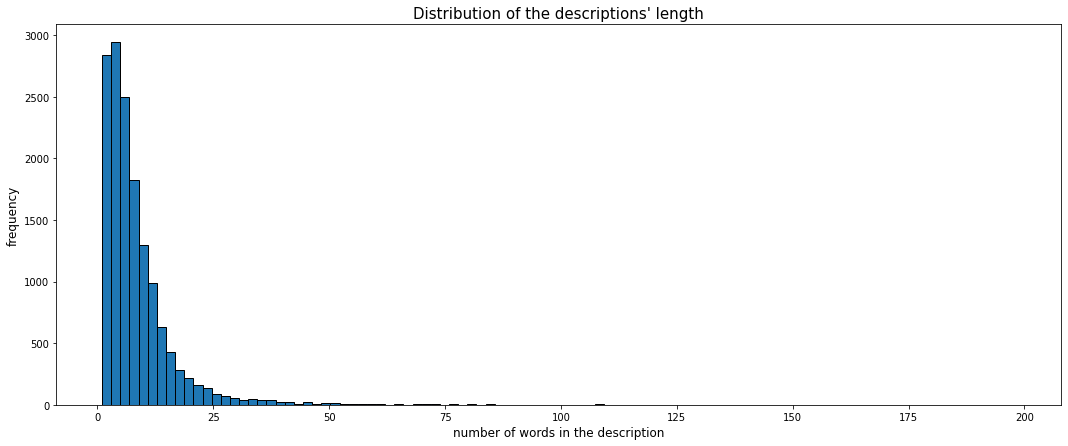

In [423]:
fig, ax = plt.subplots(figsize=(18,7))
_ = ax.hist(original_words_v, edgecolor = 'black', bins = 100)
_ = ax.set_title('Distribution of the descriptions\' length', size = 15)
ax.set_xlabel('number of words in the description', size= 12)
_ = ax.set_ylabel('frequency', size= 12)

Compute the total number of different words in the "dictionary"

In [424]:
words_original = set()
# original_words.update([1,2,1,3])
# words_original
# data["workdesc"]
for i in range(len(data["workdesc"])):
    words_original.update(data["workdesc"][i].lower().split())
print(words_original)
print(f'Total number of different words: {len(words_original)}')

{'foglio', 'disabilitazione', 'unlfr-57', 'adempimenti', '247859', 's01223333', 'sdcs-34830', 'automaticamente', 'sdi-1174', 'sic', 'valutare', 'mds', 'sdi-1989', 'colori', '"sal2000395"', 'qlik-democlienti', '(viatek)', 'upgrade,', 'acquisti@', 'contesti', 'saving', 'aliquota', 'possesso/dimenticato', 'scum', '#10263007', '22:35', 'secondi', 'cpi.castelfrancoveneto@venetolavoro.it', 'disponibilità', 'varianti.', 'beggiato', 'pg_hba.conf', 'servizi', 'mktg+sales+inside', 'gsuite+verifica', 'tac:', 'riesce', 'docker.', 'reset', 'ebit', 'fas', "po'", 'codlocazmovmagaz', 'volumes', 'tributo', 'righe', 'ceseracciu', '25/250', 'siu-b97', 'siu_gusi:', 'infra-11667', 'jolokia', 'preparazione', 'kafka', 'iam_gitlab', 'duplicati,', 'centralino', '28/12/2017', '#10258329', '75', '#10304107', 'valall-254', '228877', 'auls9', 'superiore', 'dedicate-', '260499', 'sns/sqs', '229805', 'trovo', 'point', 'core_api', 'tecnici)', 'stefania,', '(verifica', 'fdm_sa1', 'programmi', 'favaro', '(bft)', 'brans

So, the original text has more than 15k different terms. 

## Text cleaning

In [425]:
# Define the ilst of stopwords (both english and italian) and also punctuation marks
stop_words = get_stop_words('it')
stop_words_en = get_stop_words('en')
print(stop_words)
print(stop_words_en)
print(list(punctuation))

# creazione della lista finale 
stop_words = stop_words + ["’"] 
stop_words_punct = stop_words + list(punctuation) + ["’"] 
stop_words_punct_eng = stop_words + stop_words_en + list(punctuation) + ["’"] 

['a', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'ad', 'adesso', 'agl', 'agli', 'ai', 'al', 'all', 'alla', 'alle', 'allo', 'allora', 'altre', 'altri', 'altro', 'anche', 'ancora', 'avemmo', 'avendo', 'avere', 'avesse', 'avessero', 'avessi', 'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai', 'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò', 'avuta', 'avute', 'avuti', 'avuto', 'c', 'che', 'chi', 'ci', 'coi', 'col', 'come', 'con', 'contro', 'cui', 'da', 'dagl', 'dagli', 'dai', 'dal', 'dall', 'dalla', 'dalle', 'dallo', 'degl', 'degli', 'dei', 'del', 'dell', 'della', 'delle', 'dello', 'dentro', 'di', 'dov', 'dove', 'e', 'ebbe', 'ebbero', 'ebbi', 'ecco', 'ed', 'era', 'erano', 'eravamo', 'eravate', 'eri', 'ero', 'essendo', 'faccia', 'facciamo', 'facciano', 'facciate', 'faccio', 'facemmo', 'facendo', 'facesse', 'facessero', 'facessi', 'facessimo', 'faceste', 'facesti', 'facev

#### It stopwords

Compute the number of different words after removing punctuations and italian stopwords

In [426]:
def clean_text_it(text):
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    noise_free_words = [word for word in words if word not in stop_words and not word.isdigit()] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [427]:
words_v_it = data["workdesc"].apply(lambda s: clean_text_it(s))
words_v_it

0                                meet nuovo nome autentica
1                                                         
2        allineamento attività verifica attuale flusso ...
3        flusso gare lavorato tabella contratti modific...
4                                         monitoraggio aws
                               ...                        
14856                 ticket ripristino cluster kubernetes
14857                              approvazioni rapportini
14858                      tkt sr incident tkt sr incident
14859    my ex customer report progettazione componenti...
14860    jira iam troubleshooting problemi update otbea...
Name: workdesc, Length: 14861, dtype: object

In [428]:
words_it = set()
for i in range(len(words_v_it)):
    words_it.update(words_v_it[i].lower().split())
print(words_it)
print(f'Total number of different words: {len(words_it)}')

{'rates', 'foglio', 'disabilitazione', 'adempimenti', 's01223333', 'automaticamente', 'sic', 'valutare', 'rasera', 'mds', 'colori', 'commericiali', 'spingere', 'contesti', 'saving', 'aliquota', 'scum', 'rium', 'secondi', 'disponibilità', 'beggiato', 'db102siteacc', 'servizi', 'riesce', 'reset', 'win2008r2', 'ebit', 'fas', 'codlocazmovmagaz', 'volumes', 'tributo', 'righe', 'ceseracciu', 'alexandra', 'bolloauto', 'jolokia', 'preparazione', 'kafka', 'centralino', 'auls9', 'advisory', 'superiore', 'scorciatoia', '30pm', 'trovo', 'point', 'azs', 'programmi', 'favaro', 'bransix', 'unità', 'type', 'a22w', 'finita', 'federa', 'sales', 'politiche', 'namespace', 'saleforce', 'gestioni', 'xciii', 'rdp', 'mgt', 'federica', 'infomativo', 'alternativo', 'esigenze', 'visibile', '650w', 'man', 'istallazione', 'epic', 'copia', 'winrds', 'salesforcearticle', 'famila', 'dbora044', 'activities', 'risolvere', 'tabellare', 'pubblicare', 'applicativo', 'straord', 'audit', 'source', 'sencondary', 'comparazion

#### It stopwords + additional punct

Compute the number of different words after removing punctuation and italian stopwords and additional punctuation

In [429]:
def clean_text_itp(text):
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    noise_free_words = [word for word in words if word not in stop_words_punct and not word.isdigit()] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [430]:
words_v_itp = data["workdesc"].apply(lambda s: clean_text_itp(s))
words_v_itp

0                                meet nuovo nome autentica
1                                                         
2        allineamento attività verifica attuale flusso ...
3        flusso gare lavorato tabella contratti modific...
4                                         monitoraggio aws
                               ...                        
14856                 ticket ripristino cluster kubernetes
14857                              approvazioni rapportini
14858                      tkt sr incident tkt sr incident
14859    my ex customer report progettazione componenti...
14860    jira iam troubleshooting problemi update otbea...
Name: workdesc, Length: 14861, dtype: object

In [431]:
words_itp = set()
for i in range(len(words_v_itp)):
    words_itp.update(words_v_itp[i].lower().split())
print(words_itp)
print(f'Total number of different words: {len(words_itp)}')

{'rates', 'foglio', 'disabilitazione', 'adempimenti', 's01223333', 'automaticamente', 'sic', 'valutare', 'rasera', 'mds', 'colori', 'commericiali', 'spingere', 'contesti', 'saving', 'aliquota', 'scum', 'rium', 'secondi', 'disponibilità', 'beggiato', 'db102siteacc', 'servizi', 'riesce', 'reset', 'win2008r2', 'ebit', 'fas', 'codlocazmovmagaz', 'volumes', 'tributo', 'righe', 'ceseracciu', 'alexandra', 'bolloauto', 'jolokia', 'preparazione', 'kafka', 'centralino', 'auls9', 'advisory', 'superiore', 'scorciatoia', '30pm', 'trovo', 'point', 'azs', 'programmi', 'favaro', 'bransix', 'unità', 'type', 'a22w', 'finita', 'federa', 'sales', 'politiche', 'namespace', 'saleforce', 'gestioni', 'xciii', 'rdp', 'mgt', 'federica', 'infomativo', 'alternativo', 'esigenze', 'visibile', '650w', 'man', 'istallazione', 'epic', 'copia', 'winrds', 'salesforcearticle', 'famila', 'dbora044', 'activities', 'risolvere', 'tabellare', 'pubblicare', 'applicativo', 'straord', 'audit', 'source', 'sencondary', 'comparazion

#### It + eng stopwords

Compute the number of different words after removing punctuations and both italian and english stopwords

In [432]:
def clean_text_iteng(text):
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    noise_free_words = [word for word in words if word not in stop_words_punct_eng and not word.isdigit()] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [433]:
words_v_iteng = data["workdesc"].apply(lambda s: clean_text_iteng(s))
words_v_iteng

0                                meet nuovo nome autentica
1                                                         
2        allineamento attività verifica attuale flusso ...
3        flusso gare lavorato tabella contratti modific...
4                                         monitoraggio aws
                               ...                        
14856                 ticket ripristino cluster kubernetes
14857                              approvazioni rapportini
14858                      tkt sr incident tkt sr incident
14859    ex customer report progettazione componenti x ...
14860    jira iam troubleshooting problemi update otbea...
Name: workdesc, Length: 14861, dtype: object

In [434]:
words_iteng = set()
for i in range(len(words_v_iteng)):
    words_iteng.update(words_v_iteng[i].lower().split())
print(words_iteng)
print(f'Total number of different words: {len(words_iteng)}')

{'rates', 'foglio', 'disabilitazione', 'adempimenti', 's01223333', 'automaticamente', 'sic', 'valutare', 'rasera', 'mds', 'colori', 'commericiali', 'spingere', 'contesti', 'saving', 'aliquota', 'scum', 'rium', 'secondi', 'disponibilità', 'beggiato', 'db102siteacc', 'servizi', 'riesce', 'reset', 'win2008r2', 'ebit', 'fas', 'codlocazmovmagaz', 'volumes', 'tributo', 'righe', 'ceseracciu', 'alexandra', 'bolloauto', 'jolokia', 'preparazione', 'kafka', 'centralino', 'auls9', 'advisory', 'superiore', 'scorciatoia', '30pm', 'trovo', 'point', 'azs', 'programmi', 'favaro', 'bransix', 'unità', 'type', 'a22w', 'finita', 'federa', 'sales', 'politiche', 'namespace', 'saleforce', 'gestioni', 'xciii', 'rdp', 'mgt', 'federica', 'infomativo', 'alternativo', 'esigenze', 'visibile', '650w', 'man', 'istallazione', 'epic', 'copia', 'winrds', 'salesforcearticle', 'famila', 'dbora044', 'activities', 'risolvere', 'tabellare', 'pubblicare', 'applicativo', 'straord', 'audit', 'source', 'sencondary', 'comparazion

#### It + eng stopwords + urls

Compute the number of different words after removing punctuations and both italian and english stopwords

In [435]:
def clean_text_iteng_url(text):
    text = re.sub("(\w+:\/\/\S+)", " ", text)
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    noise_free_words = [word for word in words if word not in stop_words_punct_eng and not word.isdigit()] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [436]:
words_v_iteng_url = data["workdesc"].apply(lambda s: clean_text_iteng_url(s))
# words_v_iteng_url
for i in range(1000):
    print('--- ORIGINAL ---')
    print(data.workdesc[i])
    print('--- CLEANED ---')
    print(words_v_iteng_url[i])
    print()

Output streaming troncato alle ultime 5000 righe.
--- ORIGINAL ---
Autentica per Easy Frontier
--- CLEANED ---
autentica easy frontier

--- ORIGINAL ---
UI console monitoraggio licenze
--- CLEANED ---
ui console monitoraggio licenze

--- ORIGINAL ---
Ticket
--- CLEANED ---
ticket

--- ORIGINAL ---
Creazione trigger per inserimento dati di rapportini in cui viene updatata commessa, task e approvazione
Inizio elaborazione funzione per identificare errori nell'inserimento dei rapportini
--- CLEANED ---
creazione trigger inserimento dati rapportini viene updatata commessa task approvazione inizio elaborazione funzione identificare errori inserimento rapportini

--- ORIGINAL ---
Creazione contenuti sito
--- CLEANED ---
creazione contenuti sito

--- ORIGINAL ---
Cerimonie per chiusura sprint 5 e planning sprint 6
--- CLEANED ---
cerimonie chiusura sprint planning sprint

--- ORIGINAL ---
BOT-761
--- CLEANED ---
bot

--- ORIGINAL ---
riunione con m per reti sociali e smact - riunione con hr
-

In [437]:
words_iteng_url = set()
for i in range(len(words_v_iteng_url)):
    words_iteng_url.update(words_v_iteng_url[i].lower().split())
print(words_iteng_url)
print(f'Total number of different words: {len(words_iteng_url)}')

{'rates', 'foglio', 'disabilitazione', 'adempimenti', 's01223333', 'automaticamente', 'sic', 'valutare', 'rasera', 'mds', 'colori', 'commericiali', 'spingere', 'contesti', 'saving', 'aliquota', 'scum', 'rium', 'secondi', 'disponibilità', 'beggiato', 'db102siteacc', 'servizi', 'riesce', 'reset', 'win2008r2', 'ebit', 'fas', 'codlocazmovmagaz', 'volumes', 'tributo', 'righe', 'ceseracciu', 'alexandra', 'bolloauto', 'jolokia', 'preparazione', 'kafka', 'centralino', 'auls9', 'superiore', 'scorciatoia', '30pm', 'trovo', 'point', 'azs', 'programmi', 'favaro', 'bransix', 'unità', 'type', 'a22w', 'finita', 'federa', 'sales', 'politiche', 'namespace', 'saleforce', 'gestioni', 'xciii', 'rdp', 'mgt', 'federica', 'infomativo', 'alternativo', 'esigenze', 'visibile', '650w', 'man', 'istallazione', 'epic', 'copia', 'winrds', 'famila', 'dbora044', 'activities', 'risolvere', 'tabellare', 'pubblicare', 'applicativo', 'straord', 'audit', 'source', 'sencondary', 'comparazione', 'sal', 'tiozzo', 'annachiara'

#### It + eng stopwords + urls + mail

Compute the number of different words after removing punctuations and both italian and english stopwords

In [438]:
def clean_text_iteng_url_mail(text):
    text = re.sub("(\w+:\/\/\S+)", " ", text)
    text = re.sub("(\S*@\S*\s)", " ", text)
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    noise_free_words = [word for word in words if word not in stop_words_punct_eng and not word.isdigit()] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [439]:
words_v_iteng_url_mail = data["workdesc"].apply(lambda s: clean_text_iteng_url_mail(s))
# words_v_iteng_url
for i in range(1000):
    print('--- ORIGINAL ---')
    print(data.workdesc[i])
    print('--- CLEANED ---')
    print(words_v_iteng_url_mail[i])
    print()

Output streaming troncato alle ultime 5000 righe.
--- ORIGINAL ---
Autentica per Easy Frontier
--- CLEANED ---
autentica easy frontier

--- ORIGINAL ---
UI console monitoraggio licenze
--- CLEANED ---
ui console monitoraggio licenze

--- ORIGINAL ---
Ticket
--- CLEANED ---
ticket

--- ORIGINAL ---
Creazione trigger per inserimento dati di rapportini in cui viene updatata commessa, task e approvazione
Inizio elaborazione funzione per identificare errori nell'inserimento dei rapportini
--- CLEANED ---
creazione trigger inserimento dati rapportini viene updatata commessa task approvazione inizio elaborazione funzione identificare errori inserimento rapportini

--- ORIGINAL ---
Creazione contenuti sito
--- CLEANED ---
creazione contenuti sito

--- ORIGINAL ---
Cerimonie per chiusura sprint 5 e planning sprint 6
--- CLEANED ---
cerimonie chiusura sprint planning sprint

--- ORIGINAL ---
BOT-761
--- CLEANED ---
bot

--- ORIGINAL ---
riunione con m per reti sociali e smact - riunione con hr
-

In [440]:
words_iteng_url_mail = set()
for i in range(len(words_v_iteng_url_mail)):
    words_iteng_url_mail.update(words_v_iteng_url_mail[i].lower().split())
print(words_iteng_url_mail)
print(f'Total number of different words: {len(words_iteng_url_mail)}')

{'rates', 'foglio', 'disabilitazione', 'adempimenti', 's01223333', 'automaticamente', 'sic', 'valutare', 'mds', 'colori', 'commericiali', 'spingere', 'contesti', 'saving', 'aliquota', 'scum', 'rium', 'secondi', 'disponibilità', 'beggiato', 'db102siteacc', 'servizi', 'riesce', 'reset', 'win2008r2', 'ebit', 'fas', 'codlocazmovmagaz', 'volumes', 'tributo', 'righe', 'ceseracciu', 'jolokia', 'preparazione', 'kafka', 'centralino', 'auls9', 'superiore', 'scorciatoia', '30pm', 'trovo', 'point', 'azs', 'programmi', 'favaro', 'bransix', 'unità', 'type', 'a22w', 'finita', 'federa', 'sales', 'saleforce', 'namespace', 'gestioni', 'xciii', 'rdp', 'mgt', 'federica', 'infomativo', 'alternativo', 'esigenze', 'visibile', '650w', 'man', 'istallazione', 'epic', 'copia', 'winrds', 'famila', 'dbora044', 'activities', 'risolvere', 'tabellare', 'pubblicare', 'applicativo', 'straord', 'audit', 'source', 'sencondary', 'comparazione', 'sal', 'tiozzo', 'annachiara', 'clustering', 'specifico', 'calerio', 'wso2', '

##### Class distintion

In [441]:
desc_app = words_v_iteng_url_mail[data.tipo_update == 'approvato']
app = []
for d in desc_app:
    app = app + d.split()
# [d.split() for d in desc_app]
app[:10]

['meet',
 'nuovo',
 'nome',
 'autentica',
 'allineamento',
 'attività',
 'verifica',
 'attuale',
 'flusso',
 'piano']

In [442]:
desc_cambio = words_v_iteng_url_mail[data.tipo_update == 'cambio_commessa']
cambio = []
for d in desc_cambio:
    cambio = cambio + d.split()
# [d.split() for d in desc_app]
cambio[:10]

['approfondimento',
 'questioni',
 'giuridiche',
 'relative',
 'privacy',
 'lavoratori',
 'codice',
 'terraform',
 'target',
 'group']

In [443]:
stems_app = set(app)
len(stems_app)

8276

In [444]:
stems_cambio = set(cambio)
len(stems_cambio)

2124

In [445]:
count_word_app = Counter(app)
count_word_cambio = Counter(cambio)

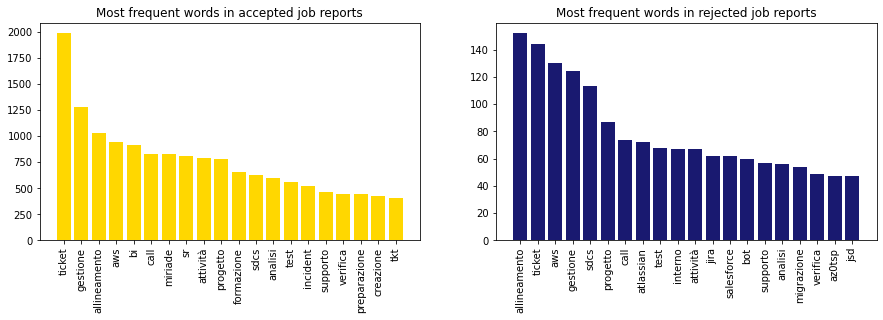

In [456]:
N = 20

plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.title("Most frequent words in accepted job reports".format(N))
plt.bar(*zip(*count_word_app.most_common(N)), color="gold")
plt.xticks(rotation="vertical")

plt.subplot(122)
plt.title("Most frequent words in rejected job reports".format(N))
plt.bar(*zip(*count_word_cambio.most_common(N)), color="midnightblue")
plt.xticks(rotation="vertical")

plt.show()

##### Wordcloud

In [452]:
MAX_WORDS = 100
MAX_FONT_SIZE = 200
RELATIVE_SCALING = 1

plt.show()

wc_pos = WordCloud(
    # mask=MASK,
    max_words=MAX_WORDS, 
    background_color="darkblue",
    max_font_size=MAX_FONT_SIZE,
    relative_scaling=RELATIVE_SCALING,
    colormap="PuRd"
).generate_from_frequencies(count_word_app)

wc_neg = WordCloud(
    # mask=MASK[:, ::-1, :],
    max_words=MAX_WORDS,
    background_color="black",
    max_font_size=MAX_FONT_SIZE,
    relative_scaling=RELATIVE_SCALING,
    colormap="Wistia"
).generate_from_frequencies(count_word_cambio)
MAX_WORDS = 50
MAX_FONT_SIZE = 200
RELATIVE_SCALING = 1


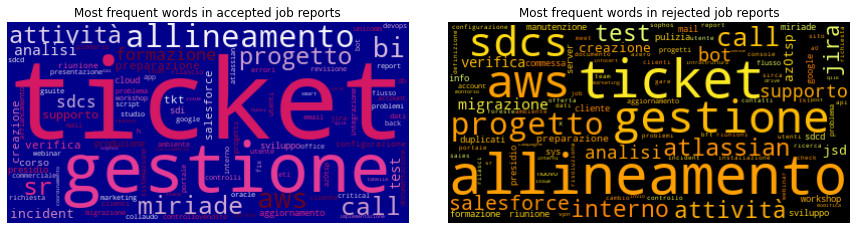

In [457]:
plt.figure(figsize=(12, 8))

plt.subplot(121)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title("Most frequent words in accepted job reports")
plt.axis("off")

plt.subplot(122)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title("Most frequent words in rejected job reports")
plt.axis("off")

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

Some terms are very frequent for both classes, and this was predictable since allo refused rapportini have also a version accepted with the same text, but a different job_id.

### Stemming

In [458]:
stemmer = SnowballStemmer("italian")

def clean_text(text):
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    # noise_free_words = [word for word in words if word not in stop_words_punct] 
    # noise_free_words = [word for word in words if word not in stop_words and not word.isdigit()] 
    noise_free_words = [word for word in words if word not in stop_words_punct_eng and not word.isdigit()] 
    noise_free_words = [stemmer.stem(w) for w in noise_free_words]
    noise_free_text = " ".join(noise_free_words) 
    # return noise_free_words
    return noise_free_text

In [459]:
data["cleaned_workdesc"] = data["workdesc"].apply(lambda s: clean_text(s))
data

,index,workdesc,jobid,jobtaskid,resid,custid,qty,sede,jobtaskdt,data_ins,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,day,day1,delay,cleaned_workdesc
0,23747,Meet per nuovo nome autentica,2865,22058,1430,4187,2.0,6.0,2020-10-01,2020-10-01 16:07:50.418,0,0,0,0,approvato,92,92,0,meet nuov nom autent
1,6701,.,2848,22026,308,59,8.0,6.0,2021-02-16,2021-02-23 17:29:02.768,0,0,0,0,approvato,230,237,7,
2,10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,21154,8.0,6.0,2021-01-19,2021-01-21 11:19:10.039,0,0,1,0,approvato,202,204,2,allin attiv verif attual fluss pian produzion
3,17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,4466,8.0,6.0,2020-11-23,2020-11-27 13:06:28.789,0,0,1,0,approvato,145,149,4,fluss gar lavor tabell contratt modific toolb ...
4,725,Monitoraggio AWS,3195,22698,372,4466,6.0,6.0,2021-03-11,2021-03-15 10:52:35.271,0,0,1,0,approvato,253,257,4,monitoragg aws
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,10,1.5,6.0,2020-12-24,2020-12-24 12:55:39.191,0,0,1,1,approvato,176,176,0,ticket ripristin cluster kubernetes
14857,7987,Approvazioni rapportini,82,25,322,4187,8.0,6.0,2021-02-01,2021-02-01 16:58:37.708,0,0,0,0,approvato,215,215,0,approv rapportin
14858,10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,4466,8.0,6.0,2021-01-15,2021-01-15 17:48:25.276,0,0,1,0,cambio_commessa,198,198,0,tkt sr incident tkt sr incident
14859,6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,4187,3.5,6.0,2021-02-15,2021-02-15 17:54:14.069,0,0,0,0,approvato,229,229,0,ex customer report progett component x upselli...


In [460]:
for i in range(1000):
    print('--- ORIGINAL ---')
    print(data.workdesc[i])
    print('--- CLEANED ---')
    print(data.cleaned_workdesc[i])
    print()

Output streaming troncato alle ultime 5000 righe.
--- ORIGINAL ---
Autentica per Easy Frontier
--- CLEANED ---
autent easy frontier

--- ORIGINAL ---
UI console monitoraggio licenze
--- CLEANED ---
ui consol monitoragg licenz

--- ORIGINAL ---
Ticket
--- CLEANED ---
ticket

--- ORIGINAL ---
Creazione trigger per inserimento dati di rapportini in cui viene updatata commessa, task e approvazione
Inizio elaborazione funzione per identificare errori nell'inserimento dei rapportini
--- CLEANED ---
creazion trigger inser dat rapportin vien updat commess task approv iniz elabor funzion identific error inser rapportin

--- ORIGINAL ---
Creazione contenuti sito
--- CLEANED ---
creazion conten sit

--- ORIGINAL ---
Cerimonie per chiusura sprint 5 e planning sprint 6
--- CLEANED ---
cerimon chiusur sprint planning sprint

--- ORIGINAL ---
BOT-761
--- CLEANED ---
bot

--- ORIGINAL ---
riunione con m per reti sociali e smact - riunione con hr
--- CLEANED ---
riunion m ret social smact riunion hr

-

Let's compute some statistics after cleaning the text

In [461]:
stems_v = data["cleaned_workdesc"].apply(lambda s: count_words(s))
stems_v.describe()

count    14861.000000
mean         6.377700
std          7.204319
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max        152.000000
Name: cleaned_workdesc, dtype: float64

In [462]:
stems = set()
for i in range(len(data["cleaned_workdesc"])):
    stems.update(data["cleaned_workdesc"][i].lower().split())
print(stems)
print(f'Total number of different words: {len(stems)}')

{'opportun', 'rates', 's01223333', 'sic', 'mds', 'consol', 'nub', 'saving', 'appalt', 'scum', 'rium', 'ospit', 'glor', 'nicol', 'db102siteacc', 'reset', 'win2008r2', 'fas', 'ebit', 'codlocazmovmagaz', 'volumes', 'ceseracciu', 'auls9', 'gioi', 'advisory', 'suddivision', 'sug', '30pm', 'point', 'sebin', 'azs', 'nan', 'bransix', 'mainett', 'type', 'a22w', 'invi', 'sales', 'rdp', 'd1ilq1h\\utent', 'mgt', 'stesuer', 'ricr', 'vicentin', '650w', 'man', 'fluid', 'epic', 'gestioneres', 'winrds', 'sirc', 'dbora044', 'attint', 'activities', 'compost', 'momentan', 'luc', 'fatturaiozn', 'pal', 'straord', 'audit', 'previst', 'sencondary', 'sal', 'clustering', 'segu', 'sopravvivt', 'wso2', 'redd', 'user', 'pul', 'disaster', 'ademp', 'fix', 'estat', 'itpd1olvtdbo007', 'alli', 'chiest', 'o3h', 'dres', 'lat', 'triggered', 'gpr79h2', 'onvenetox', 'fotocop', 'streaming', 'zanott', 'partenz', 'champions', 'jws5', 'steem', 'llicenz', 'startup', 'inzi', 'eks', 'uffic', 'clisys', 'r5a', 'ampli', 'bitbucket', 

### Stemming - url - mail

In [463]:
stemmer = SnowballStemmer("italian")

def clean_text(text):
    text = re.sub("(\w+:\/\/\S+)", " ", text)
    text = re.sub("(\S*@\S*\s)", " ", text)
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    # noise_free_words = [word for word in words if word not in stop_words_punct] 
    # noise_free_words = [word for word in words if word not in stop_words and not word.isdigit()] 
    noise_free_words = [word for word in words if word not in stop_words_punct_eng and not word.isdigit()] 
    noise_free_words = [stemmer.stem(w) for w in noise_free_words]
    noise_free_text = " ".join(noise_free_words) 
    # return noise_free_words
    return noise_free_text

In [464]:
data["cleaned_workdesc"] = data["workdesc"].apply(lambda s: clean_text(s))
data

,index,workdesc,jobid,jobtaskid,resid,custid,qty,sede,jobtaskdt,data_ins,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,day,day1,delay,cleaned_workdesc
0,23747,Meet per nuovo nome autentica,2865,22058,1430,4187,2.0,6.0,2020-10-01,2020-10-01 16:07:50.418,0,0,0,0,approvato,92,92,0,meet nuov nom autent
1,6701,.,2848,22026,308,59,8.0,6.0,2021-02-16,2021-02-23 17:29:02.768,0,0,0,0,approvato,230,237,7,
2,10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,21154,8.0,6.0,2021-01-19,2021-01-21 11:19:10.039,0,0,1,0,approvato,202,204,2,allin attiv verif attual fluss pian produzion
3,17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,4466,8.0,6.0,2020-11-23,2020-11-27 13:06:28.789,0,0,1,0,approvato,145,149,4,fluss gar lavor tabell contratt modific toolb ...
4,725,Monitoraggio AWS,3195,22698,372,4466,6.0,6.0,2021-03-11,2021-03-15 10:52:35.271,0,0,1,0,approvato,253,257,4,monitoragg aws
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,10,1.5,6.0,2020-12-24,2020-12-24 12:55:39.191,0,0,1,1,approvato,176,176,0,ticket ripristin cluster kubernetes
14857,7987,Approvazioni rapportini,82,25,322,4187,8.0,6.0,2021-02-01,2021-02-01 16:58:37.708,0,0,0,0,approvato,215,215,0,approv rapportin
14858,10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,4466,8.0,6.0,2021-01-15,2021-01-15 17:48:25.276,0,0,1,0,cambio_commessa,198,198,0,tkt sr incident tkt sr incident
14859,6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,4187,3.5,6.0,2021-02-15,2021-02-15 17:54:14.069,0,0,0,0,approvato,229,229,0,ex customer report progett component x upselli...


In [465]:
for i in range(1000):
    print('--- ORIGINAL ---')
    print(data.workdesc[i])
    print('--- CLEANED ---')
    print(data.cleaned_workdesc[i])
    print()

Output streaming troncato alle ultime 5000 righe.
--- ORIGINAL ---
Autentica per Easy Frontier
--- CLEANED ---
autent easy frontier

--- ORIGINAL ---
UI console monitoraggio licenze
--- CLEANED ---
ui consol monitoragg licenz

--- ORIGINAL ---
Ticket
--- CLEANED ---
ticket

--- ORIGINAL ---
Creazione trigger per inserimento dati di rapportini in cui viene updatata commessa, task e approvazione
Inizio elaborazione funzione per identificare errori nell'inserimento dei rapportini
--- CLEANED ---
creazion trigger inser dat rapportin vien updat commess task approv iniz elabor funzion identific error inser rapportin

--- ORIGINAL ---
Creazione contenuti sito
--- CLEANED ---
creazion conten sit

--- ORIGINAL ---
Cerimonie per chiusura sprint 5 e planning sprint 6
--- CLEANED ---
cerimon chiusur sprint planning sprint

--- ORIGINAL ---
BOT-761
--- CLEANED ---
bot

--- ORIGINAL ---
riunione con m per reti sociali e smact - riunione con hr
--- CLEANED ---
riunion m ret social smact riunion hr

-

Let's compute some statistics after cleaning the text

In [466]:
stems_v = data["cleaned_workdesc"].apply(lambda s: count_words(s))
stems_v.describe()

count    14861.000000
mean         6.278447
std          7.046222
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max        152.000000
Name: cleaned_workdesc, dtype: float64

In [467]:
stems = set()
for i in range(len(data["cleaned_workdesc"])):
    stems.update(data["cleaned_workdesc"][i].lower().split())
print(stems)
print(f'Total number of different words: {len(stems)}')

{'opportun', 'rates', 's01223333', 'sic', 'mds', 'consol', 'nub', 'saving', 'appalt', 'scum', 'rium', 'ospit', 'glor', 'nicol', 'db102siteacc', 'reset', 'win2008r2', 'fas', 'ebit', 'codlocazmovmagaz', 'volumes', 'ceseracciu', 'auls9', 'gioi', 'suddivision', 'sug', '30pm', 'point', 'sebin', 'azs', 'nan', 'bransix', 'mainett', 'type', 'a22w', 'invi', 'sales', 'rdp', 'd1ilq1h\\utent', 'mgt', 'stesuer', 'ricr', 'vicentin', '650w', 'man', 'fluid', 'epic', 'gestioneres', 'winrds', 'sirc', 'dbora044', 'attint', 'activities', 'compost', 'momentan', 'luc', 'fatturaiozn', 'pal', 'straord', 'audit', 'previst', 'sencondary', 'sal', 'clustering', 'segu', 'sopravvivt', 'wso2', 'redd', 'user', 'pul', 'disaster', 'ademp', 'fix', 'estat', 'itpd1olvtdbo007', 'alli', 'chiest', 'o3h', 'dres', 'lat', 'triggered', 'gpr79h2', 'onvenetox', 'fotocop', 'streaming', 'zanott', 'partenz', 'champions', 'jws5', 'steem', 'llicenz', 'startup', 'inzi', 'eks', 'uffic', 'clisys', 'r5a', 'ampli', 'bitbucket', 'templates',

In [ ]:
# data.to_csv(datapath + 'dataset/data7.csv', index=False)

## Analysis of cleaned text

In [468]:
tot_stems = []
for d in data.cleaned_workdesc:
    tot_stems = tot_stems + d.split()
tot_stems[:10]

['meet',
 'nuov',
 'nom',
 'autent',
 'allin',
 'attiv',
 'verif',
 'attual',
 'fluss',
 'pian']

In [469]:
print(f'Total number of stems counted with multiplicity: {len(tot_stems)}')
print(f'Total number of distinct stems: {len(set(tot_stems))}')

Total number of stems counted with multiplicity: 93304
Total number of distinct stems: 6674


In [470]:
count_word = Counter(tot_stems)

In [471]:
# Less frequent stems
less_freq = dict(sorted(count_word.items(), key=lambda item: item[1], reverse=False))
less_freq

{'toolb': 1,
 'mantis': 1,
 'honeycod': 1,
 'plafon': 1,
 'barb': 1,
 'bdomt': 1,
 'schemes': 1,
 'allinamentn': 1,
 'protegg': 1,
 'typefomr': 1,
 'mich': 1,
 'delucid': 1,
 'riuninon': 1,
 'kubernetics': 1,
 'inerent': 1,
 'dedupl': 1,
 'matching': 1,
 'riscossion': 1,
 'd547441990': 1,
 'trann': 1,
 'c02ifc': 1,
 'scegl': 1,
 'sedapt': 1,
 'jr2nfs': 1,
 'previmed': 1,
 'tpaolett': 1,
 'pvc': 1,
 'busybox': 1,
 'scientiic': 1,
 'origin': 1,
 't300': 1,
 'dummies': 1,
 'virgin': 1,
 'troubleshhoting': 1,
 'fradbpg': 1,
 'pericolos': 1,
 'entity': 1,
 'relation': 1,
 'diagram': 1,
 'infograf': 1,
 'symantec': 1,
 '1ann': 1,
 'adminreseller': 1,
 'administratoraccess': 1,
 'cms25': 1,
 'anaomale': 1,
 'fatturaiozn': 1,
 'iop': 1,
 'rinunc': 1,
 'bootcamp': 1,
 'eurospin': 1,
 'callcenter': 1,
 '2e32': 1,
 'altran': 1,
 'grid': 1,
 'location': 1,
 'tant': 1,
 'lul': 1,
 'datarobot': 1,
 'gosign': 1,
 'premess': 1,
 'infrastructur': 1,
 'operations': 1,
 'competenc': 1,
 'awsreseller02': 

In [472]:
# More frequent stems
most_freq = dict(sorted(count_word.items(), key=lambda item: item[1], reverse=True))
most_freq

{'ticket': 2130,
 'gestion': 1412,
 'allin': 1225,
 'progett': 1075,
 'aws': 1071,
 'attiv': 1036,
 'bi': 924,
 'call': 903,
 'miriad': 865,
 'sr': 831,
 'sdcs': 741,
 'formazion': 695,
 'test': 682,
 'analis': 654,
 'nuov': 618,
 'verif': 587,
 'incident': 566,
 'support': 561,
 'problem': 553,
 'client': 501,
 'prepar': 490,
 'creazion': 478,
 'salesforc': 469,
 'svilupp': 455,
 'intern': 455,
 'dat': 441,
 'aggiorn': 440,
 'tkt': 434,
 'controll': 427,
 'cors': 423,
 'fluss': 404,
 'riunion': 390,
 'presid': 389,
 'document': 385,
 'utent': 383,
 'configur': 379,
 'produzion': 360,
 'cloud': 359,
 'sdi': 335,
 'migrazion': 316,
 'richiest': 315,
 'stud': 307,
 'aggiunt': 307,
 'error': 300,
 'jir': 296,
 'rilasc': 294,
 'ambient': 277,
 'sistem': 272,
 'googl': 271,
 'present': 264,
 'modif': 263,
 'report': 260,
 'account': 260,
 'mail': 259,
 'lavor': 253,
 'caric': 248,
 'bot': 241,
 'atlassian': 239,
 'commercial': 238,
 'webin': 237,
 'unicomm': 232,
 'db': 231,
 'team': 229,
 

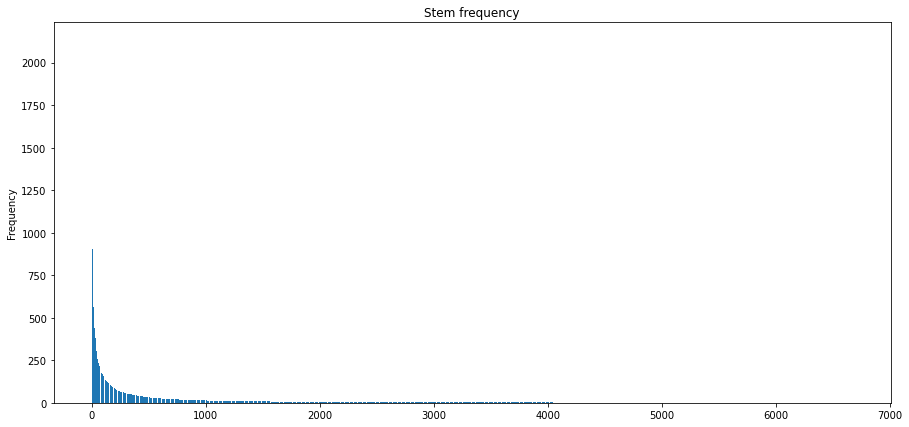

In [473]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(len(most_freq)), most_freq.values())
ax.set_ylabel('Frequency')
ax.set_title(f'Stem frequency')
# ax.set_xticks(np.arange(len(most_freq)))
# ax.set_xticklabels(i)
plt.show()

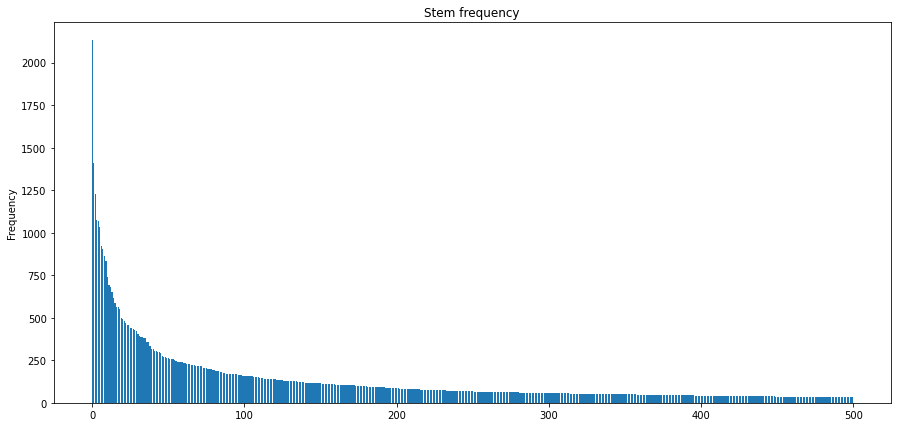

In [474]:
# Frequency of the 500 most frequent stems

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(500), list(most_freq.values())[:500])
ax.set_ylabel('Frequency')
ax.set_title(f'Stem frequency')
# ax.set_xticks(np.arange(500))
# ax.set_xticklabels(i)
plt.show()

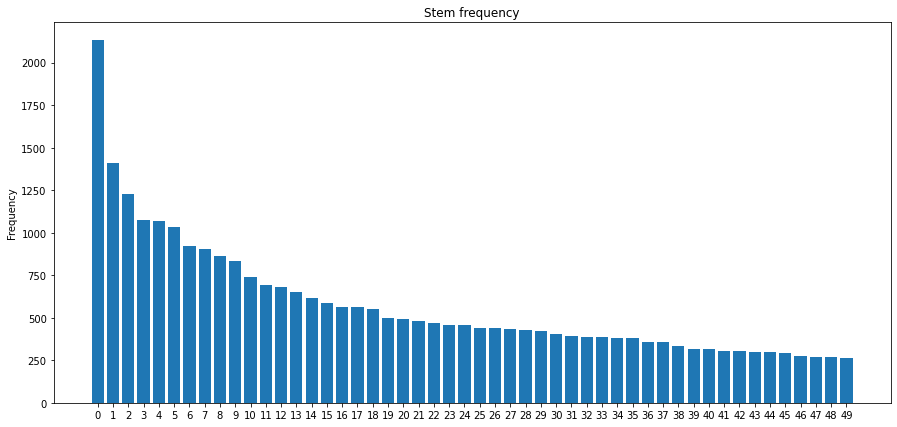

In [475]:
# Frequency of the 50 most frequent stems

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(50), list(most_freq.values())[:50])
ax.set_ylabel('Frequency')
ax.set_title(f'Stem frequency')
ax.set_xticks(np.arange(50))
# ax.set_xticklabels(i)
plt.show()

In [476]:
# On average, a stem appears in 17 rapportini
pd.Series(most_freq.values()).describe()

count    6674.000000
mean       13.980222
std        62.490506
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max      2130.000000
dtype: float64

In [477]:
# A common choice is to drop the stems which are present in less than 5% of the documents.
# Compute 5 % of the number of documents
0.05 * len(data)

743.0500000000001

So, using this idea, we should get rid of the terms with a frequency smaller than 743 documents.

However, in this case, the stems are much less frequent. Let's check some quantiles of the distribution in our case

In [478]:
# Only 10 stems are present in more than 741 documents (~5% of texts)
# The other way around: the stems present in more than 1101 documents are only 10
list(most_freq.values())[10]

741

In [479]:
# Only 50 stems are present in more than 263 documents
list(most_freq.values())[50]

263

In [480]:
# Only 100 stems are present in more than 157 documents
list(most_freq.values())[100]

157

In [481]:
# Only 300 stems are present in more than 57 documents
list(most_freq.values())[300]

57

In [482]:
# Only 500 stems are present in more than 32 documents
list(most_freq.values())[500]

32

In [483]:
# Only 750 stems are present in more than 20 documents
list(most_freq.values())[750]

20

In [484]:
list(most_freq.values())[1000]

14

Change perspective: count the frequency of each frequence

In [485]:
s = pd.Series(count_word.values())
s

0        137
1        618
2         25
3        104
4       1225
        ... 
6669       2
6670       1
6671       1
6672       1
6673       1
Length: 6674, dtype: int64

In [486]:
s.value_counts()

1       2623
2       1078
3        495
4        350
5        235
        ... 
110        1
126        1
150        1
178        1
1075       1
Length: 223, dtype: int64

In [487]:
sum(s.value_counts())

6674

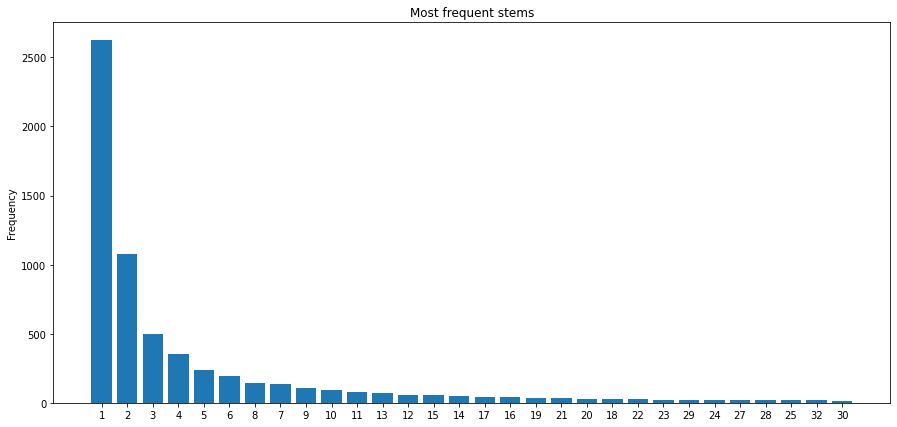

In [488]:
vc = s.value_counts()

v = vc[:30].values
i = vc[:30].index

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(30), v)
ax.set_ylabel('Frequency')
ax.set_title(f'Most frequent stems')
ax.set_xticks(np.arange(30))
ax.set_xticklabels(i)
plt.show()

There are 2623 terms that are present in only 1 document

There are 1078 terms that are present in only 2 documents...

## BOW

### CountVectorizer

In [504]:
def count_vectorizer(data, max_features=None, n_min=1, n_max=1, min_df=1, max_df=1.0):
    cv = CountVectorizer(
        # lowercase = True, 
        #  stop_words = 'english', 
         ngram_range = (n_min, n_max),     # (1,1) means only unigrams, (1,2) means unigrams and bigrams, (1,1) only bigrams
         min_df = min_df, # example: 0.01 -> eliminazione delle parole minori 1%
         max_df = max_df,
         max_features = max_features
        #  tokenizer = token.tokenize
        )

    text_counts = cv.fit_transform(data['cleaned_workdesc'])
    return text_counts

In [505]:
# prova
datap = data.copy()
datap

,index,workdesc,jobid,jobtaskid,resid,custid,qty,sede,jobtaskdt,data_ins,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,day,day1,delay,cleaned_workdesc
0,23747,Meet per nuovo nome autentica,2865,22058,1430,4187,2.0,6.0,2020-10-01,2020-10-01 16:07:50.418,0,0,0,0,approvato,92,92,0,meet nuov nom autent
1,6701,.,2848,22026,308,59,8.0,6.0,2021-02-16,2021-02-23 17:29:02.768,0,0,0,0,approvato,230,237,7,
2,10990,-Allineamento attività\n-Verifica attuale flus...,3170,22658,300,21154,8.0,6.0,2021-01-19,2021-01-21 11:19:10.039,0,0,1,0,approvato,202,204,2,allin attiv verif attual fluss pian produzion
3,17594,"Flusso gare, lavorato sulla tabella dei contra...",2987,22328,1434,4466,8.0,6.0,2020-11-23,2020-11-27 13:06:28.789,0,0,1,0,approvato,145,149,4,fluss gar lavor tabell contratt modific toolb ...
4,725,Monitoraggio AWS,3195,22698,372,4466,6.0,6.0,2021-03-11,2021-03-15 10:52:35.271,0,0,1,0,approvato,253,257,4,monitoragg aws
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,13498,Ticket 231080 + 231082 + ripristino cluster ku...,280,747,358,10,1.5,6.0,2020-12-24,2020-12-24 12:55:39.191,0,0,1,1,approvato,176,176,0,ticket ripristin cluster kubernetes
14857,7987,Approvazioni rapportini,82,25,322,4187,8.0,6.0,2021-02-01,2021-02-01 16:58:37.708,0,0,0,0,approvato,215,215,0,approv rapportin
14858,10595,"tkt, sr, incident tkt, sr, incident",2897,22397,1400,4466,8.0,6.0,2021-01-15,2021-01-15 17:48:25.276,0,0,1,0,cambio_commessa,198,198,0,tkt sr incident tkt sr incident
14859,6042,My.MI (ex customer report) progettazione compo...,3006,22352,349,4187,3.5,6.0,2021-02-15,2021-02-15 17:54:14.069,0,0,0,0,approvato,229,229,0,ex customer report progett component x upselli...


In [506]:
cv = CountVectorizer(
    max_features = 500
    # lowercase = True, 
    #  stop_words = 'english', 
    #  ngram_range = (1,1),     # unigrams, we can change it
    #  tokenizer = token.tokenize
    )

text_counts = cv.fit_transform(datap['cleaned_workdesc'])
text_counts

<14861x500 sparse matrix of type '<class 'numpy.int64'>'
	with 57202 stored elements in Compressed Sparse Row format>

In [507]:
# # If I need to convert it into a dense matrix:
# text_counts_dense = text_counts.todense()
# text_counts_dense

The matrix obtained this way is very high dimensional.

### TF-IDF 

In [508]:
def tfidf(data, max_features = None, n_min=1, n_max=1, min_df=1, max_df=1.0):
    tf = TfidfVectorizer(
        # lowercase = True, 
        #  stop_words = 'english', 
         ngram_range = (n_min, n_max),     # (1,1) means only unigrams, (1,2) means unigrams and bigrams, (1,1) only bigrams
         min_df = min_df, # example: 0.01 -> eliminazione delle parole minori 1%
         max_df = max_df,
         max_features = max_features 
        #  tokenizer = token.tokenize
        )
    
    text_tf = tf.fit_transform(data['cleaned_workdesc'])

    return text_tf

In [509]:
tf = TfidfVectorizer(
    max_features = 500
)

text_tf = tf.fit_transform(datap['cleaned_workdesc'])
text_tf

<14861x500 sparse matrix of type '<class 'numpy.float64'>'
	with 57202 stored elements in Compressed Sparse Row format>

## Hande categorical variables

In [510]:
# data = pd.read_csv(datapath + 'dataset/data7.csv')
data[['jobid','jobtaskid', 'resid', 'custid', 'sede']] = data[['jobid','jobtaskid', 'resid', 'custid', 'sede']].astype(str)
data[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']] = data[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']].astype(int)
data = data.drop(['workdesc'], inplace=False, axis=1)
data

,index,jobid,jobtaskid,resid,custid,qty,sede,jobtaskdt,data_ins,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,day,day1,delay,cleaned_workdesc
0,23747,2865,22058,1430,4187,2.0,6.0,2020-10-01,2020-10-01 16:07:50.418,0,0,0,0,approvato,92,92,0,meet nuov nom autent
1,6701,2848,22026,308,59,8.0,6.0,2021-02-16,2021-02-23 17:29:02.768,0,0,0,0,approvato,230,237,7,
2,10990,3170,22658,300,21154,8.0,6.0,2021-01-19,2021-01-21 11:19:10.039,0,0,1,0,approvato,202,204,2,allin attiv verif attual fluss pian produzion
3,17594,2987,22328,1434,4466,8.0,6.0,2020-11-23,2020-11-27 13:06:28.789,0,0,1,0,approvato,145,149,4,fluss gar lavor tabell contratt modific toolb ...
4,725,3195,22698,372,4466,6.0,6.0,2021-03-11,2021-03-15 10:52:35.271,0,0,1,0,approvato,253,257,4,monitoragg aws
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,13498,280,747,358,10,1.5,6.0,2020-12-24,2020-12-24 12:55:39.191,0,0,1,1,approvato,176,176,0,ticket ripristin cluster kubernetes
14857,7987,82,25,322,4187,8.0,6.0,2021-02-01,2021-02-01 16:58:37.708,0,0,0,0,approvato,215,215,0,approv rapportin
14858,10595,2897,22397,1400,4466,8.0,6.0,2021-01-15,2021-01-15 17:48:25.276,0,0,1,0,cambio_commessa,198,198,0,tkt sr incident tkt sr incident
14859,6042,3006,22352,349,4187,3.5,6.0,2021-02-15,2021-02-15 17:54:14.069,0,0,0,0,approvato,229,229,0,ex customer report progett component x upselli...


In [511]:
data.columns

Index(['index', 'jobid', 'jobtaskid', 'resid', 'custid', 'qty', 'sede',
       'jobtaskdt', 'data_ins', 'flg_trasferta', 'pay', 'flg_prepagato',
       'flg_straordinario', 'tipo_update', 'day', 'day1', 'delay',
       'cleaned_workdesc'],
      dtype='object')

### One-hot encoding

In order to handle categorical variables, a common strategy is to use one-hot encoding. NB: this is not the only possibility, and sometimes, other strategies could be better 

In [512]:
categorical_features = [col for col in data.columns if not is_numeric_dtype(data[col]) and col != 'tipo_update' and col != 'cleaned_workdesc']
categorical_features

['jobid', 'jobtaskid', 'resid', 'custid', 'sede', 'jobtaskdt', 'data_ins']

In [513]:
# In pandas we can achieve easily one-hot encoding using the 'get_dummies()' function
categorical_features = [col for col in data.columns if not is_numeric_dtype(data[col]) and col != 'tipo_update' and col != 'workdesc' and col != 'cleaned_workdesc']
data_with_dummies = pd.get_dummies(data, columns = categorical_features)
data_with_dummies.head()

# here we don't remove one of the new boolean colun for each categorical variable...
# if we will find some problems, we will do it

,index,qty,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,day,day1,delay,cleaned_workdesc,jobid_100,jobid_107,jobid_110,jobid_118,jobid_119,jobid_123,jobid_125,jobid_126,jobid_135,jobid_157,jobid_158,jobid_173,jobid_174,jobid_175,jobid_177,jobid_178,jobid_179,jobid_187,jobid_203,jobid_209,jobid_210,jobid_227,jobid_231,jobid_2457,jobid_2488,jobid_2509,jobid_2516,jobid_2528,jobid_2534,...,data_ins_2021-04-09 07:34:05.89,data_ins_2021-04-09 08:38:27.877,data_ins_2021-04-09 09:01:17.861,data_ins_2021-04-09 09:17:17.931,data_ins_2021-04-09 10:03:46.859,data_ins_2021-04-09 10:15:43.566,data_ins_2021-04-09 10:17:28.45,data_ins_2021-04-09 10:29:33.531,data_ins_2021-04-09 10:53:50.119,data_ins_2021-04-09 12:01:11.063,data_ins_2021-04-09 12:04:05.442,data_ins_2021-04-09 12:14:05.633,data_ins_2021-04-09 12:14:22.847,data_ins_2021-04-09 12:14:49.839,data_ins_2021-04-09 12:29:00.716,data_ins_2021-04-09 12:37:48.784,data_ins_2021-04-09 13:47:20.121,data_ins_2021-04-09 14:14:08.19,data_ins_2021-04-09 14:20:00.45,data_ins_2021-04-09 14:20:32.425,data_ins_2021-04-09 14:41:25.069,data_ins_2021-04-09 15:05:34.227,data_ins_2021-04-09 15:27:22.574,data_ins_2021-04-09 15:29:01.535,data_ins_2021-04-09 15:34:14.079,data_ins_2021-04-09 15:45:52.509,data_ins_2021-04-09 15:47:15.096,data_ins_2021-04-09 15:55:54.834,data_ins_2021-04-09 16:05:23.936,data_ins_2021-04-09 16:10:24.272,data_ins_2021-04-09 18:20:22.133,data_ins_2021-04-09 18:21:37.004,data_ins_2021-04-09 19:55:08.403,data_ins_2021-04-09 20:02:22.254,data_ins_2021-04-11 13:22:50.378,data_ins_2021-04-11 13:23:32.755,data_ins_2021-04-12 07:15:52.699,data_ins_2021-04-12 07:22:18.46,data_ins_2021-04-12 07:35:28.995,data_ins_2021-04-12 09:46:17.342
0,23747,2.0,0,0,0,0,approvato,92,92,0,meet nuov nom autent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6701,8.0,0,0,0,0,approvato,230,237,7,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10990,8.0,0,0,1,0,approvato,202,204,2,allin attiv verif attual fluss pian produzion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,17594,8.0,0,0,1,0,approvato,145,149,4,fluss gar lavor tabell contratt modific toolb ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,725,6.0,0,0,1,0,approvato,253,257,4,monitoragg aws,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [514]:
# Just as a convention, I prefer to place the column to be predicted as the last one.
columns = data_with_dummies.columns.tolist()

# Popping out 'tipo_update' from the list and insert it back at the end.
columns.insert(len(columns), columns.pop(columns.index('cleaned_workdesc')))
columns.insert(len(columns), columns.pop(columns.index('tipo_update')))

# columns.pop(columns.index('workdesc'))
# columns.pop(columns.index('cleaned_workdesc'))

# Let's refactor the DataFrame using this new column index
data_with_dummies = data_with_dummies.loc[:, columns]
data_with_dummies#.head()

,index,qty,flg_trasferta,pay,flg_prepagato,flg_straordinario,day,day1,delay,jobid_100,jobid_107,jobid_110,jobid_118,jobid_119,jobid_123,jobid_125,jobid_126,jobid_135,jobid_157,jobid_158,jobid_173,jobid_174,jobid_175,jobid_177,jobid_178,jobid_179,jobid_187,jobid_203,jobid_209,jobid_210,jobid_227,jobid_231,jobid_2457,jobid_2488,jobid_2509,jobid_2516,jobid_2528,jobid_2534,jobid_2538,jobid_2579,...,data_ins_2021-04-09 09:01:17.861,data_ins_2021-04-09 09:17:17.931,data_ins_2021-04-09 10:03:46.859,data_ins_2021-04-09 10:15:43.566,data_ins_2021-04-09 10:17:28.45,data_ins_2021-04-09 10:29:33.531,data_ins_2021-04-09 10:53:50.119,data_ins_2021-04-09 12:01:11.063,data_ins_2021-04-09 12:04:05.442,data_ins_2021-04-09 12:14:05.633,data_ins_2021-04-09 12:14:22.847,data_ins_2021-04-09 12:14:49.839,data_ins_2021-04-09 12:29:00.716,data_ins_2021-04-09 12:37:48.784,data_ins_2021-04-09 13:47:20.121,data_ins_2021-04-09 14:14:08.19,data_ins_2021-04-09 14:20:00.45,data_ins_2021-04-09 14:20:32.425,data_ins_2021-04-09 14:41:25.069,data_ins_2021-04-09 15:05:34.227,data_ins_2021-04-09 15:27:22.574,data_ins_2021-04-09 15:29:01.535,data_ins_2021-04-09 15:34:14.079,data_ins_2021-04-09 15:45:52.509,data_ins_2021-04-09 15:47:15.096,data_ins_2021-04-09 15:55:54.834,data_ins_2021-04-09 16:05:23.936,data_ins_2021-04-09 16:10:24.272,data_ins_2021-04-09 18:20:22.133,data_ins_2021-04-09 18:21:37.004,data_ins_2021-04-09 19:55:08.403,data_ins_2021-04-09 20:02:22.254,data_ins_2021-04-11 13:22:50.378,data_ins_2021-04-11 13:23:32.755,data_ins_2021-04-12 07:15:52.699,data_ins_2021-04-12 07:22:18.46,data_ins_2021-04-12 07:35:28.995,data_ins_2021-04-12 09:46:17.342,cleaned_workdesc,tipo_update
0,23747,2.0,0,0,0,0,92,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,meet nuov nom autent,approvato
1,6701,8.0,0,0,0,0,230,237,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,approvato
2,10990,8.0,0,0,1,0,202,204,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,allin attiv verif attual fluss pian produzion,approvato
3,17594,8.0,0,0,1,0,145,149,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fluss gar lavor tabell contratt modific toolb ...,approvato
4,725,6.0,0,0,1,0,253,257,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,monitoragg aws,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,13498,1.5,0,0,1,1,176,176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ticket ripristin cluster kubernetes,approvato
14857,7987,8.0,0,0,0,0,215,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,approv rapportin,approvato
14858,10595,8.0,0,0,1,0,198,198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,tkt sr incident tkt sr incident,cambio_commessa
14859,6042,3.5,0,0,0,0,229,229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ex customer report progett component x upselli...,approvato


## Encoding Label

In [515]:
y_labels = ['cambio_commessa', 'approvato']

In [516]:
# One-hot encoding option
data_with_dummies.tipo_update = data_with_dummies.tipo_update.map(lambda x: 0 if x=='approvato' else 1)
data_with_dummies.head()

,index,qty,flg_trasferta,pay,flg_prepagato,flg_straordinario,day,day1,delay,jobid_100,jobid_107,jobid_110,jobid_118,jobid_119,jobid_123,jobid_125,jobid_126,jobid_135,jobid_157,jobid_158,jobid_173,jobid_174,jobid_175,jobid_177,jobid_178,jobid_179,jobid_187,jobid_203,jobid_209,jobid_210,jobid_227,jobid_231,jobid_2457,jobid_2488,jobid_2509,jobid_2516,jobid_2528,jobid_2534,jobid_2538,jobid_2579,...,data_ins_2021-04-09 09:01:17.861,data_ins_2021-04-09 09:17:17.931,data_ins_2021-04-09 10:03:46.859,data_ins_2021-04-09 10:15:43.566,data_ins_2021-04-09 10:17:28.45,data_ins_2021-04-09 10:29:33.531,data_ins_2021-04-09 10:53:50.119,data_ins_2021-04-09 12:01:11.063,data_ins_2021-04-09 12:04:05.442,data_ins_2021-04-09 12:14:05.633,data_ins_2021-04-09 12:14:22.847,data_ins_2021-04-09 12:14:49.839,data_ins_2021-04-09 12:29:00.716,data_ins_2021-04-09 12:37:48.784,data_ins_2021-04-09 13:47:20.121,data_ins_2021-04-09 14:14:08.19,data_ins_2021-04-09 14:20:00.45,data_ins_2021-04-09 14:20:32.425,data_ins_2021-04-09 14:41:25.069,data_ins_2021-04-09 15:05:34.227,data_ins_2021-04-09 15:27:22.574,data_ins_2021-04-09 15:29:01.535,data_ins_2021-04-09 15:34:14.079,data_ins_2021-04-09 15:45:52.509,data_ins_2021-04-09 15:47:15.096,data_ins_2021-04-09 15:55:54.834,data_ins_2021-04-09 16:05:23.936,data_ins_2021-04-09 16:10:24.272,data_ins_2021-04-09 18:20:22.133,data_ins_2021-04-09 18:21:37.004,data_ins_2021-04-09 19:55:08.403,data_ins_2021-04-09 20:02:22.254,data_ins_2021-04-11 13:22:50.378,data_ins_2021-04-11 13:23:32.755,data_ins_2021-04-12 07:15:52.699,data_ins_2021-04-12 07:22:18.46,data_ins_2021-04-12 07:35:28.995,data_ins_2021-04-12 09:46:17.342,cleaned_workdesc,tipo_update
0,23747,2.0,0,0,0,0,92,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,meet nuov nom autent,0
1,6701,8.0,0,0,0,0,230,237,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0
2,10990,8.0,0,0,1,0,202,204,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,allin attiv verif attual fluss pian produzion,0
3,17594,8.0,0,0,1,0,145,149,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fluss gar lavor tabell contratt modific toolb ...,0
4,725,6.0,0,0,1,0,253,257,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,monitoragg aws,0


In [ ]:
# data_with_dummies.to_csv(datapath + 'dataset/data8.csv', index=False)

## Save X and y

In [517]:
# Feature matrix X is composed of all the columns except 'tipo_update' (i.e., the target class label)
X = data_with_dummies.iloc[:, :-1]
X.head()

,index,qty,flg_trasferta,pay,flg_prepagato,flg_straordinario,day,day1,delay,jobid_100,jobid_107,jobid_110,jobid_118,jobid_119,jobid_123,jobid_125,jobid_126,jobid_135,jobid_157,jobid_158,jobid_173,jobid_174,jobid_175,jobid_177,jobid_178,jobid_179,jobid_187,jobid_203,jobid_209,jobid_210,jobid_227,jobid_231,jobid_2457,jobid_2488,jobid_2509,jobid_2516,jobid_2528,jobid_2534,jobid_2538,jobid_2579,...,data_ins_2021-04-09 08:38:27.877,data_ins_2021-04-09 09:01:17.861,data_ins_2021-04-09 09:17:17.931,data_ins_2021-04-09 10:03:46.859,data_ins_2021-04-09 10:15:43.566,data_ins_2021-04-09 10:17:28.45,data_ins_2021-04-09 10:29:33.531,data_ins_2021-04-09 10:53:50.119,data_ins_2021-04-09 12:01:11.063,data_ins_2021-04-09 12:04:05.442,data_ins_2021-04-09 12:14:05.633,data_ins_2021-04-09 12:14:22.847,data_ins_2021-04-09 12:14:49.839,data_ins_2021-04-09 12:29:00.716,data_ins_2021-04-09 12:37:48.784,data_ins_2021-04-09 13:47:20.121,data_ins_2021-04-09 14:14:08.19,data_ins_2021-04-09 14:20:00.45,data_ins_2021-04-09 14:20:32.425,data_ins_2021-04-09 14:41:25.069,data_ins_2021-04-09 15:05:34.227,data_ins_2021-04-09 15:27:22.574,data_ins_2021-04-09 15:29:01.535,data_ins_2021-04-09 15:34:14.079,data_ins_2021-04-09 15:45:52.509,data_ins_2021-04-09 15:47:15.096,data_ins_2021-04-09 15:55:54.834,data_ins_2021-04-09 16:05:23.936,data_ins_2021-04-09 16:10:24.272,data_ins_2021-04-09 18:20:22.133,data_ins_2021-04-09 18:21:37.004,data_ins_2021-04-09 19:55:08.403,data_ins_2021-04-09 20:02:22.254,data_ins_2021-04-11 13:22:50.378,data_ins_2021-04-11 13:23:32.755,data_ins_2021-04-12 07:15:52.699,data_ins_2021-04-12 07:22:18.46,data_ins_2021-04-12 07:35:28.995,data_ins_2021-04-12 09:46:17.342,cleaned_workdesc
0,23747,2.0,0,0,0,0,92,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,meet nuov nom autent
1,6701,8.0,0,0,0,0,230,237,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
2,10990,8.0,0,0,1,0,202,204,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,allin attiv verif attual fluss pian produzion
3,17594,8.0,0,0,1,0,145,149,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fluss gar lavor tabell contratt modific toolb ...
4,725,6.0,0,0,1,0,253,257,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,monitoragg aws


In [518]:
X_np = np.array(X)
X_np

array([[23747, 2.0, 0, ..., 0, 0, 'meet nuov nom autent'],
       [6701, 8.0, 0, ..., 0, 0, ''],
       [10990, 8.0, 0, ..., 0, 0,
        'allin attiv verif attual fluss pian produzion'],
       ...,
       [10595, 8.0, 0, ..., 0, 0, 'tkt sr incident tkt sr incident'],
       [6042, 3.5, 0, ..., 0, 0,
        'ex customer report progett component x upselling fatt ora ripos compens quand'],
       [1505, 8.0, 0, ..., 0, 0,
        'jir iam troubleshooting problem updat otbeamp02 ripristin modif pers f5 prod nam strong auth grac period check chains iamissu']],
      dtype=object)

In [519]:
X_np.shape

(14861, 15482)